# Expansión Estratégica de Biogenesys con Python

### Introducción: 
* La empresa farmacéutica BIOGENESYS busca identificar las ubicaciones óptimas para la expansión de laboratorios farmacéuticos, basándose en el análisis de datos de incidencia de COVID-19, tasas de vacunación, y la disponibilidad de infraestructuras sanitarias. La meta es optimizar la respuesta a los efectos de la pandemia y postpandemia con el fin de mejorar el acceso a las vacunas.
* Como analista de datos de renombre, Gerardo Morsucci (cohorte número 1 del part-time de Henry) deberás utilizar distintas herramientas vistas en la carrera para poder ayudar a los directivos a tomar decisiones en este proceso.

### Los objetivos son concretos y medibles:
* Realizar un análisis exploratorio de la incidencia de COVID-19 y otros factores.
* Identificar tendencias mediante estadísticas y visualizaciones.
* Asegurar la calidad de los datos con técnicas de limpieza (ETL).
* Mejorar el acceso a los datos con ETL eficiente.
* Desarrollar dashboards interactivos para una toma de decisiones informada.

# 1° AVANCE

In [97]:
! pip freeze > requeriments.txt

Primero se cargan las librerías a utilizar en el proyecto

In [98]:
#Carga de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

Luego se carga el dataset

In [99]:
#CARGA DEL DATASET
data = pd.read_csv("data_latinoamerica.csv", sep=',')

Para tener una primera impresión de las columnas en general del dataset, imprimimos sus primeras 5 filas

In [100]:
# Se muestran las 5 primeras rows del dataset, nos da un panorama general
data.head(5)

location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

Para tener en cuenta su tamaño real, lo imprimimos a continuación.

In [101]:
# se comprueba que el dataset cargado tiene la cantidad de registros y columnas especificadas
np.shape(data)

(12216057, 50)

Ahora filtramos según la consigna que bajó el equipo de ingeniería de datos, la cual es seleccionar los siguientes 6 países para el análisis. (Argentina, Brasil, Chile, Colombia, México, Perú)

In [102]:
# Selecciona los países donde se podría expandir BIOGENESYS.
paises_seleccionados = ["Argentina","Brazil","Chile","Colombia","Mexico","Peru"]
data_latinoamericana = data[data["country_name"].isin(paises_seleccionados)]

Luego de filtrar, comprobamos denuevo el tamaño del dataset, viendo una leve baja de registros.

In [103]:
# se comprueba nuevamente el tamaño del dataset luego del filtrado
np.shape(data_latinoamericana)

(11970289, 50)

A través de un criterio propio, seleccionamos un umbral de 4millones de datos nulos, para darle valor a columnas con una considerable cantidad de datos.

In [104]:
# Se muestran las columnas con mas de 4 millones de datos faltantes (este parámetro se eligió a criterio propio) (4millones equivale a un 30% de los datos aprox)
data_latinoamericana.isnull().sum()[data_latinoamericana.isnull().sum()>4000000]

new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
gdp_usd                                  11963352
gdp_per_capita_usd                       11962361
smoking_prevalence                       11964343
diabetes_prevalence                      11964343
infant_mortality_rate                    11964343
nurses_per_1000                          11964343
physicians_per_1000                      11964343
population_largest_city                  11964343
area_rural_sq_km                         11964343
area_urban_sq_km                         11964343
life_expectancy                          11964343


Ahora se filtra denuevo a través de la columna "location_key" para establecer nuevamente los países requeridos según el equipo de ingeniería de datos.

In [105]:
# Se filtran los países a utilizar
data_latinoamericana_paises = data_latinoamericana[data_latinoamericana["location_key"].isin(["PE","AR","CO","CL","BR","MX"])]

A continuación se realiza un filtrado que utilice las fechas desde el 1ro de enero de 2021

In [106]:
# Filtra los datos en fechas mayores a 2021-01-01.
data_latinoamericana_paises_y_fecha = data_latinoamericana_paises[data_latinoamericana_paises["date"]>'2021-01-01']

Comprobemos denuevo los valores faltantes, para tener un panorama general de como impactaron los filtrados.

In [107]:
# Se comprueban nuevamente los valores nulos luego de los filtrados
valores_nulos = data_latinoamericana_paises_y_fecha.isnull().sum()[data_latinoamericana_paises_y_fecha.isnull().sum()>0]
print(valores_nulos)
print(np.shape(data_latinoamericana_paises_y_fecha))

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64
(3744, 50)


### A continuación se usaran dos politicas distintas para los tipos de datos nulos que tiene el dataset.
* La primera politica fue para las columnas que tenian pocos valores nulos (aprox 1% de los datos). Esta politica fue rellenar con la media los valores faltantes
* La segunda politica fue llenar con 0 los nulos, esto para las columnas que tenían mucha cantidad de valores nulos (3 columnas en total, mas de el 50% de datos en algunos casos)

In [108]:
# Realiza una limpieza preliminar de los datos, eliminando registros nulos y corrigiendo los tipos de datos donde sea necesario, trata con valores medios, valores anteriores o valores siguientes.
for pais in paises_seleccionados:
    data_latinoamericana_paises_y_fecha["new_confirmed"]=data_latinoamericana_paises_y_fecha["new_confirmed"].fillna(data_latinoamericana_paises_y_fecha[data_latinoamericana_paises_y_fecha["country_name"]==pais]["new_confirmed"].mean())
    data_latinoamericana_paises_y_fecha["new_deceased"]=data_latinoamericana_paises_y_fecha["new_deceased"].fillna(data_latinoamericana_paises_y_fecha[data_latinoamericana_paises_y_fecha["country_name"]==pais]["new_deceased"].mean())
    data_latinoamericana_paises_y_fecha["cumulative_confirmed"]=data_latinoamericana_paises_y_fecha["cumulative_confirmed"].fillna(data_latinoamericana_paises_y_fecha[data_latinoamericana_paises_y_fecha["country_name"]==pais]["cumulative_confirmed"].mean())
    data_latinoamericana_paises_y_fecha["cumulative_deceased"]=data_latinoamericana_paises_y_fecha["cumulative_deceased"].fillna(data_latinoamericana_paises_y_fecha[data_latinoamericana_paises_y_fecha["country_name"]==pais]["cumulative_deceased"].mean())
    data_latinoamericana_paises_y_fecha["rainfall_mm"]=data_latinoamericana_paises_y_fecha["rainfall_mm"].fillna(data_latinoamericana_paises_y_fecha[data_latinoamericana_paises_y_fecha["country_name"]==pais]["rainfall_mm"].mean())
    data_latinoamericana_paises_y_fecha["relative_humidity"]=data_latinoamericana_paises_y_fecha["relative_humidity"].fillna(data_latinoamericana_paises_y_fecha[data_latinoamericana_paises_y_fecha["country_name"]==pais]["relative_humidity"].mean())
    data_latinoamericana_paises_y_fecha["average_temperature_celsius"]=data_latinoamericana_paises_y_fecha["average_temperature_celsius"].fillna(data_latinoamericana_paises_y_fecha[data_latinoamericana_paises_y_fecha["country_name"]==pais]["average_temperature_celsius"].mean())
    data_latinoamericana_paises_y_fecha["minimum_temperature_celsius"]=data_latinoamericana_paises_y_fecha["minimum_temperature_celsius"].fillna(data_latinoamericana_paises_y_fecha[data_latinoamericana_paises_y_fecha["country_name"]==pais]["minimum_temperature_celsius"].mean())
    data_latinoamericana_paises_y_fecha["maximum_temperature_celsius"]=data_latinoamericana_paises_y_fecha["maximum_temperature_celsius"].fillna(data_latinoamericana_paises_y_fecha[data_latinoamericana_paises_y_fecha["country_name"]==pais]["maximum_temperature_celsius"].mean())

data_latinoamericana_paises_y_fecha["new_recovered"]=data_latinoamericana_paises_y_fecha["new_recovered"].fillna(0)
data_latinoamericana_paises_y_fecha["cumulative_recovered"]=data_latinoamericana_paises_y_fecha["cumulative_recovered"].fillna(0)
data_latinoamericana_paises_y_fecha["cumulative_vaccine_doses_administered"]=data_latinoamericana_paises_y_fecha["cumulative_vaccine_doses_administered"].fillna(0)

C:\Users\geram\AppData\Local\Temp\ipykernel_5608\624172414.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamericana_paises_y_fecha["new_confirmed"]=data_latinoamericana_paises_y_fecha["new_confirmed"].fillna(data_latinoamericana_paises_y_fecha[data_latinoamericana_paises_y_fecha["country_name"]==pais]["new_confirmed"].mean())
C:\Users\geram\AppData\Local\Temp\ipykernel_5608\624172414.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamericana_paises_y_fecha["new_deceased"]=data_

Se comprueban nuevamente los valores nulos para verificar el exito del tratado de los mismos.

In [109]:
#Se comprueban nuevamente los valores nulos para verificar el exito del tratado de los mismos.
valores_nulos = data_latinoamericana_paises_y_fecha.isnull().sum()[data_latinoamericana_paises_y_fecha.isnull().sum()>0]
print(valores_nulos)
print(np.shape(data_latinoamericana_paises_y_fecha))

Series([], dtype: int64)
(3744, 50)


Debido a la diferencia entre el dataset inicial y el que logramos después de tantos filtrados, lo guardamos para iniciar denuevo los procesos dentro del proyecto, y poder trabajar limpiamente.

In [110]:
# Se guarda un nuevo dataset ya con los datos filtrados.
data_latinoamericana_paises_y_fecha.to_csv("datos_finales_filtrados.csv",index=False)


In [111]:
# Se carga  nuevamente el dataset pero esta vez ya filtrado
df = pd.read_csv("datos_finales_filtrados.csv", sep=',')

Verifiquemos los tipos de datos de las columnas, tienen que quedar formateados correctamente segun el readme.txt entregado junto con el dataset.

In [112]:
df.dtypes

location_key                              object
date                                      object
country_code                              object
country_name                              object
new_confirmed                            float64
new_deceased                             float64
cumulative_confirmed                     float64
cumulative_deceased                      float64
cumulative_vaccine_doses_administered    float64
population                               float64
population_male                          float64
population_female                        float64
population_rural                         float64
population_urban                         float64
population_density                       float64
human_development_index                  float64
population_age_00_09                     float64
population_age_10_19                     float64
population_age_20_29                     float64
population_age_30_39                     float64
population_age_40_49

### Aplica bucles for y/o while para el cálculo de estadísticas descriptivas y otras métricas importantes que ofrece pandas por default. Luego responde:
* ¿Qué implican estas métricas y cómo pueden ayudar en el análisis de datos?

Resumen Rápido: Proporciona un resumen estadístico rápido que puede ser útil para comprender la distribución y las características básicas de los datos.

Detección de Anomalías: Ayuda a identificar valores atípicos (outliers) observando los valores mínimos, máximos y los cuartiles.

Comparación de Variables: Facilita la comparación de diferentes columnas en términos de su dispersión y tendencia central.

Preparación para Modelado: Útil en la etapa de preprocesamiento de datos, ya que permite identificar problemas como datos faltantes o variabilidad excesiva.

Evaluación Inicial: Sirve como una primera evaluación de los datos antes de realizar análisis más profundos o modelado predictivo.

* ¿Se muestran todas las estadísticas en todas las columnas durante el análisis?

No

* ¿Cuál es la razón de la respuesta anterior y cómo podría afectar la interpretación de los resultados obtenidos?

Faltaría la mediana, la varianza y el rango.Estas son medidas estadísticas que proporcionan información valiosa sobre la distribución y la dispersión de los datos.

In [113]:
for i in df.columns:
    print(i)
    print(df[i].describe())
    print("----------------")

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
----------------
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
----------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
----------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
----------------
new_confirmed
count      3744.000000
mean      13930.531008
std       24205.550042
min        -573.000000
25%        1536.750000
50%        5227.000000
75%       14812.750000
max      298408.000000
Name: new_confirmed, dtype: float64
----------------
new_deceased
count     3744.000000
mean       276.363237
std        507.133193
min          0.000000
25%         26.000000
50%        101.000000
75%        311.000000
max      11447.000000
Name: new_deceased, dtype: float64
-

### Crea una función que permita obtener la mediana, varianza y el rango. Te dejamos algunas preguntas para analizar esas medidas:

* ¿Qué representa la mediana?

La mediana es el valor que se encuentra en el centro de un conjunto de datos ordenados. Si el número de observaciones es impar, es el valor del medio; si es par, es el promedio de los dos valores centrales.

Utilidad:

Robustez ante Valores Atípicos: La mediana no se ve afectada por valores extremadamente altos o bajos (outliers), lo que la hace una mejor medida de tendencia central en distribuciones asimétricas.

Distribución Asimétrica: En datos con sesgo, la mediana proporciona una representación más precisa de la tendencia central que la media.

Comparación de Grupos: Ayuda a comparar la tendencia central de diferentes grupos de datos

* ¿Cómo varía la dispersión de los datos en el conjunto de datos analizado, en términos de la varianza y el rango? 

Esto es depende la columna a analizar, en algunas la varianza toma valores altos lo cual nos indica que hay valores muy dispersos, en otras columnas directamente no se puede tomar en cuenta porque son columnas acumulativas, por ende el dato estaría sesgado de por si. Con el rango ocurre algo similar.

* ¿Qué nos puede indicar esto sobre la consistencia o la variabilidad de los datos en relación con la mediana?

Que tan lejos estan los datos del valor del centro del conjunto de datos ordenado, este enfoque nos da un entendimiento grande del problema al que nos podemos enfrentar o si los datos toman sentido en relación al centro del conjunto de datos.

In [114]:
def describir_data(dataset):
    for i in df.columns:
        if df[i].dtype =="fint64" or df[i].dtype == "float64":
            print(i)
            print("Mediana: ", df[i].median())
            print("Varianza: ", df[i].var())
            print("Rango: ", df[i].max() - df[i].min())
            print("Moda: ", df[i].mode())
            print("-------------------------------")



In [115]:
describir_data(df)

new_confirmed
Mediana:  5227.0
Varianza:  585908652.8478458
Rango:  298981.0
Moda:  0    0.0
Name: new_confirmed, dtype: float64
-------------------------------
new_deceased
Mediana:  101.0
Varianza:  257184.0754690855
Rango:  11447.0
Moda:  0    0.0
Name: new_deceased, dtype: float64
-------------------------------
cumulative_confirmed
Mediana:  3648782.0
Varianza:  63637740447227.74
Rango:  34567862.0
Moda:  0    6.079579e+06
Name: cumulative_confirmed, dtype: float64
-------------------------------
cumulative_deceased
Mediana:  139496.5
Varianza:  33351870288.323883
Rango:  685202.0
Moda:  0    105716.119355
Name: cumulative_deceased, dtype: float64
-------------------------------
cumulative_vaccine_doses_administered
Mediana:  32445756.5
Varianza:  8551958275078892.0
Rango:  347868481.0
Moda:  0    0.0
Name: cumulative_vaccine_doses_administered, dtype: float64
-------------------------------
population
Mediana:  47910798.0
Varianza:  4507478439615793.0
Rango:  194985406.0
Moda:  0

# AVANCE 2

In [116]:
#Carga de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [117]:
# Se carga  nuevamente el dataset pero esta vez ya filtrado
df = pd.read_csv("datos_finales_filtrados.csv", sep=',')

Ponemos como indice la columna "Date" para poder hacer un análisis de los datos a lo largo del tiempo.

In [118]:
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace=True)

 Configuración de estilo para los gráficos

In [119]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

Generar gráficos de barras para todas las variables del dataset nos permite empezar a identificar patrones y tendencias, y por ultimo terminar de ver si queda algún outlier.

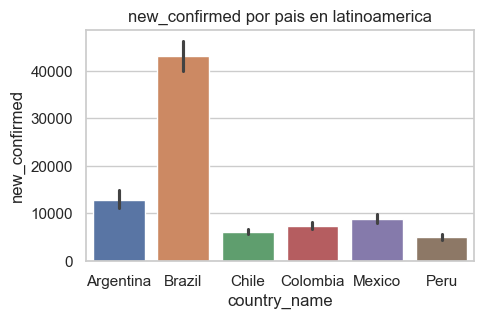

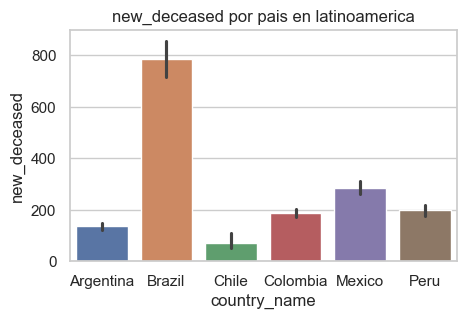

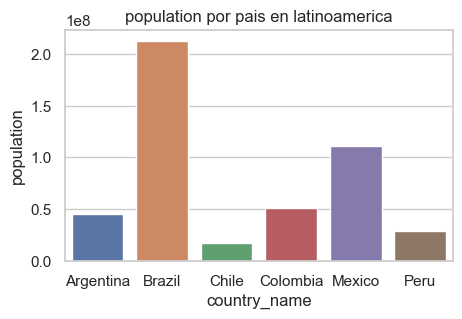

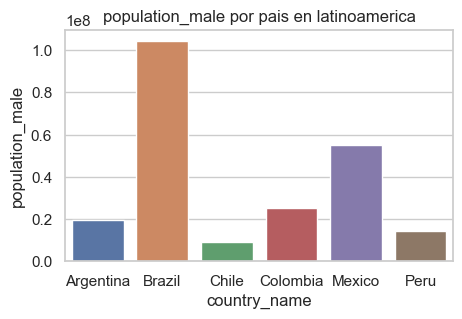

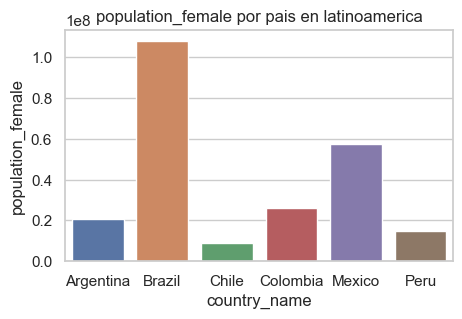

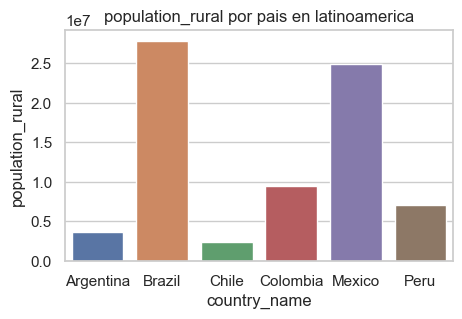

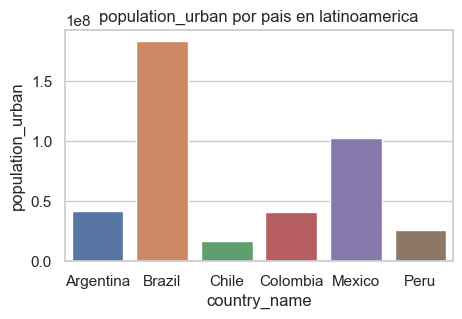

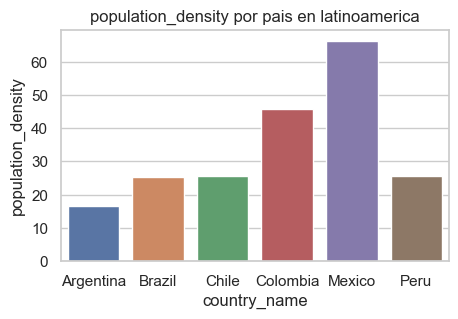

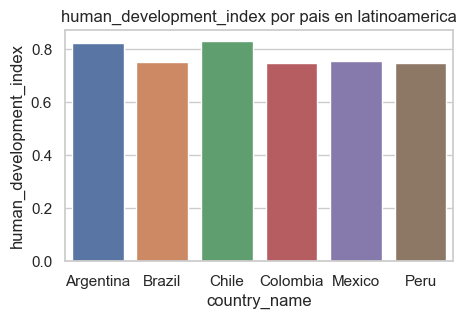

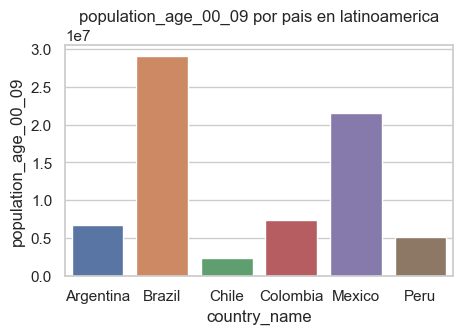

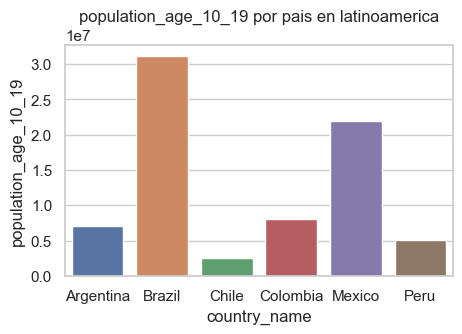

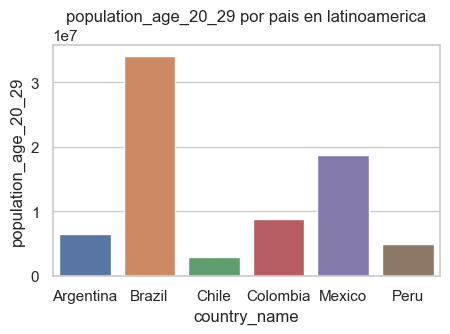

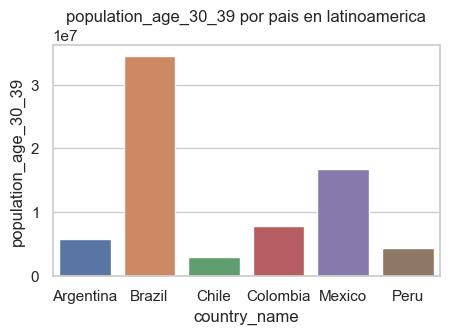

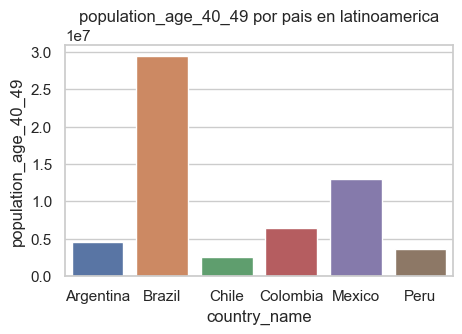

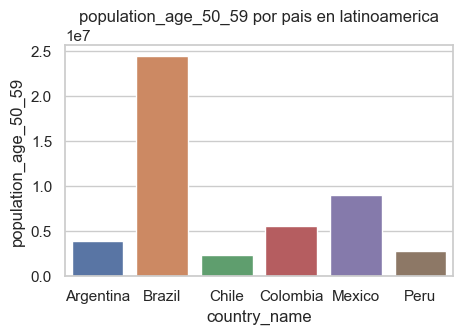

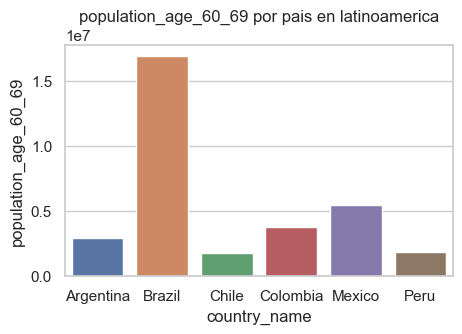

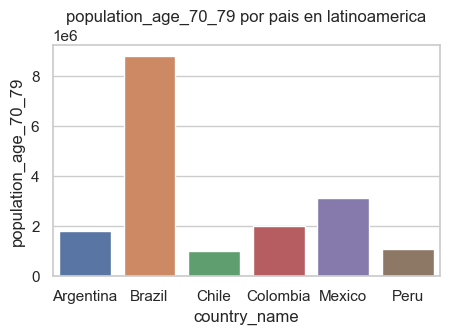

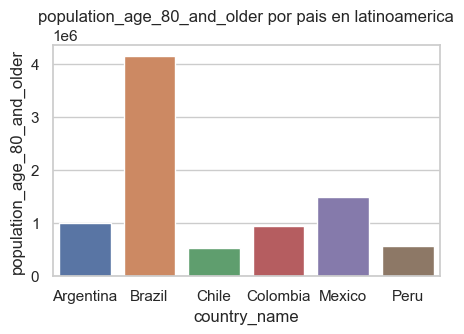

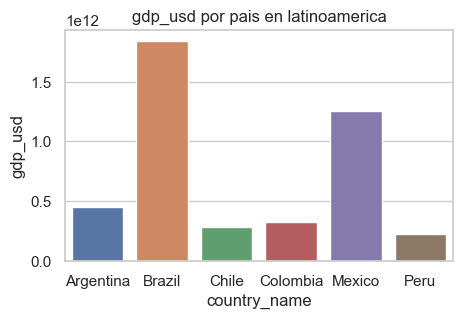

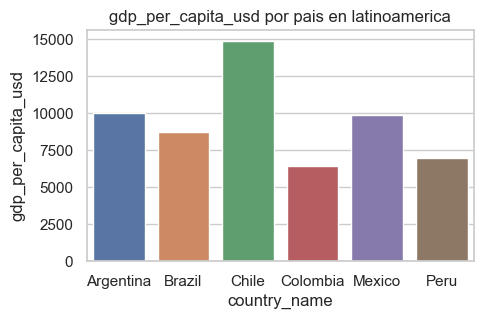

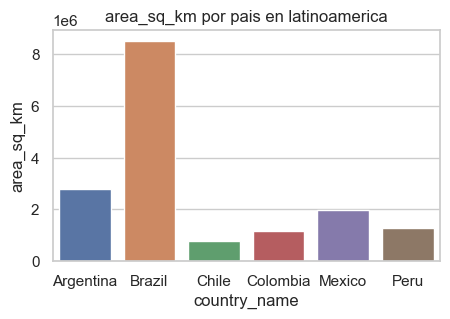

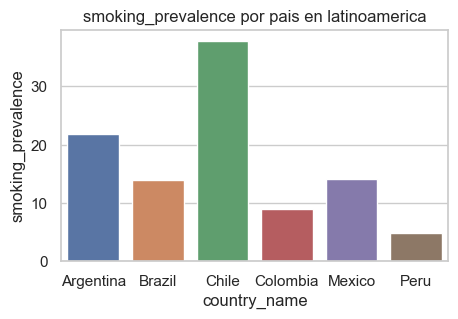

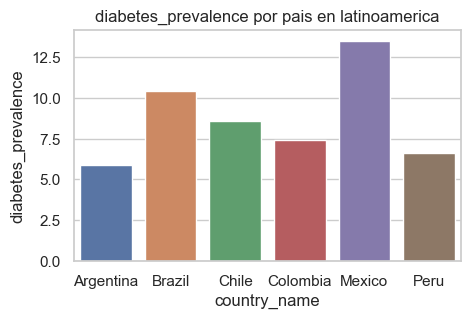

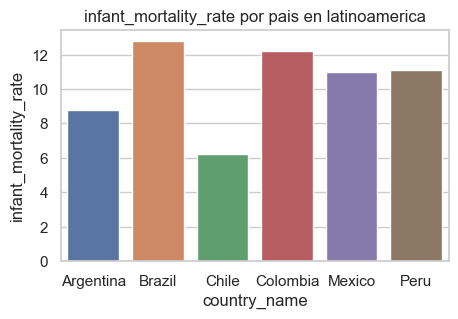

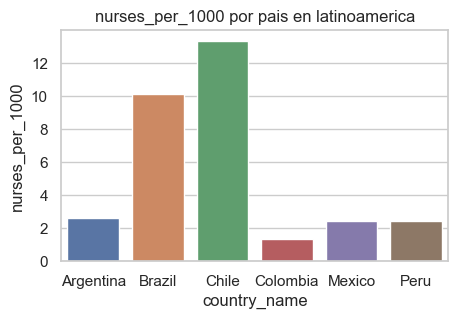

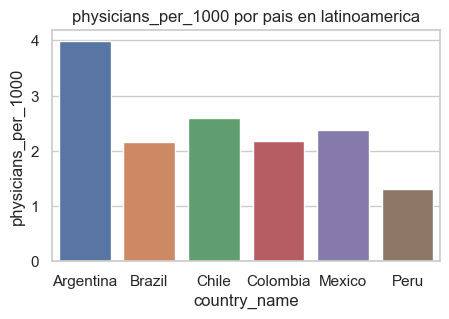

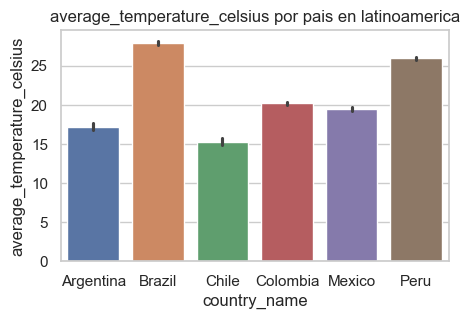

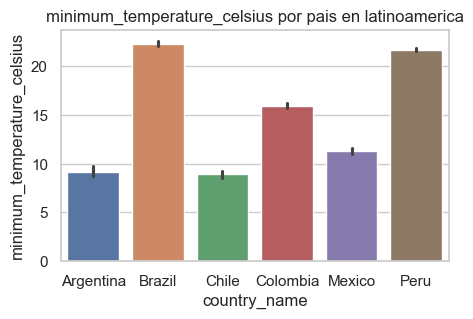

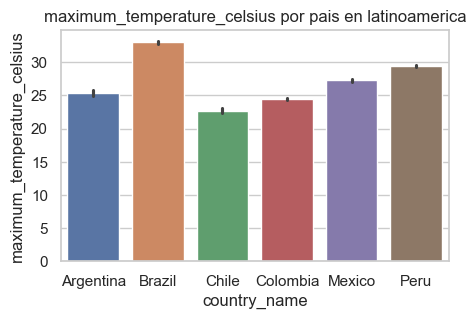

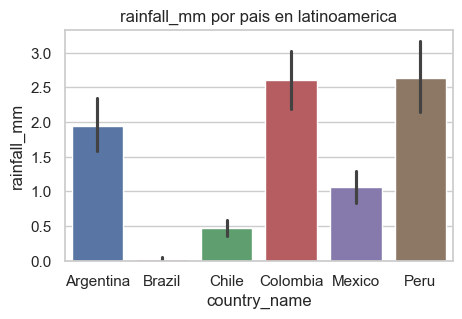

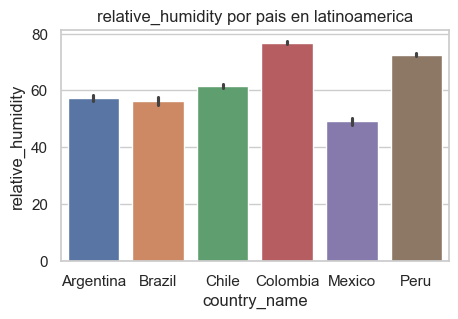

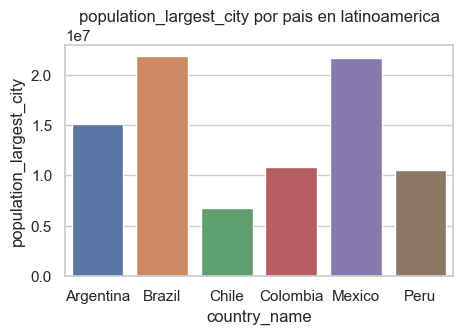

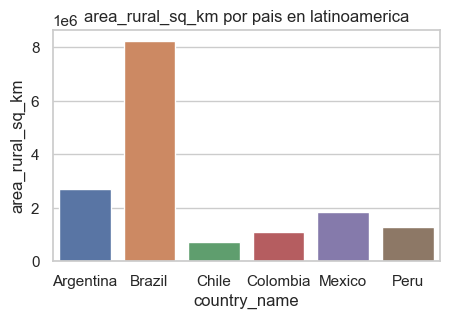

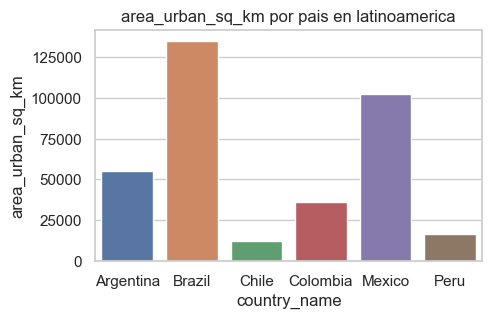

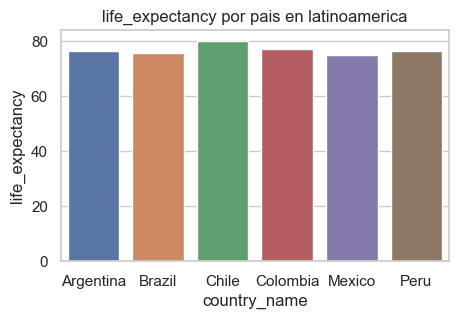

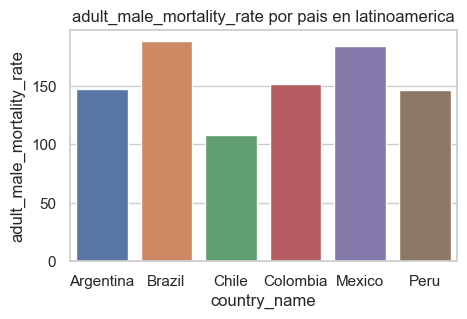

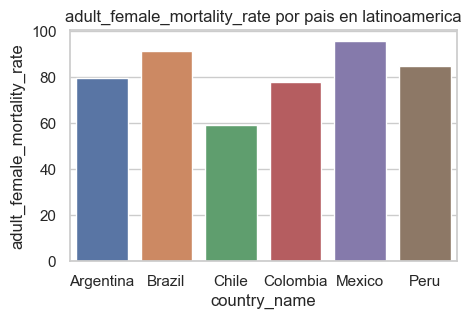

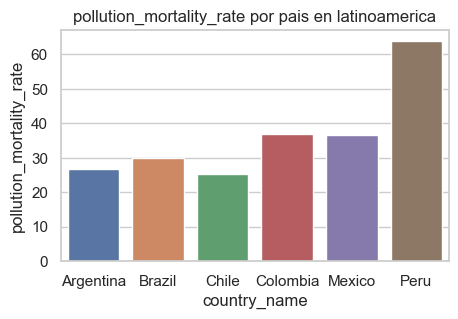

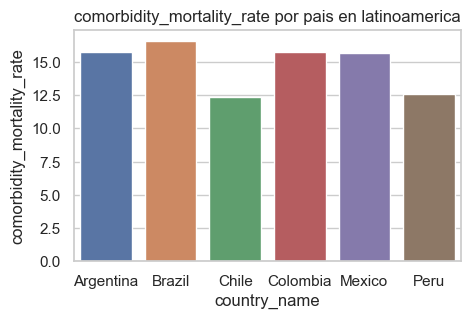

In [120]:
for i in df.columns:
    if i not in ["location_key", "date", "country_code","country_name","latitude","longitude","cumulative_confirmed","cumulative_deceased","cumulative_recovered","cumulative_vaccine_doses_administered","new_recovered"]:
        fig, ax = plt.subplots(figsize=(5,3))
        sns.barplot(x="country_name",y=i, data=df, ax=ax, hue = "country_name")
        plt.title(f'{i} por pais en latinoamerica')
        plt.show()

Realizamos una matriz de correlacion para verificar si existe alguna relación entre variables, esto nos ayudará en un analisis posterior.

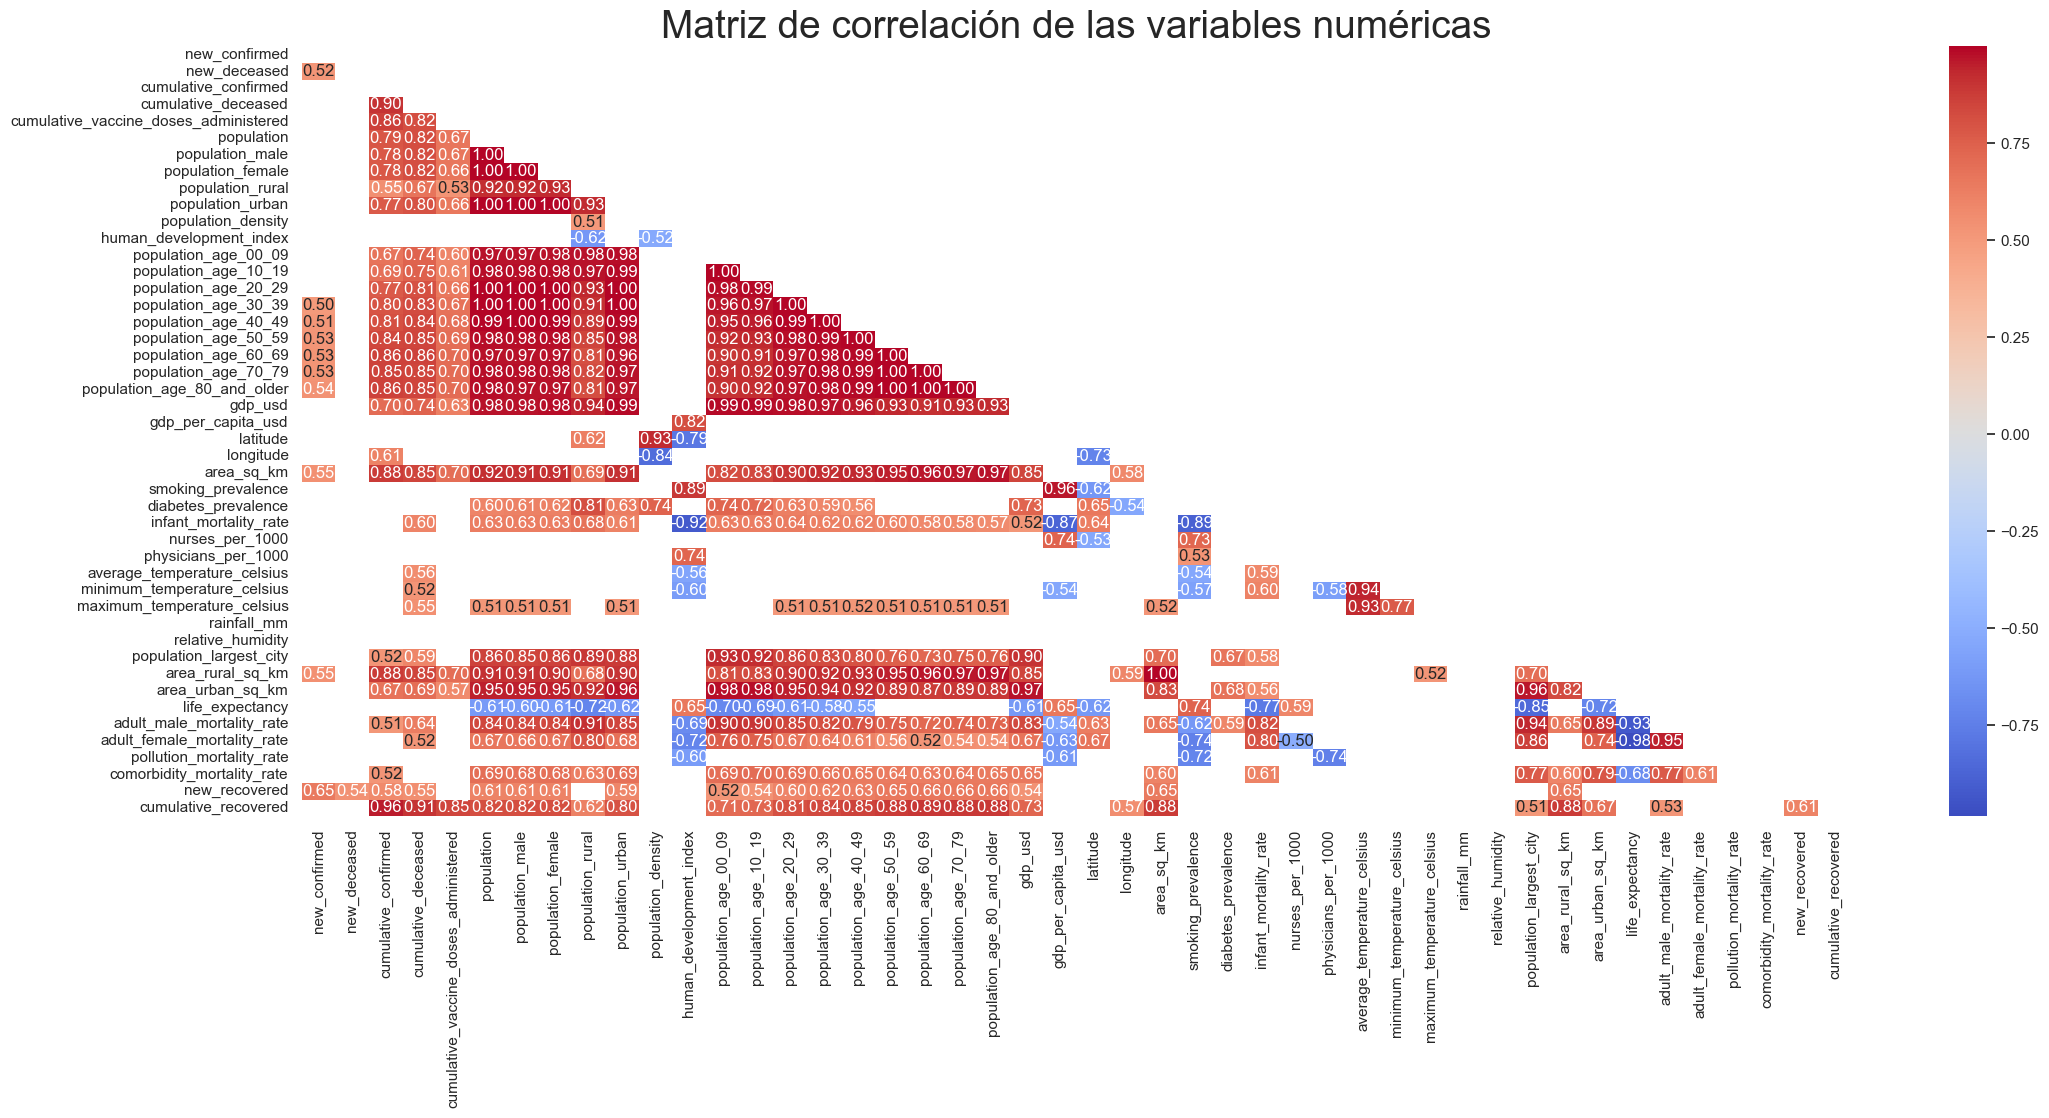

In [121]:
# Se crea la matriz de correlacion de las variables numéricas
numeric_columns = df.select_dtypes(include=["float64","int64"]).columns
correlation_matrix = df[numeric_columns].corr()
#aqui se crea la máscara para obtener yun triangulo superior en el heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# vamos a mostrar valores superiores a 0.5 para darle mas prioridad a correlaciones fuertes, tambien mostrará valores negativos
correlation_matrix = correlation_matrix[abs(correlation_matrix) > abs(0.5)]

# se crea el grafico
plt.figure(figsize=(25,10))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap= "coolwarm", fmt=".2f")
plt.title("Matriz de correlación de las variables numéricas", fontsize=28)
plt.grid(False)
plt.show()

Luego de sabercomo se correlacionan las variables, realizamos histogramas, esto proporciona información valiosa sobre la distribución y la frecuencia de los datos. Los histogramas permiten visualizar cómo se distribuyen los datos en cada variable y pueden ayudar a identificar patrones, tendencias y posibles anomalías.

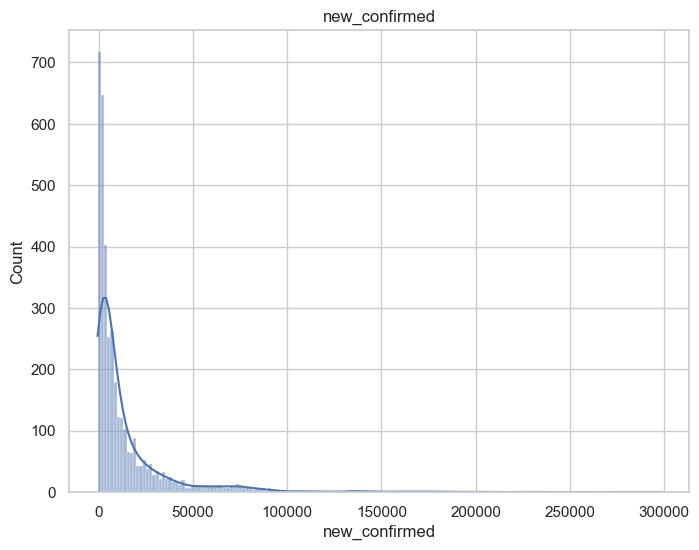

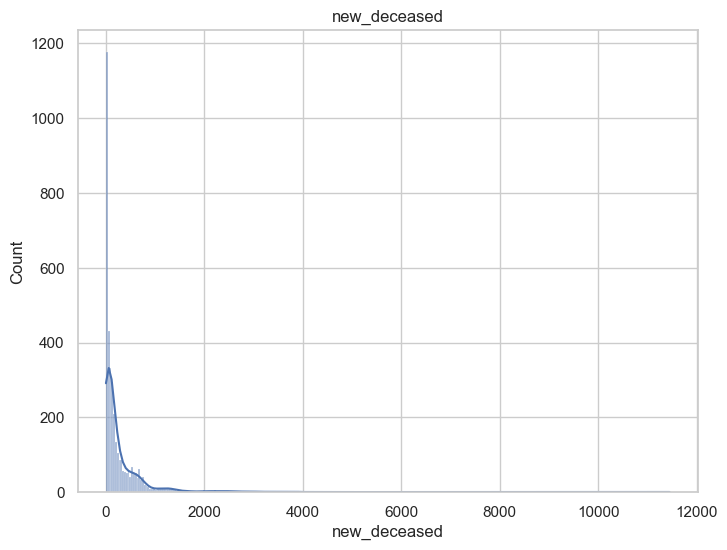

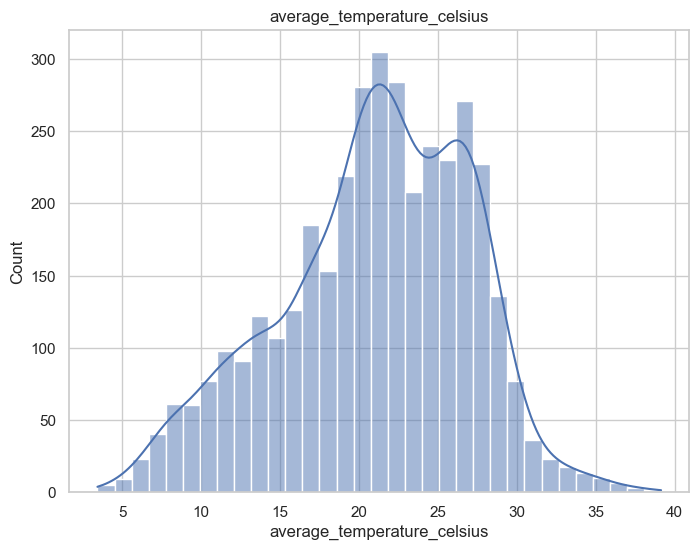

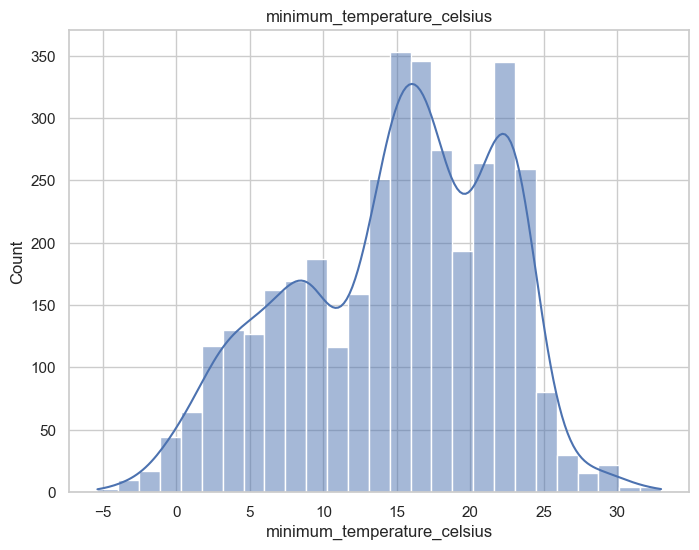

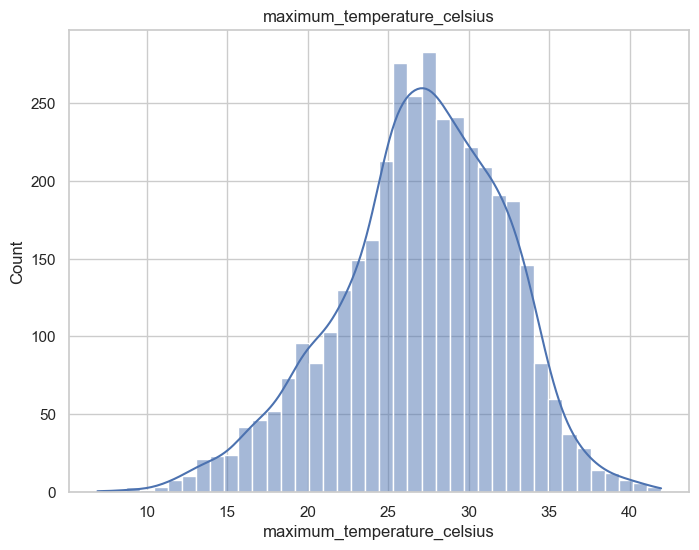

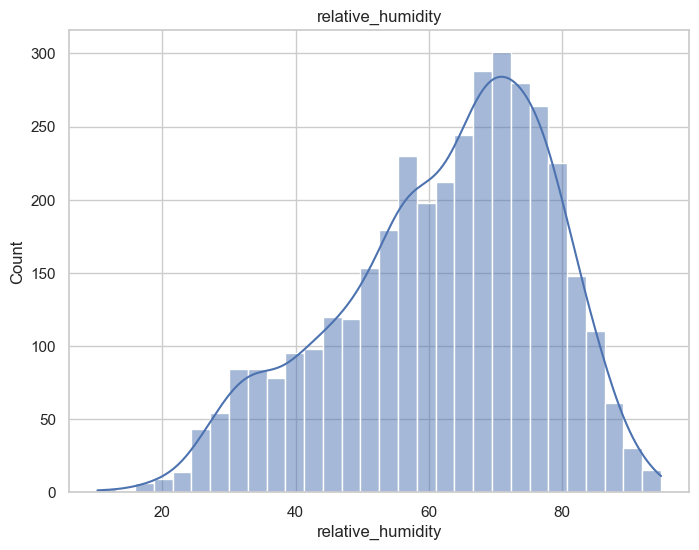

In [122]:
lista_columnas_6=["new_confirmed","new_deceased","cumulative_confirmed","cumulative_deceased","cumulative_vaccine_doses_administered","average_temperature_celsius","minimum_temperature_celsius","maximum_temperature_celsius","relative_humidity"]
#crear histogramas para variables numéricas
for i in df[lista_columnas_6]:
    if i not in ["location_key", "date", "country_code","country_name","latitude","longitude","cumulative_confirmed","cumulative_deceased","cumulative_recovered","cumulative_vaccine_doses_administered"]:
        fig, ax = plt.subplots(figsize=(8,6))
        sns.histplot(df[i], kde=True)
        plt.title(i)
        plt.show()

Diagrama de dispersión de la temperatura media contra los casos confirmados.

Los scatterplots son una herramienta esencial para visualizar y analizar la relación entre dos variables. Proporcionan insights sobre la dirección, fuerza, y forma de la relación, así como la presencia de outliers y clusters. 

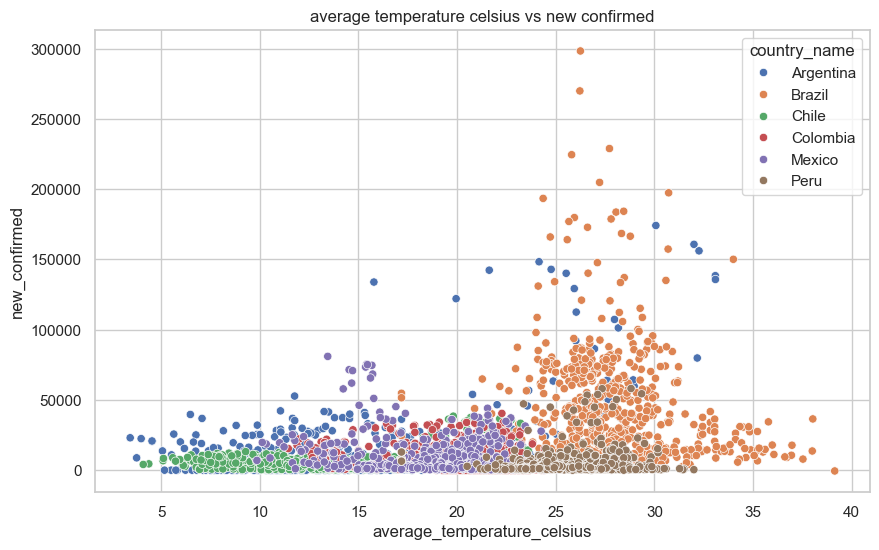

In [123]:
# Gráfico
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="average_temperature_celsius", y="new_confirmed",data=df, hue="country_name")
plt.title("average temperature celsius vs new confirmed")
plt.show()

Podemos visualizar que no existe una correlación alta entre los casos confirmados y las altas temperaturas. Si podemos decir que en Brasil se representan temperaturas altas y tienen un numero mayor de muertes, pero habría que visualizar bien la cantidad de población que tiene dicho país.

Diagrama de dispersión de la temperatura media contra las muertes confirmadas.

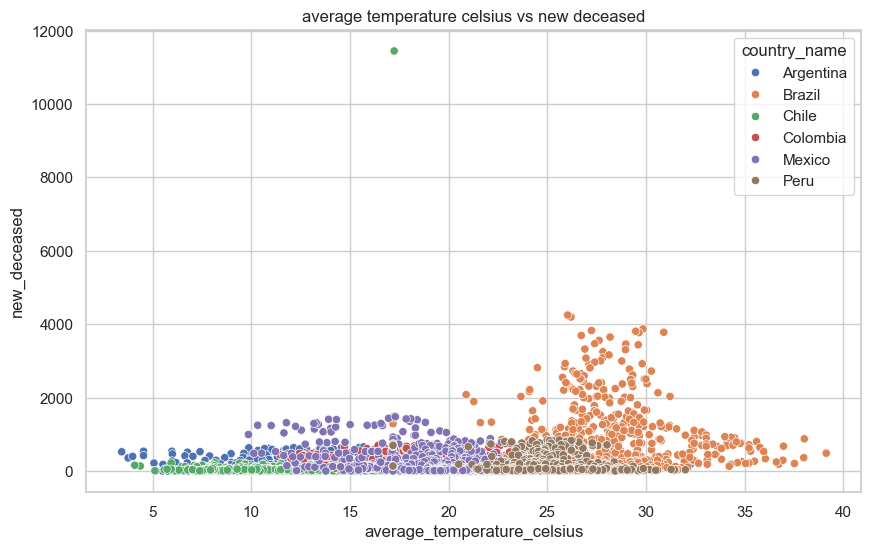

In [124]:
# Gráfico
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="average_temperature_celsius", y="new_deceased",data=df, hue="country_name")
plt.title("average temperature celsius vs new deceased")
plt.show()

Aquí tampoco podemos observar una fuerte correlación entre la temperatura y las muertes confirmadas, pero si podemos observar que hay un outlier en Chile.

In [125]:
# Eliminar la fila con el outlier
df = df[~((df['country_name'] == 'Chile') & (df['new_deceased'] > 11000))]


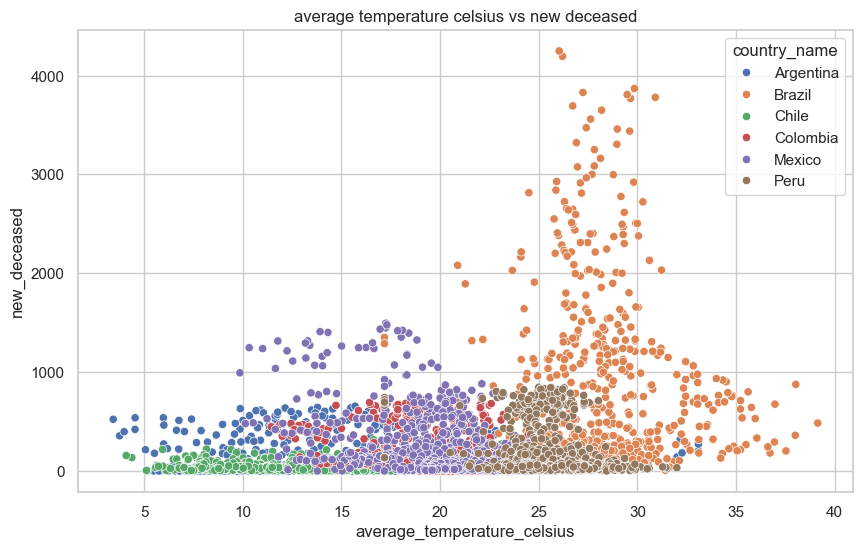

In [126]:
# Gráfico
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="average_temperature_celsius", y="new_deceased",data=df, hue="country_name")
plt.title("average temperature celsius vs new deceased")
plt.show()

Ahora con el outlier eliminado tenemos un mejor entendimiento de la gráfica. La conclusión la sigo manteniendo, no hay una correlación tan grande como para decir que la temperatura afecta al 100%. Solo ocurre en el caso de Brasil, pero este tiene temperaturas altas de por si.

Comportamiento de las dosis administradas de todos los países (Valor medio).

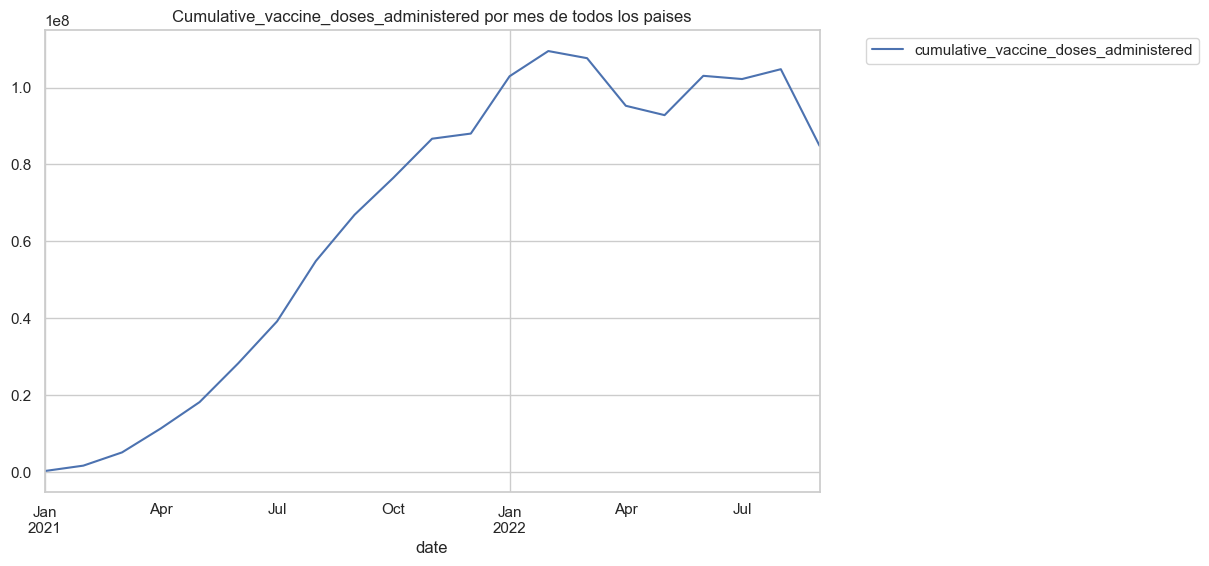

In [127]:
# Graficade valores medios de todos los paises cumulative_vaccine_doses_administered
fig, ax = plt.subplots(figsize=(10,6))
df.resample("ME").mean(numeric_only=True)["cumulative_vaccine_doses_administered"].plot()
plt.legend(bbox_to_anchor=(1.05,1), loc = "upper left")
plt.title("Cumulative_vaccine_doses_administered por mes de todos los paises")
plt.show()

Vemos una curva a lo largo del tiempo que crece de forma fuerte, con una tendencia a bajar en el mes de Julio

Evolución de dosis administradas por mes de cada país.

<function matplotlib.pyplot.show(close=None, block=None)>

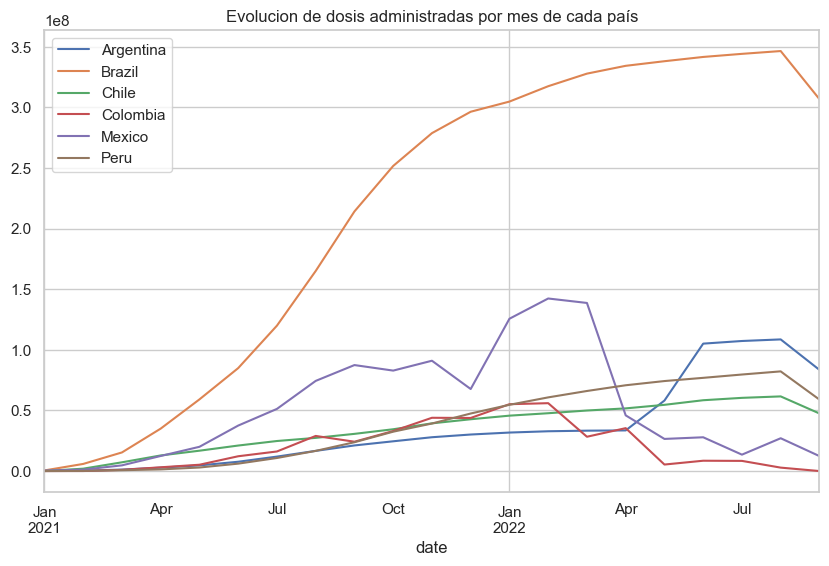

In [128]:
fig, ax = plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    df[df["country_name"]==pais].resample("ME").mean(numeric_only=True)["cumulative_vaccine_doses_administered"].plot()
plt.title("Evolucion de dosis administradas por mes de cada país")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.legend(paises_seleccionados)
plt.show

concluimos que la curva general que habiamos visto en el gráfico anterior se debe a la clara influencia de Brasil, esto sigue sin proporcionarnos muchas respuestas de cara al enfoque general del proyecto ya que no hemos analizado que densidad tiene la población de cada uno.

Lo notorio si es que en Julio se produce una baja luego del "Peak"

Muertes por mes de cada país.

<function matplotlib.pyplot.show(close=None, block=None)>

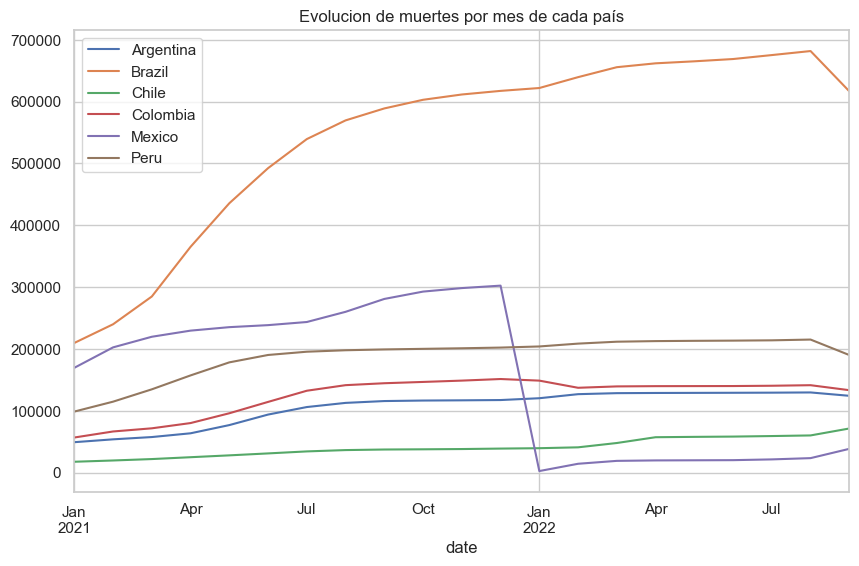

In [129]:
fig, ax = plt.subplots(figsize=(10,6))
for pais1 in paises_seleccionados:
    df[df["country_name"]==pais1].resample("ME").mean(numeric_only=True)["cumulative_deceased"].plot()
plt.title("Evolucion de muertes por mes de cada país")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.legend(paises_seleccionados)
plt.show

Por lo pronto se nota que Chile fue de los países que mejor han manejado la pandemia, y que Mexico tuvo una baja de muertes considerables luego de la influencia de las vacunas en el mes de Marzo 

 Casos confirmados por mes de cada país.

<function matplotlib.pyplot.show(close=None, block=None)>

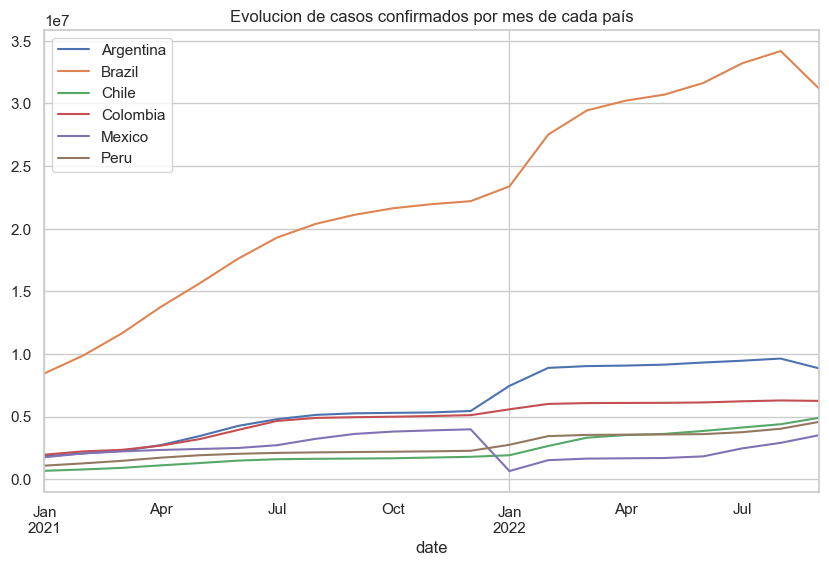

In [130]:
fig, ax = plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    df[df["country_name"]==pais].resample("ME").mean(numeric_only=True)["cumulative_confirmed"].plot()
plt.title("Evolucion de casos confirmados por mes de cada país")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.legend(paises_seleccionados)
plt.show

Aqui se logra apreciar un incremento en los casos ocnfirmados luego de julio, pero con una curva muy leve. Sigo reafirmando que Chile manejo muy b ien la pandemia, seguido de Peru, Argentina y Colombia. Esto igual no tiene el peso adecuado para influir en una decisión debido a la población de cada país.

Evolucion de casos recuperados por mes de cada país

<function matplotlib.pyplot.show(close=None, block=None)>

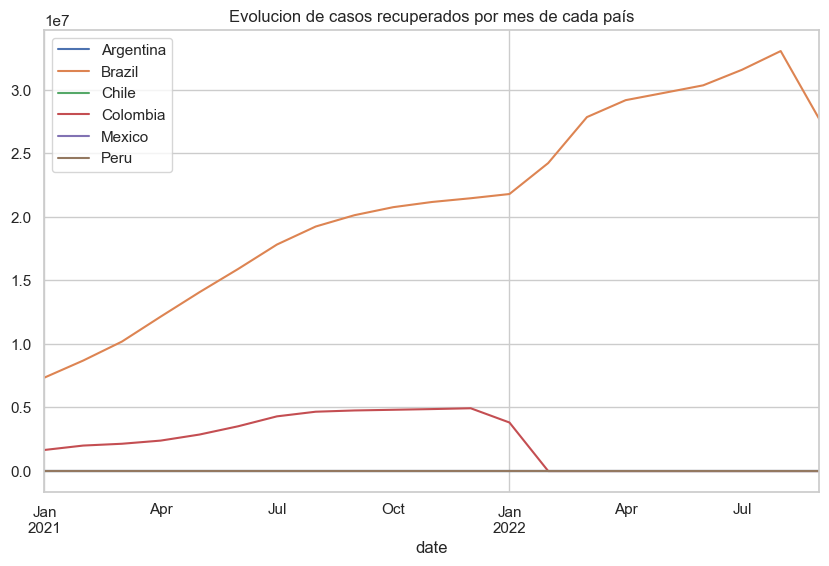

In [131]:
fig, ax = plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    df[df["country_name"]==pais].resample("ME").mean(numeric_only=True)["cumulative_recovered"].plot()
plt.title("Evolucion de casos recuperados por mes de cada país")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.legend(paises_seleccionados)
plt.show

Se observa el Peak claro que hablabamos en el mes de Julio

Comparación del Número de Casos Nuevos entre Países.

<function matplotlib.pyplot.show(close=None, block=None)>

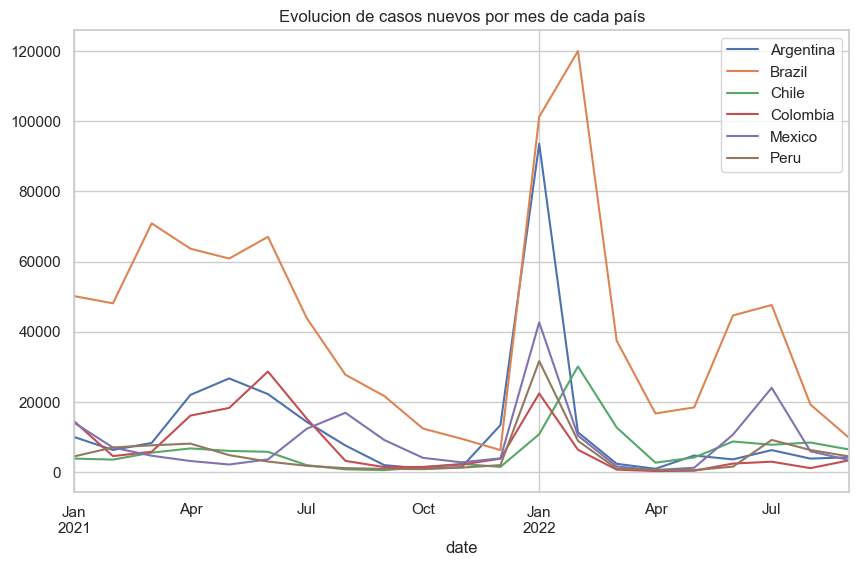

In [132]:
fig, ax = plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    df[df["country_name"]==pais].resample("ME").mean(numeric_only=True)["new_confirmed"].plot()
plt.title("Evolucion de casos nuevos por mes de cada país")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.legend(paises_seleccionados)
plt.show

Dosis acumuladas por país

Histogramas y gráficos de densidad
Generaremos histogramas y gráficos de densidad para new_confirmed y cumulative_vaccine_doses_administered.

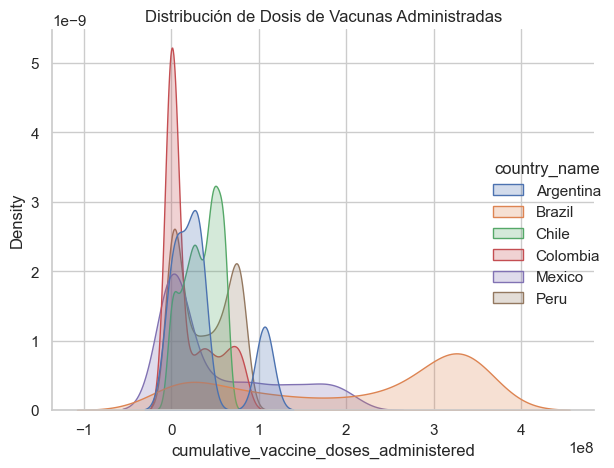

In [133]:
# Histograma y gráfico de densidad para 'cumulative_vaccine_doses_administered'
sns.displot(df,x='cumulative_vaccine_doses_administered', kind="kde", hue="country_name", fill=True)
plt.title('Distribución de Dosis de Vacunas Administradas')

plt.tight_layout()
plt.show()

Boxplot de temperatura media de cada país.

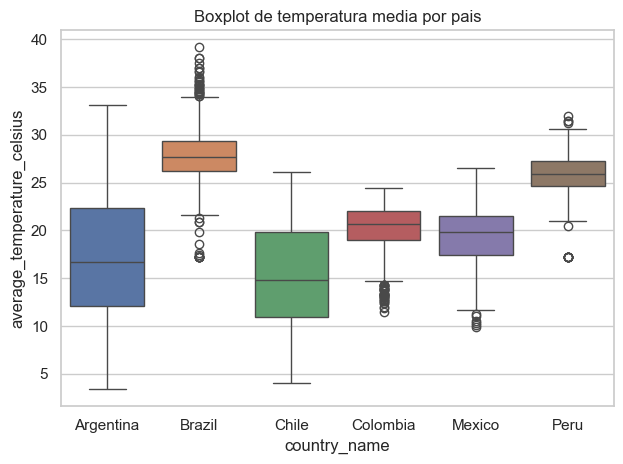

In [134]:

sns.boxplot(data=df,x='country_name',y= "average_temperature_celsius", hue="country_name")
plt.title('Boxplot de temperatura media por pais')

plt.tight_layout()
plt.show()

Podemos observar un poco las bajas temperaturas que maneja chile  y argentina. Brasil por otra parte presenta outliers, pero que en este caso tienen valor, porque se sabe que en regiones especificas de Brasil hace mas calor del normal en otras partes.

Violinplot de las variables que “Sí” tenga cambios de valores.

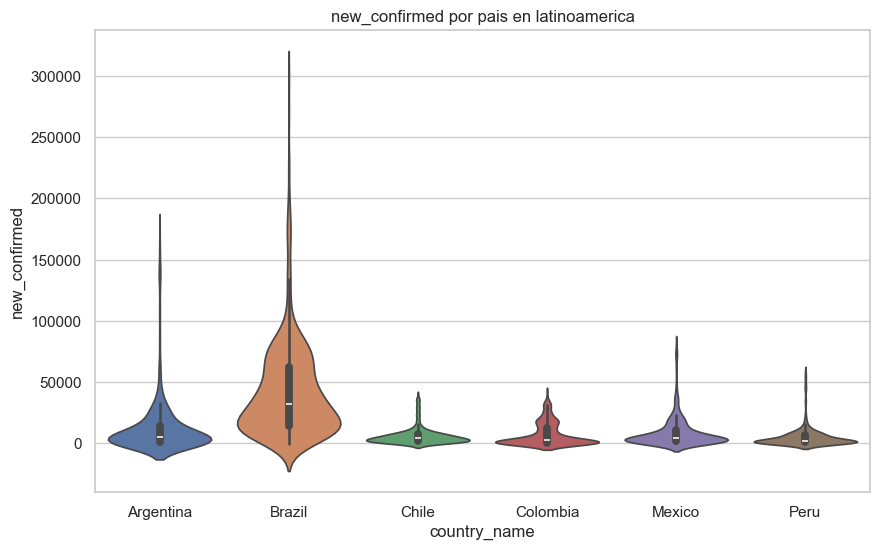

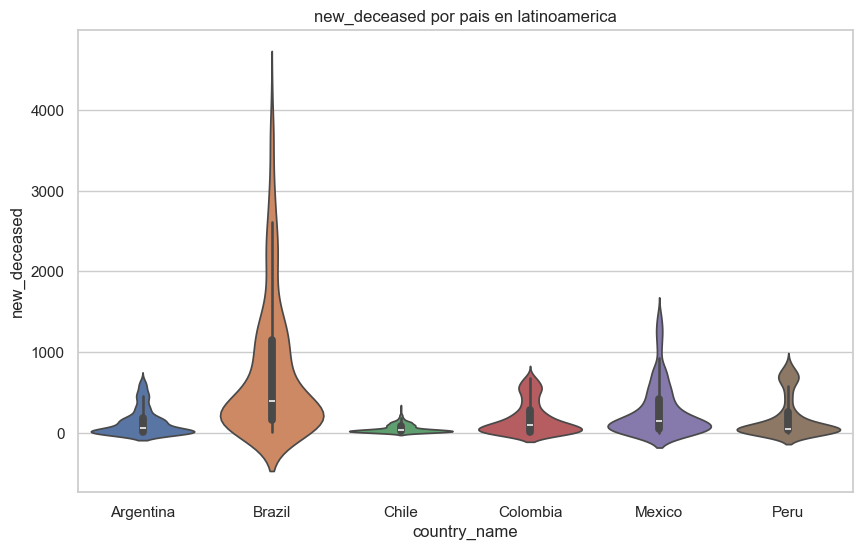

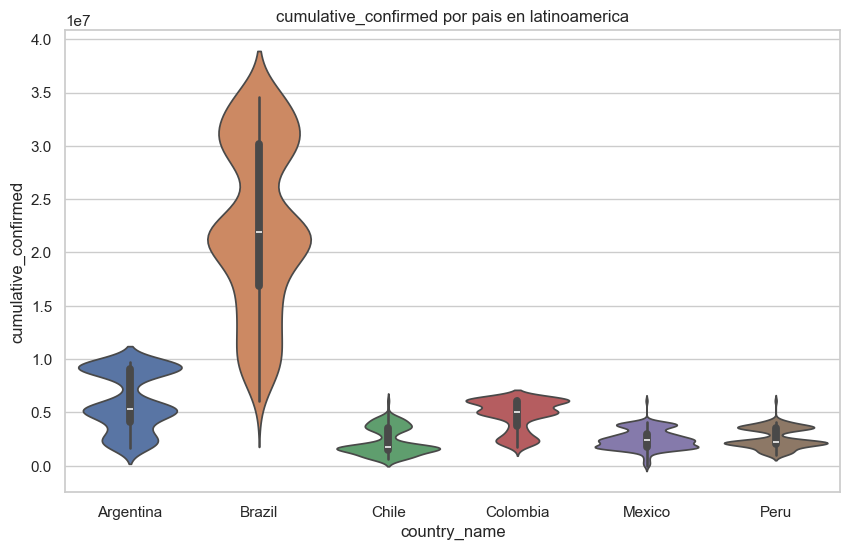

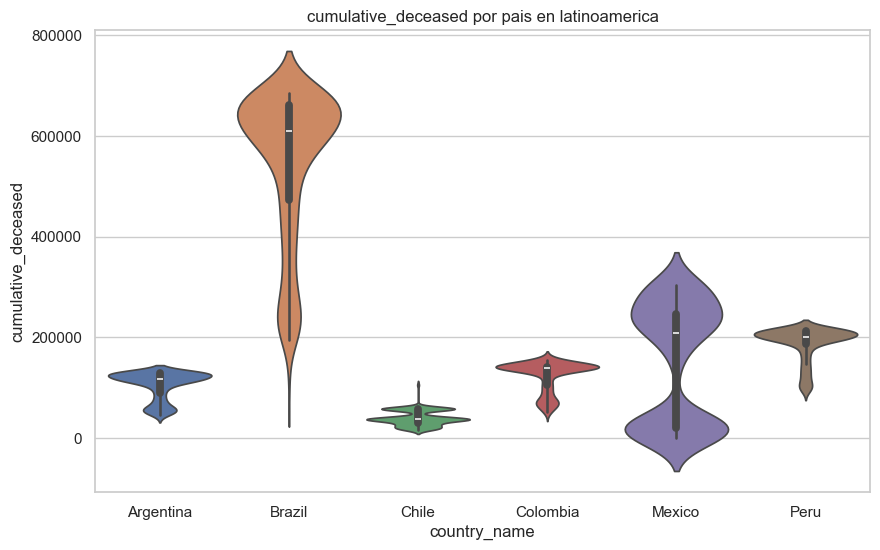

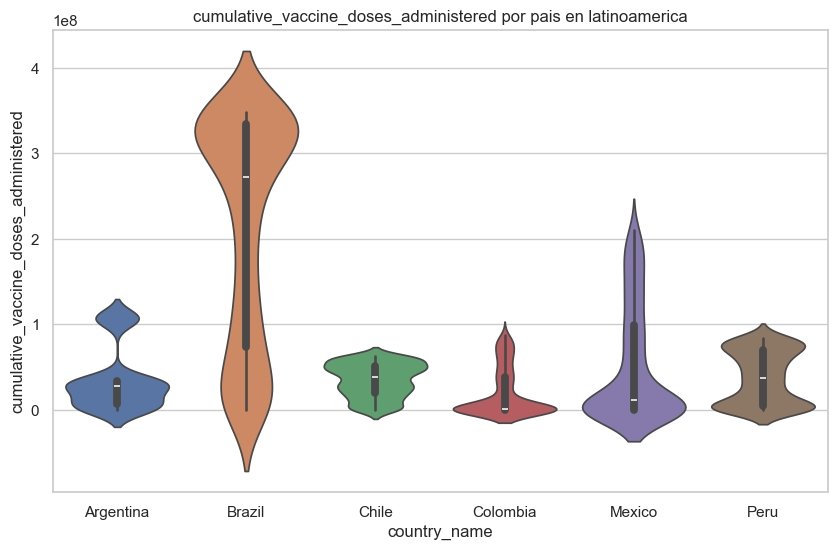

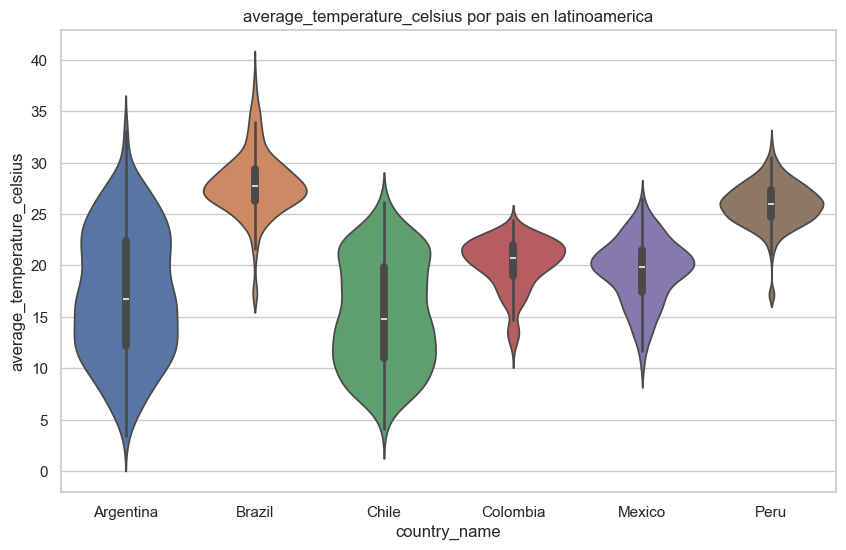

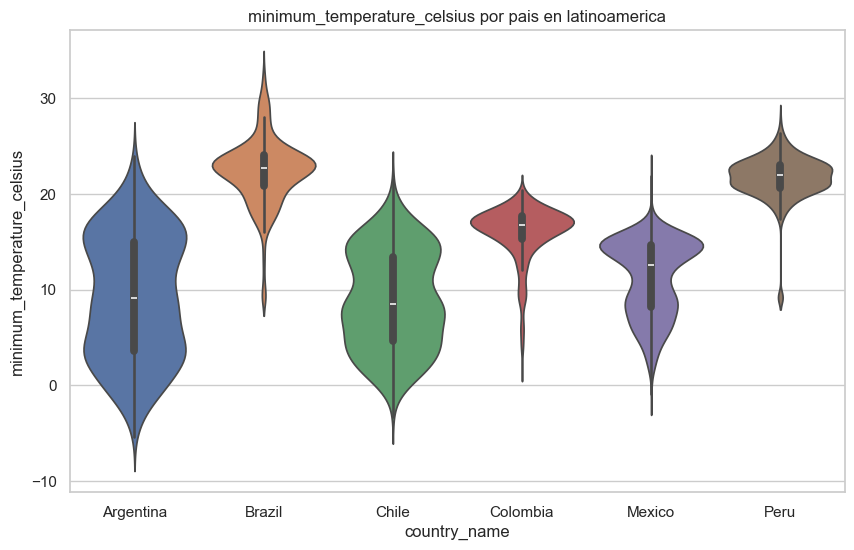

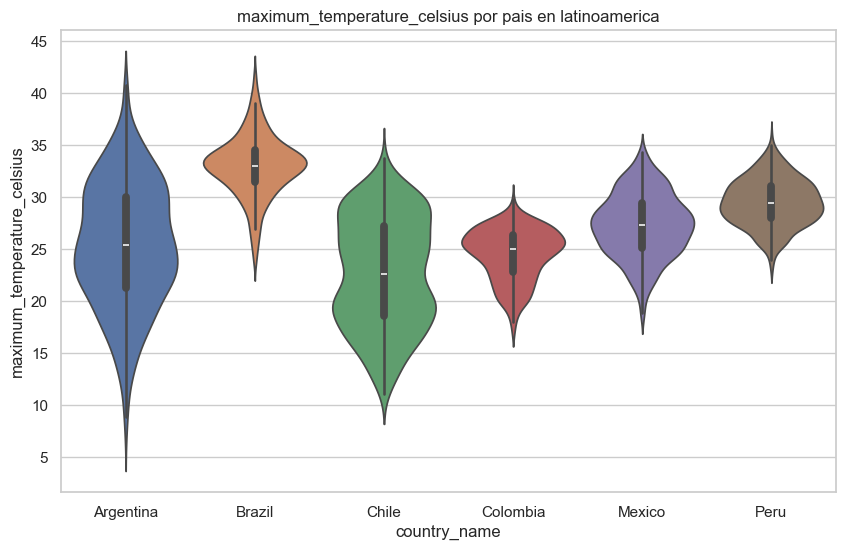

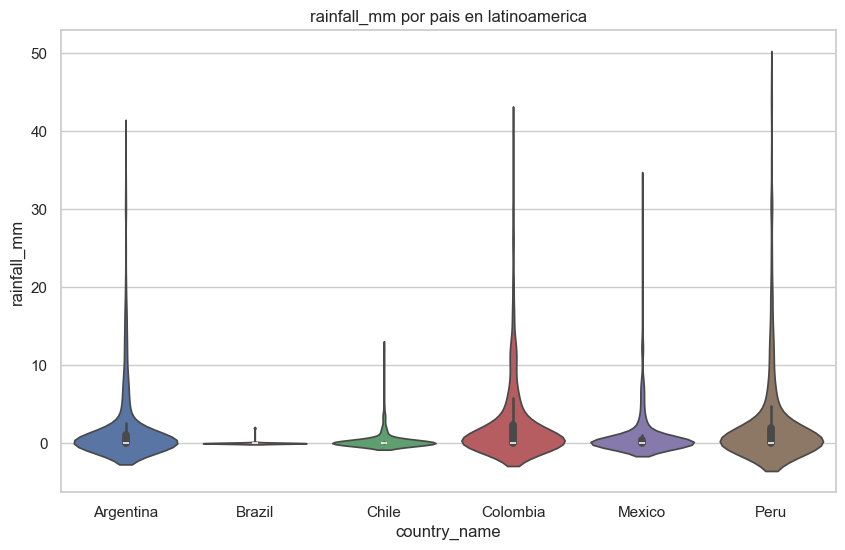

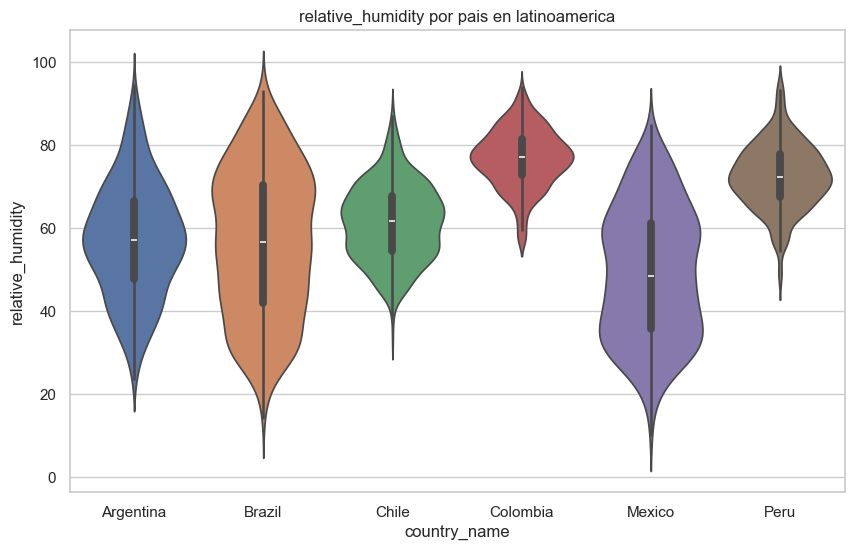

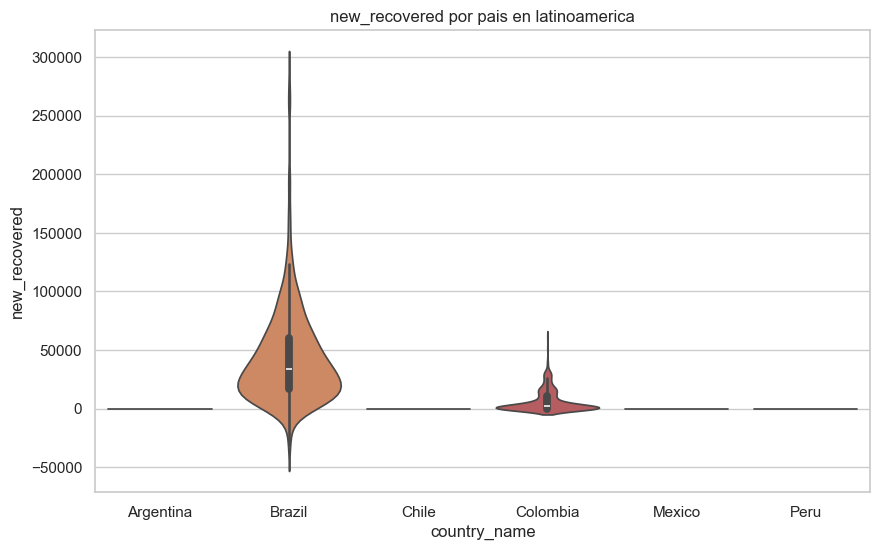

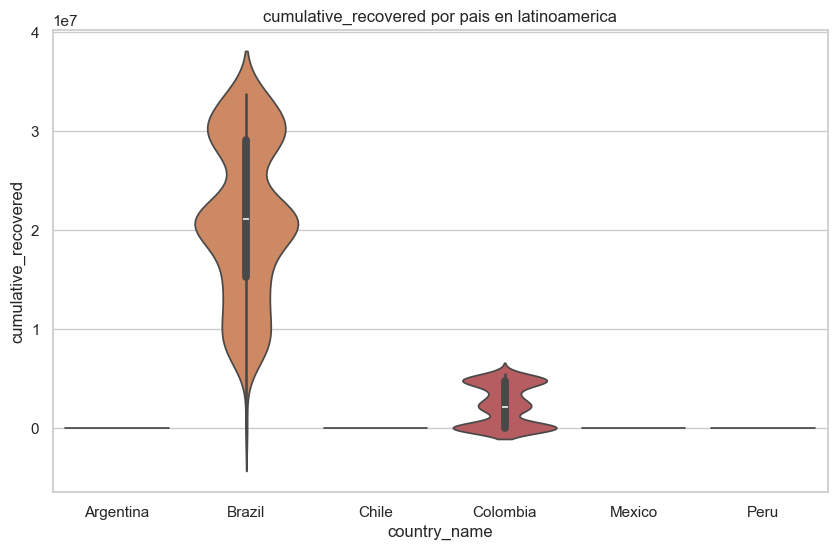

In [135]:
columnas_mayores_6 = []
for i in df.columns:
    if i not in ["location_key","date","country_code","latitude","longitude"]:
        if df[i].nunique()>6:
            columnas_mayores_6.append(i)
#agregar a columnas mayores 6 la columna country name para poder hacer analisis por pais,
columnas_mayores_6.append("country_name")

#se crea un df con las columnas mayores a 6
df_mayores_6 = df[columnas_mayores_6]

#violinplot en todos los paises para variables numericas
for i in df_mayores_6.columns:
    if i not in ["location_key","date","country_code","latitude","longitude","country_name"]:
        fig, ax = plt.subplots(figsize=(10,6))
        sns.violinplot(x="country_name", y=i, data=df_mayores_6, hue="country_name")
        plt.title(f"{i} por pais en latinoamerica")
        plt.show()

Distribución de la población por grupos de edad.

In [136]:
df.head(5)

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   

            population_male  ...  population_largest_city  area_rural_sq_km  \
date                         ...                                              
2021-01-02       19523766.0  ...               15057273.0         2690269.0   
2021-01-03       19523766.0  ...               15057273.0         2690269.0   
2021-01-04       19523766.0  ...               15057273.0         2690269.0   
2021-01-05       19523766.0  ...               15057273.0         2690269.0   
2021-01-06       19523766.0  ...               15057273.0         2690269.0   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                                                                       
2021-01-02           55032.0            76.52                    147.086   
2021-01-03           55032.0            76.52                    147.086   
2021-01-04           55032.0            76.52                    147.086   
2021-01-05           55032.0            76.52                    147.086   
2021-01-06           55032.0            76.52                    147.086   

            adult_female_mortality_rate  pollution_mortality_rate  \
date                                                                
2021-01-02                       79.483                      26.6   
2021-01-03                       79.483                      26.6   
2021-01-04                       79.483                      26.6   
2021-01-05                       79.483                      26.6   
2021-01-06                       79.483                      26.6   

            comorbidity_mortality_rate  new_recovered  cumulative_recovered  
date                                                                         
2021-01-02                        15.8            0.0                   0.0  
2021-01-03                        15.8            0.0                   0.0  
2021-01-04                        15.8            0.0                   0.0  
2021-01-05                        15.8            0.0                   0.0  
2021-01-06                        15.8            0.0                   0.0  

[5 rows x 49 columns]

In [137]:
df.columns

Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 

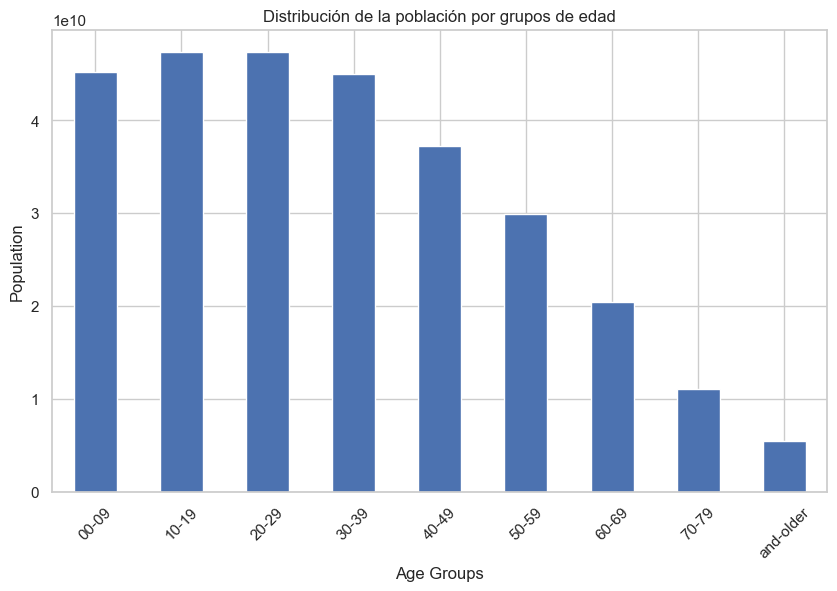

In [138]:
msk_age = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older']
df_mask_age = df[msk_age].sum()
plt.figure(figsize=(10,6))
df_mask_age.plot(kind='bar', stacked=True)
plt.xlabel('Age Groups')
plt.ylabel('Population')
plt.title('Distribución de la población por grupos de edad')
plt.xticks(range(len(msk_age)), [col.split('_')[-2] + '-' + col.split('_')[-1] for col in msk_age], rotation=45)
plt.show()

Mapa de calor de Métricas por país.

In [139]:
# Selecciono las variables númericas que quiero correlacionar
columns_of_interest = ['cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'average_temperature_celsius', 'population','cumulative_vaccine_doses_administered', "country_name"]

df_subset = df[columns_of_interest]

In [140]:
# Agrupar por país y calcular la media de las métricas
df_grouped = df_subset.groupby('country_name').mean().reset_index()

print("\nDataFrame agrupado:")
print(df_grouped)


DataFrame agrupado:
  country_name  cumulative_confirmed  cumulative_deceased  \
0    Argentina          6.079579e+06        105716.119355   
1       Brazil          2.248731e+07        544611.498780   
2        Chile          2.262405e+06         40203.499964   
3     Colombia          4.774079e+06        124322.085701   
4       Mexico          2.478018e+06        152579.412433   
5         Peru          2.599359e+06        188420.787624   

   cumulative_recovered  average_temperature_celsius   population  \
0          0.000000e+00                    17.180877   44938712.0   
1          2.107883e+07                    27.890824  212559409.0   
2          0.000000e+00                    15.262037   17574003.0   
3          2.287553e+06                    20.161280   50882884.0   
4          0.000000e+00                    19.432547  110991953.0   
5          0.000000e+00                    25.926247   29381884.0   

   cumulative_vaccine_doses_administered  
0                       

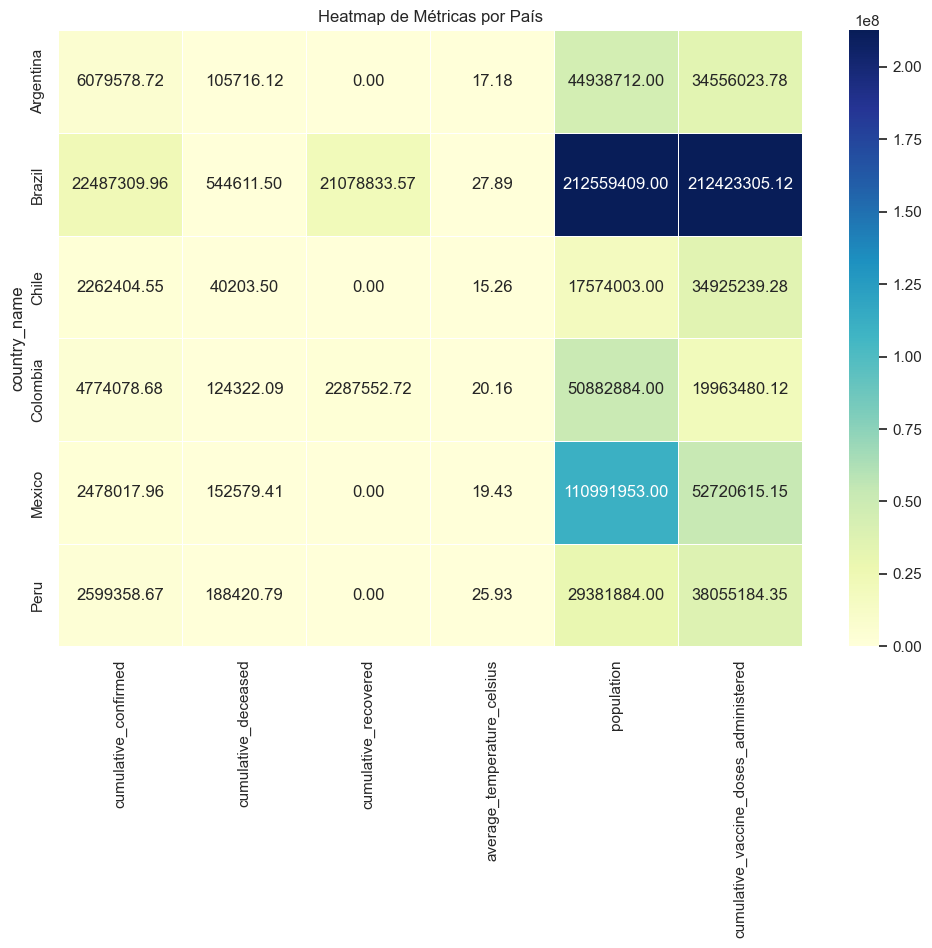

In [141]:
# Establecer la columna 'country_name' como índice
df_grouped.set_index('country_name', inplace=True)

# Crear el heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(df_grouped, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=.5)
plt.title('Heatmap de Métricas por País')
plt.show()

Este grafico nos aporta mucho, como por ejemplo que brasil tiene el doble de población que Mexico, y comparado ocn los demás países tiene 300% o + en todos los casos.

Diagrama de barras apilado de comparación de la tasa de mortalidad masculina vs. femenina por país.

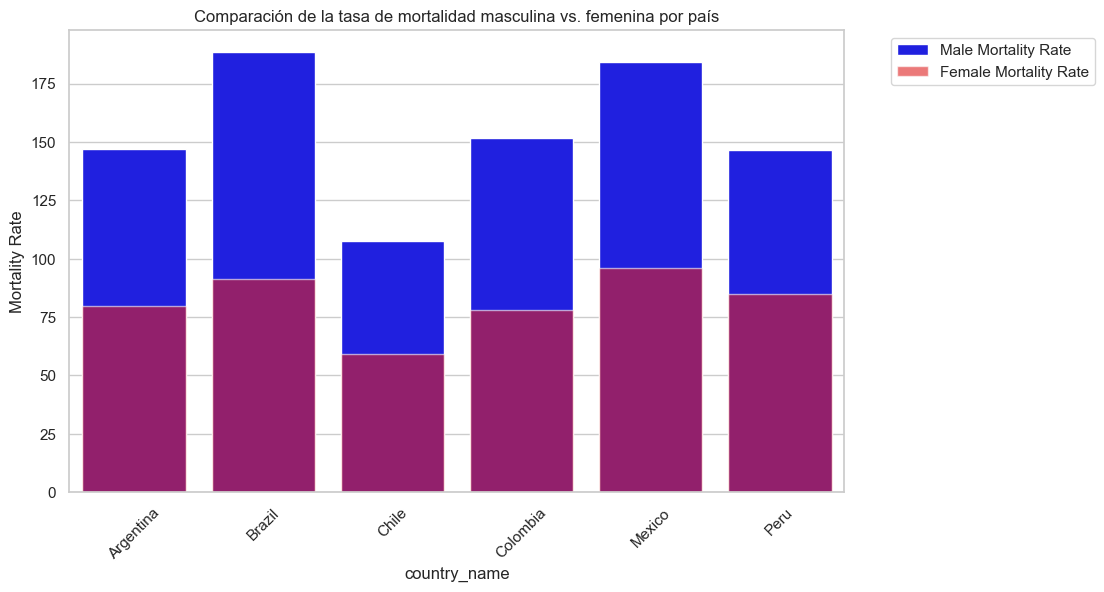

In [142]:
# Grafica de mortalidad por genero. Tasa de Mortalidad entendida en Cantidad de muertes cada 1.000.000 de habitantes

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='country_name', y='adult_male_mortality_rate', color='blue', label='Male Mortality Rate')
sns.barplot(data=df, x='country_name', y='adult_female_mortality_rate', color='red', alpha=0.6, label='Female Mortality Rate')
plt.xticks(rotation=45)
plt.ylabel('Mortality Rate')
plt.title('Comparación de la tasa de mortalidad masculina vs. femenina por país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Se observa un mayor porcentaje de mortlaidad en el sexo masculino

Matriz de correlación de indicadores demográficos y de salud.

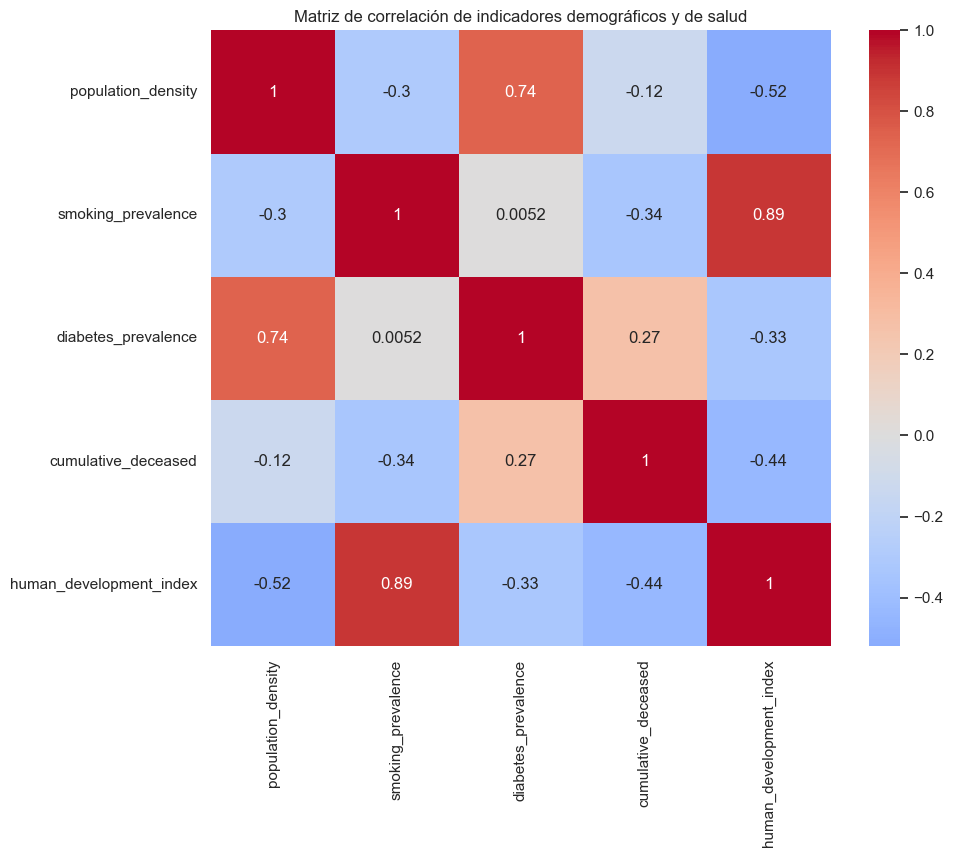

In [143]:
# Selecciono las variables númericas que quiero correlacionar
columns = ['population_density', 'smoking_prevalence', 'diabetes_prevalence', 'cumulative_deceased', 'human_development_index']
correlation_matrix = df[columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación de indicadores demográficos y de salud')
plt.show()

De esta matriz podemos observar que el fumar y tener diabetes son las enfermedades preexistentes que más afectan a la población en los paises seleccionados, por lo que se podría decir que estas enfermedades son las que más han causado muertes en los paises seleccionados, sin embargo esto no quiere decir que sean las únicas enfermedades que han causado muertes sino que son las más comúnes.

De acuerdo a esto veamos se comporta la mortalidad en los paises seleccionados por enfermedades preexistentes o comorbilidades.

También se puede observar que hay una correlacion con el HDI, metrica clave para definir calidades de vida en un país.

Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad.

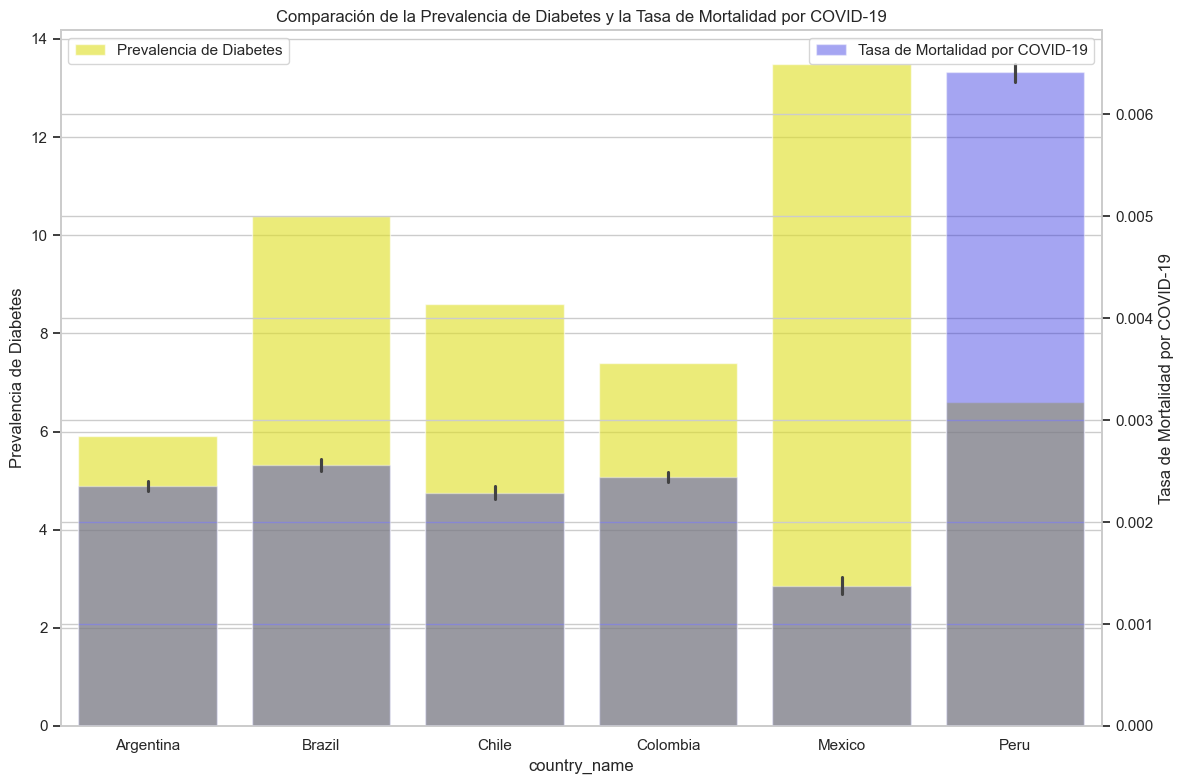

In [144]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.barplot(data=df, 
            x= df['country_name'], 
            y= df['diabetes_prevalence'], 
            color='yellow', 
            label='Prevalencia de Diabetes',
            ax=ax,
            alpha=0.6
)

ax2 = ax.twinx()

sns.barplot(data=df, 
            x= df['country_name'], 
            y= df['cumulative_deceased'] / df['population'],
            color='Blue', 
            label='Tasa de Mortalidad por COVID-19', 
            ax=ax2,
            alpha=0.4)

plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Diabetes')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
plt.title('Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()

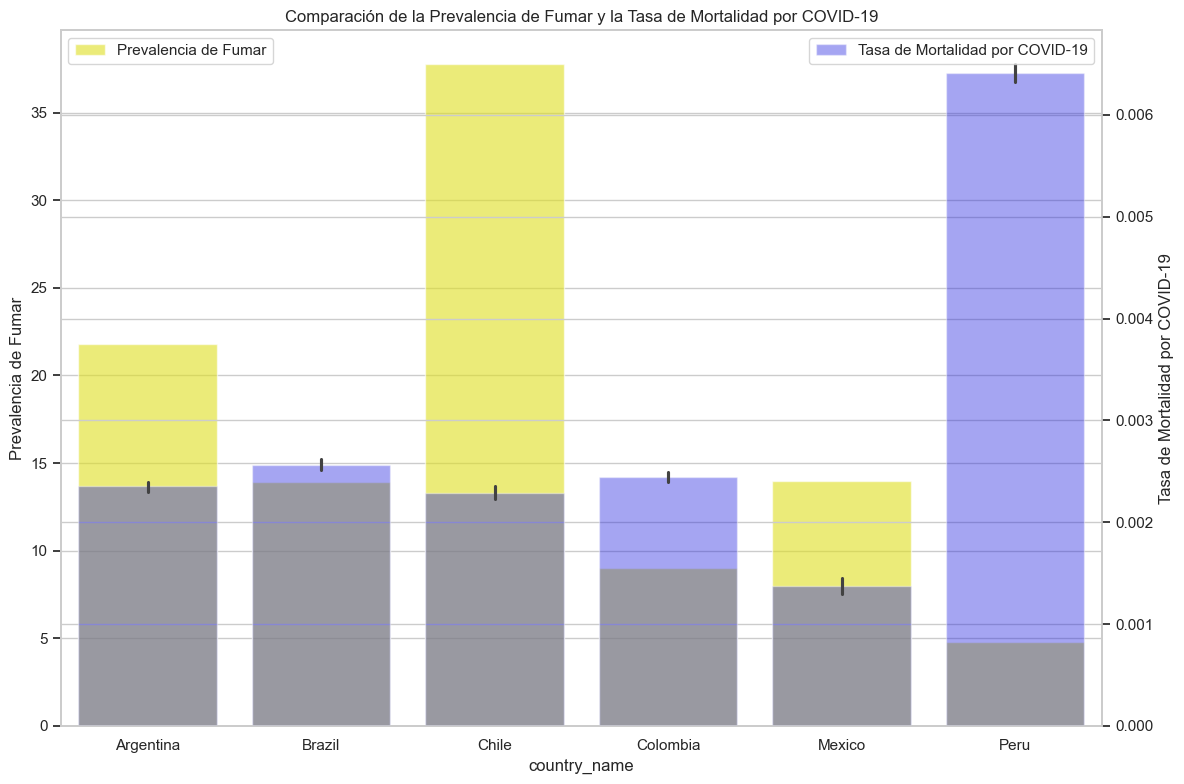

In [145]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.barplot(data=df, 
            x= df['country_name'], 
            y= df['smoking_prevalence'], 
            color='yellow', 
            label='Prevalencia de Fumar',
            ax=ax,
            alpha=0.6)

ax2 = ax.twinx()

sns.barplot(data=df, 
            x= df['country_name'], 
            y= df['cumulative_deceased'] / df['population'], 
            color='Blue', 
            label='Tasa de Mortalidad por COVID-19', 
            ax=ax2,
            alpha=0.4)

plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Fumar')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Comparación de la Prevalencia de Fumar y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()

Las dos enfermedades muestran un comportamiento similar en los paises seleccionados, sin embargo se puede observar que la diabetes es la enfermedad que más ha causado muertes en los paises seleccionados, seguido del fumar.

Como conclusión de este avance podemos decir que los paises que más necesitan ayuda son Brasil, México y Colombia, ya que son los paises que más casos confirmados y muertes han tenido, además de ser los paises que menos vacunas han administrado.

Las enfermedades preexistentes que más han afectado a la población en los paises seleccionados son el fumar y la diabetes, por lo que se podría decir que estas enfermedades son las que más han causado muertes en los paises seleccionados (Aclarar que esto no quiere decir que sean las únicas enfermedades que han causado muertes sino que son las más comúnes y de las que tenemos datos).

# AVANCE 3

In [146]:
# Carga de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Realiza un análisis exploratorio detallado utilizando técnicas avanzadas de Pandas y Numpy, centrándote en el análisis de series temporales para comprender la evolución de elementos específicos del conjunto de datos.
 Para ello, puedes empezar por identificar tendencias, estacionalidad y patrones temporales relevantes, análisis de autocorrelación y descomposición de series temporales. 

In [147]:
df = pd.read_csv("datos_finales_filtrados.csv")
df

location_key        date country_code country_name  new_confirmed  \
0              AR  2021-01-02           AR    Argentina    7767.000000   
1              AR  2021-01-03           AR    Argentina    4934.000000   
2              AR  2021-01-04           AR    Argentina   13953.000000   
3              AR  2021-01-05           AR    Argentina   14085.000000   
4              AR  2021-01-06           AR    Argentina   14496.000000   
...           ...         ...          ...          ...            ...   
3739           PE  2022-09-13           PE         Peru    1150.000000   
3740           PE  2022-09-14           PE         Peru   12911.385484   
3741           PE  2022-09-15           PE         Peru   12911.385484   
3742           PE  2022-09-16           PE         Peru   12911.385484   
3743           PE  2022-09-17           PE         Peru   12911.385484   

      new_deceased  cumulative_confirmed  cumulative_deceased  \
0       166.000000          1.670634e+06         46688.000000   
1       157.000000          1.675568e+06         46845.000000   
2       157.000000          1.689521e+06         47002.000000   
3       160.000000          1.703606e+06         47162.000000   
4       131.000000          1.718102e+06         47293.000000   
...            ...                   ...                  ...   
3739     22.000000          4.127612e+06        216173.000000   
3740    134.379032          6.079579e+06        105716.119355   
3741    134.379032          6.079579e+06        105716.119355   
3742    134.379032          6.079579e+06        105716.119355   
3743    134.379032          6.079579e+06        105716.119355   

      cumulative_vaccine_doses_administered  population  ...  \
0                                   20334.0  44938712.0  ...   
1                                   20529.0  44938712.0  ...   
2                                   25164.0  44938712.0  ...   
3                                   29852.0  44938712.0  ...   
4                                   34162.0  44938712.0  ...   
...                                     ...         ...  ...   
3739                                    0.0  29381884.0  ...   
3740                                    0.0  29381884.0  ...   
3741                                    0.0  29381884.0  ...   
3742                                    0.0  29381884.0  ...   
3743                                    0.0  29381884.0  ...   

      population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0                  15057273.0         2690269.0           55032.0   
1                  15057273.0         2690269.0           55032.0   
2                  15057273.0         2690269.0           55032.0   
3                  15057273.0         2690269.0           55032.0   
4                  15057273.0         2690269.0           55032.0   
...                       ...               ...               ...   
3739               10554712.0         1256339.0           16425.0   
3740               10554712.0         1256339.0           16425.0   
3741               10554712.0         1256339.0           16425.0   
3742               10554712.0         1256339.0           16425.0   
3743               10554712.0         1256339.0           16425.0   

      life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0              76.520                    147.086                       79.483   
1              76.520                    147.086                       79.483   
2              76.520                    147.086                       79.483   
3              76.520                    147.086                       79.483   
4              76.520                    147.086                       79.483   
...               ...                        ...                          ...   
3739           76.516                    146.370                       84.815   
3740           76.516                    146.370                       84.815   
3741    

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   date                                   3744 non-null   object 
 2   country_code                           3744 non-null   object 
 3   country_name                           3744 non-null   object 
 4   new_confirmed                          3744 non-null   float64
 5   new_deceased                           3744 non-null   float64
 6   cumulative_confirmed                   3744 non-null   float64
 7   cumulative_deceased                    3744 non-null   float64
 8   cumulative_vaccine_doses_administered  3744 non-null   float64
 9   population                             3744 non-null   float64
 10  population_male                        3744 non-null   float64
 11  popu

In [149]:
df['average_temperature_celsius']

0       27.740741
1       21.956790
2       24.894444
3       20.104938
4       20.919753
          ...    
3739    30.500000
3740    17.180877
3741    17.180877
3742    17.180877
3743    17.180877
Name: average_temperature_celsius, Length: 3744, dtype: float64

In [150]:
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace=True)

parseamos las fechas.

In [151]:
df['week'] = df.index.isocalendar().week
df

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina    7767.000000   
2021-01-03           AR           AR    Argentina    4934.000000   
2021-01-04           AR           AR    Argentina   13953.000000   
2021-01-05           AR           AR    Argentina   14085.000000   
2021-01-06           AR           AR    Argentina   14496.000000   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru    1150.000000   
2022-09-14           PE           PE         Peru   12911.385484   
2022-09-15           PE           PE         Peru   12911.385484   
2022-09-16           PE           PE         Peru   12911.385484   
2022-09-17           PE           PE         Peru   12911.385484   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02    166.000000          1.670634e+06         46688.000000   
2021-01-03    157.000000          1.675568e+06         46845.000000   
2021-01-04    157.000000          1.689521e+06         47002.000000   
2021-01-05    160.000000          1.703606e+06         47162.000000   
2021-01-06    131.000000          1.718102e+06         47293.000000   
...                  ...                   ...                  ...   
2022-09-13     22.000000          4.127612e+06        216173.000000   
2022-09-14    134.379032          6.079579e+06        105716.119355   
2022-09-15    134.379032          6.079579e+06        105716.119355   
2022-09-16    134.379032          6.079579e+06        105716.119355   
2022-09-17    134.379032          6.079579e+06        105716.119355   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2022-09-13                                    0.0  29381884.0   
2022-09-14                                    0.0  29381884.0   
2022-09-15                                    0.0  29381884.0   
2022-09-16                                    0.0  29381884.0   
2022-09-17                                    0.0  29381884.0   

            population_male  ...  area_rural_sq_km  area_urban_sq_km  \
date                         ...                                       
2021-01-02       19523766.0  ...         2690269.0           55032.0   
2021-01-03       19523766.0  ...         2690269.0           55032.0   
2021-01-04       19523766.0  ...         2690269.0           55032.0   
2021-01-05       19523766.0  ...         2690269.0           55032.0   
2021-01-06       19523766.0  ...         2690269.0           55032.0   
...                     ...  ...               ...               ...   
2022-09-13       14450757.0  ...         1256339.0           16425.0   
2022-09-14       14450757.0  ...         1256339.0           16425.0   
2022-09-15       14450757.0  ...         1256339.0           16425.0   
2022-09-16       14450757.0  ...         1256339.0           16425.0   
2022-09-17       14450757.0  ...         1256339.0           16425.0   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2021-01-02           76.520                    147.086   
2021-01-03           76.520                    147.086   
2021-01-04           76.520                    147.086   
2021-01-05           76.520                    147.086   
2021-01-06           76.520                    147.086   
...          

Aca lo que hice fue crear una columna Week para realizar series de tiempo

In [152]:
df_2021 = df.loc[
    (df.index >= '2021-01-01') &
    (df.index <= '2021-12-31')
]
df_2021

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   
...                 ...          ...          ...            ...   
2021-12-27           PE           PE         Peru         3261.0   
2021-12-28           PE           PE         Peru         4270.0   
2021-12-29           PE           PE         Peru         4340.0   
2021-12-30           PE           PE         Peru         5220.0   
2021-12-31           PE           PE         Peru         4290.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   
...                  ...                   ...                  ...   
2021-12-27          29.0             2285854.0             202515.0   
2021-12-28          37.0             2290124.0             202552.0   
2021-12-29          40.0             2294464.0             202592.0   
2021-12-30          45.0             2299684.0             202637.0   
2021-12-31          37.0             2303974.0             202674.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2021-12-27                             50186253.0  29381884.0   
2021-12-28                             50515554.0  29381884.0   
2021-12-29                             50800766.0  29381884.0   
2021-12-30                             51020490.0  29381884.0   
2021-12-31                             51092425.0  29381884.0   

            population_male  ...  area_rural_sq_km  area_urban_sq_km  \
date                         ...                                       
2021-01-02       19523766.0  ...         2690269.0           55032.0   
2021-01-03       19523766.0  ...         2690269.0           55032.0   
2021-01-04       19523766.0  ...         2690269.0           55032.0   
2021-01-05       19523766.0  ...         2690269.0           55032.0   
2021-01-06       19523766.0  ...         2690269.0           55032.0   
...                     ...  ...               ...               ...   
2021-12-27       14450757.0  ...         1256339.0           16425.0   
2021-12-28       14450757.0  ...         1256339.0           16425.0   
2021-12-29       14450757.0  ...         1256339.0           16425.0   
2021-12-30       14450757.0  ...         1256339.0           16425.0   
2021-12-31       14450757.0  ...         1256339.0           16425.0   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2021-01-02           76.520                    147.086   
2021-01-03           76.520                    147.086   
2021-01-04           76.520                    147.086   
2021-01-05           76.520                    147.086   
2021-01-06           76.520                    147.086   
...          

Luego estableci un parámetro de fechas.

In [153]:
weekly_cases = df_2021.groupby(['country_name','week'])[['new_confirmed','new_deceased','cumulative_vaccine_doses_administered']].sum().reset_index()
weekly_cases

country_name  week  new_confirmed  new_deceased  \
0      Argentina     1        85321.0        1093.0   
1      Argentina     2        76129.0        1191.0   
2      Argentina     3        66250.0        1321.0   
3      Argentina     4        58524.0        1199.0   
4      Argentina     5        50576.0        1112.0   
..           ...   ...            ...           ...   
313         Peru    49        10004.0         272.0   
314         Peru    50        10637.0         265.0   
315         Peru    51        11306.0         257.0   
316         Peru    52        21381.0         188.0   
317         Peru    53         3355.0         374.0   

     cumulative_vaccine_doses_administered  
0                                 302955.0  
1                                 613494.0  
2                                 847142.0  
3                                1075906.0  
4                                1448910.0  
..                                     ...  
313                            318775853.0  
314                            333460757.0  
315                            345660776.0  
316                            253615488.0  
317                                    0.0  

[318 rows x 5 columns]

Aca agrupe por pais y semana.

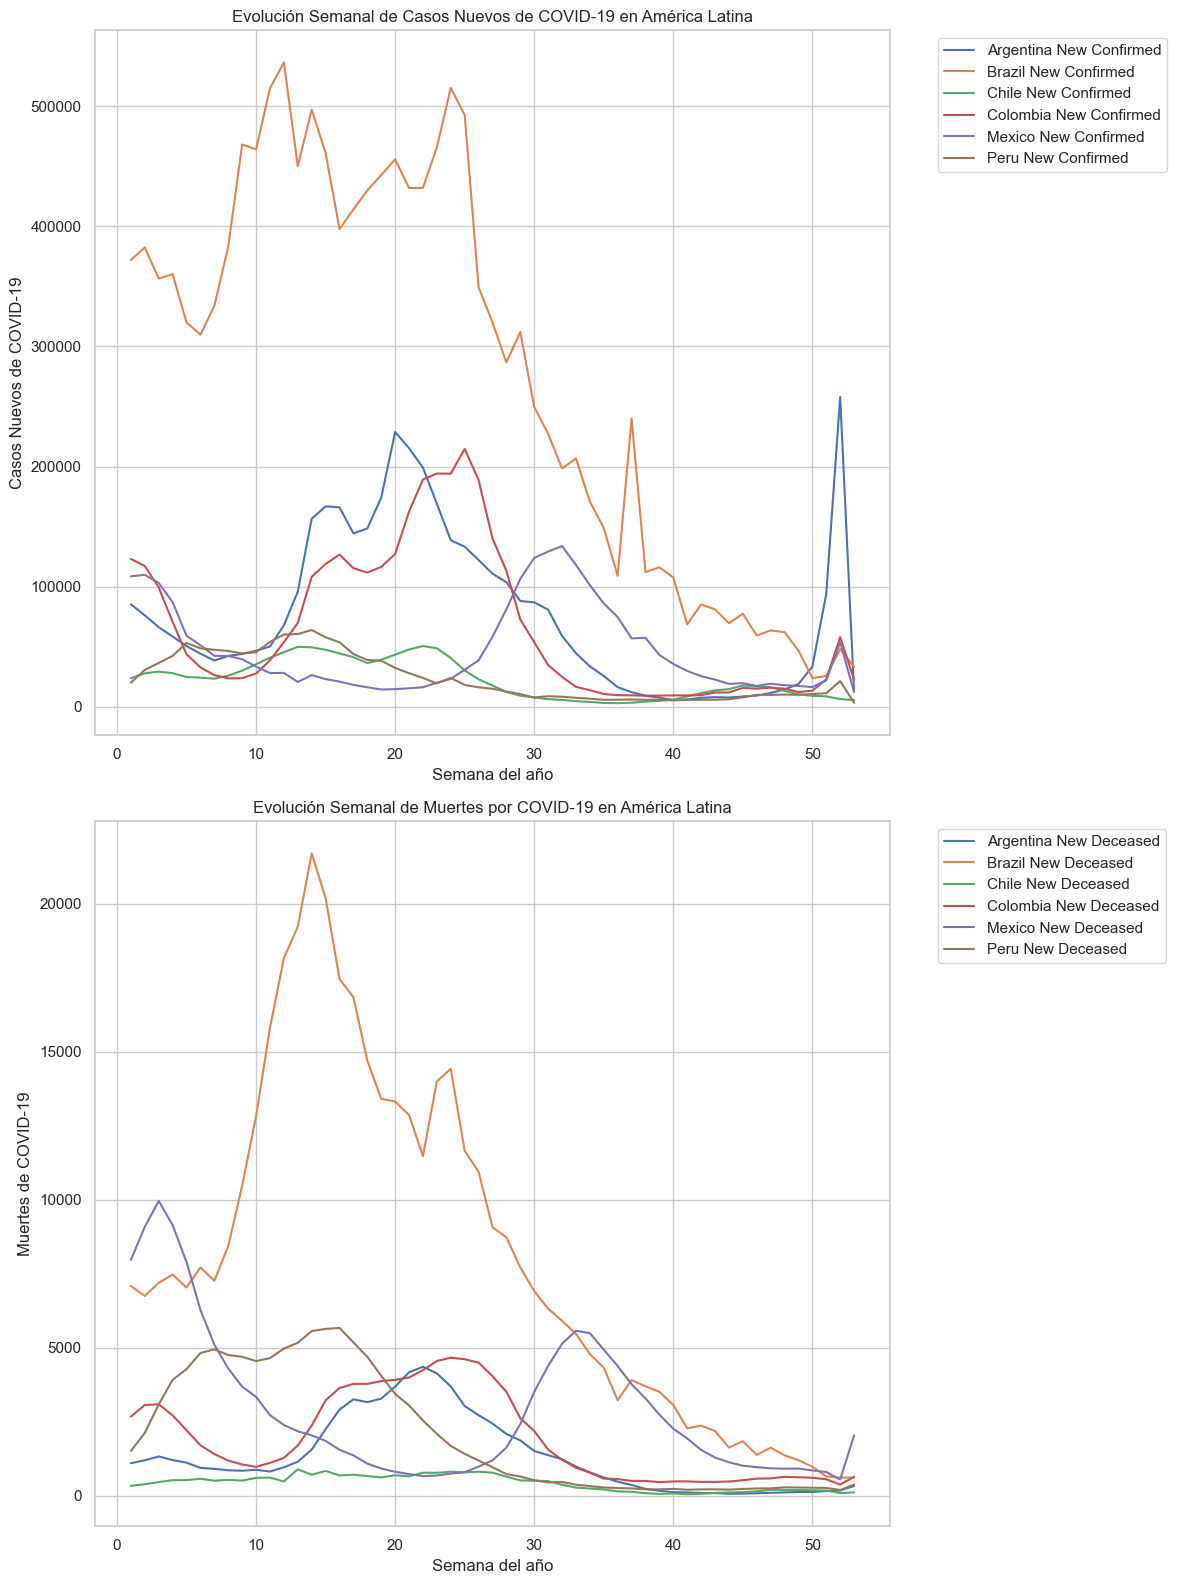

In [154]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12,16))
for country in weekly_cases['country_name'].unique():
    country_weekly_cases = weekly_cases[weekly_cases['country_name'] == country]
    ax[0].plot(country_weekly_cases['week'], country_weekly_cases['new_confirmed'], label=f'{country} New Confirmed')
    ax[1].plot(country_weekly_cases['week'], country_weekly_cases['new_deceased'], label=f'{country} New Deceased')

ax[0].set_xlabel('Semana del año')
ax[0].set_ylabel("Casos Nuevos de COVID-19")
ax[0].set_title('Evolución Semanal de Casos Nuevos de COVID-19 en América Latina')
ax[0].legend(bbox_to_anchor=(1.05,1), loc='upper left')

ax[1].set_xlabel('Semana del año')
ax[1].set_ylabel("Muertes de COVID-19")
ax[1].set_title('Evolución Semanal de Muertes por COVID-19 en América Latina')
ax[1].legend(bbox_to_anchor=(1.05,1), loc='upper left')

plt.tight_layout()
plt.show()


De la anterior gráfica se puede observar que la cantidad de casos confirmados y muertes ha ido disminuyendo a lo largo del tiempo, sin embargo esto no quiere decir que la pandemia haya terminado, ya que la cantidad de casos confirmados y muertes sigue siendo alta, ademas se nota un pico en la fechas finales.

Ahora realizaré lo mismo que hice con week solo que con month.

In [155]:
df['month'] = df.index.month
df

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina    7767.000000   
2021-01-03           AR           AR    Argentina    4934.000000   
2021-01-04           AR           AR    Argentina   13953.000000   
2021-01-05           AR           AR    Argentina   14085.000000   
2021-01-06           AR           AR    Argentina   14496.000000   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru    1150.000000   
2022-09-14           PE           PE         Peru   12911.385484   
2022-09-15           PE           PE         Peru   12911.385484   
2022-09-16           PE           PE         Peru   12911.385484   
2022-09-17           PE           PE         Peru   12911.385484   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02    166.000000          1.670634e+06         46688.000000   
2021-01-03    157.000000          1.675568e+06         46845.000000   
2021-01-04    157.000000          1.689521e+06         47002.000000   
2021-01-05    160.000000          1.703606e+06         47162.000000   
2021-01-06    131.000000          1.718102e+06         47293.000000   
...                  ...                   ...                  ...   
2022-09-13     22.000000          4.127612e+06        216173.000000   
2022-09-14    134.379032          6.079579e+06        105716.119355   
2022-09-15    134.379032          6.079579e+06        105716.119355   
2022-09-16    134.379032          6.079579e+06        105716.119355   
2022-09-17    134.379032          6.079579e+06        105716.119355   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2022-09-13                                    0.0  29381884.0   
2022-09-14                                    0.0  29381884.0   
2022-09-15                                    0.0  29381884.0   
2022-09-16                                    0.0  29381884.0   
2022-09-17                                    0.0  29381884.0   

            population_male  ...  area_urban_sq_km  life_expectancy  \
date                         ...                                      
2021-01-02       19523766.0  ...           55032.0           76.520   
2021-01-03       19523766.0  ...           55032.0           76.520   
2021-01-04       19523766.0  ...           55032.0           76.520   
2021-01-05       19523766.0  ...           55032.0           76.520   
2021-01-06       19523766.0  ...           55032.0           76.520   
...                     ...  ...               ...              ...   
2022-09-13       14450757.0  ...           16425.0           76.516   
2022-09-14       14450757.0  ...           16425.0           76.516   
2022-09-15       14450757.0  ...           16425.0           76.516   
2022-09-16       14450757.0  ...           16425.0           76.516   
2022-09-17       14450757.0  ...           16425.0           76.516   

            adult_male_mortality_rate  adult_female_mortality_rate  \
date                                                                 
2021-01-02                    147.086                       79.483   
2021-01-03                    147.086                       79.483   
2021-01-04                    147.086                       79.483   
2021-01-05                    147.086                       79.483   
2021-01-06  

In [156]:
df_2021 = df.loc[
    (df.index >= '2021-01-01') &
    (df.index <= '2021-12-31')
]
df_2021

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   
...                 ...          ...          ...            ...   
2021-12-27           PE           PE         Peru         3261.0   
2021-12-28           PE           PE         Peru         4270.0   
2021-12-29           PE           PE         Peru         4340.0   
2021-12-30           PE           PE         Peru         5220.0   
2021-12-31           PE           PE         Peru         4290.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   
...                  ...                   ...                  ...   
2021-12-27          29.0             2285854.0             202515.0   
2021-12-28          37.0             2290124.0             202552.0   
2021-12-29          40.0             2294464.0             202592.0   
2021-12-30          45.0             2299684.0             202637.0   
2021-12-31          37.0             2303974.0             202674.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2021-12-27                             50186253.0  29381884.0   
2021-12-28                             50515554.0  29381884.0   
2021-12-29                             50800766.0  29381884.0   
2021-12-30                             51020490.0  29381884.0   
2021-12-31                             51092425.0  29381884.0   

            population_male  ...  area_urban_sq_km  life_expectancy  \
date                         ...                                      
2021-01-02       19523766.0  ...           55032.0           76.520   
2021-01-03       19523766.0  ...           55032.0           76.520   
2021-01-04       19523766.0  ...           55032.0           76.520   
2021-01-05       19523766.0  ...           55032.0           76.520   
2021-01-06       19523766.0  ...           55032.0           76.520   
...                     ...  ...               ...              ...   
2021-12-27       14450757.0  ...           16425.0           76.516   
2021-12-28       14450757.0  ...           16425.0           76.516   
2021-12-29       14450757.0  ...           16425.0           76.516   
2021-12-30       14450757.0  ...           16425.0           76.516   
2021-12-31       14450757.0  ...           16425.0           76.516   

            adult_male_mortality_rate  adult_female_mortality_rate  \
date                                                                 
2021-01-02                    147.086                       79.483   
2021-01-03                    147.086                       79.483   
2021-01-04                    147.086                       79.483   
2021-01-05                    147.086                       79.483   
2021-01-06  

In [157]:
monthly_cases = df_2021.groupby(['country_name','month'])[['new_confirmed','new_deceased']].sum().reset_index()
monthly_cases

country_name  month  new_confirmed  new_deceased
0     Argentina      1       298925.0        5127.0
1     Argentina      2       175707.0        3803.0
2     Argentina      3       256637.0        3942.0
3     Argentina      4       659345.0        9671.0
4     Argentina      5       826716.0       15881.0
..          ...    ...            ...           ...
67         Peru      8        33606.0        1713.0
68         Peru      9        26161.0        1033.0
69         Peru     10        24873.0         930.0
70         Peru     11        37020.0         987.0
71         Peru     12        60450.0        1176.0

[72 rows x 4 columns]

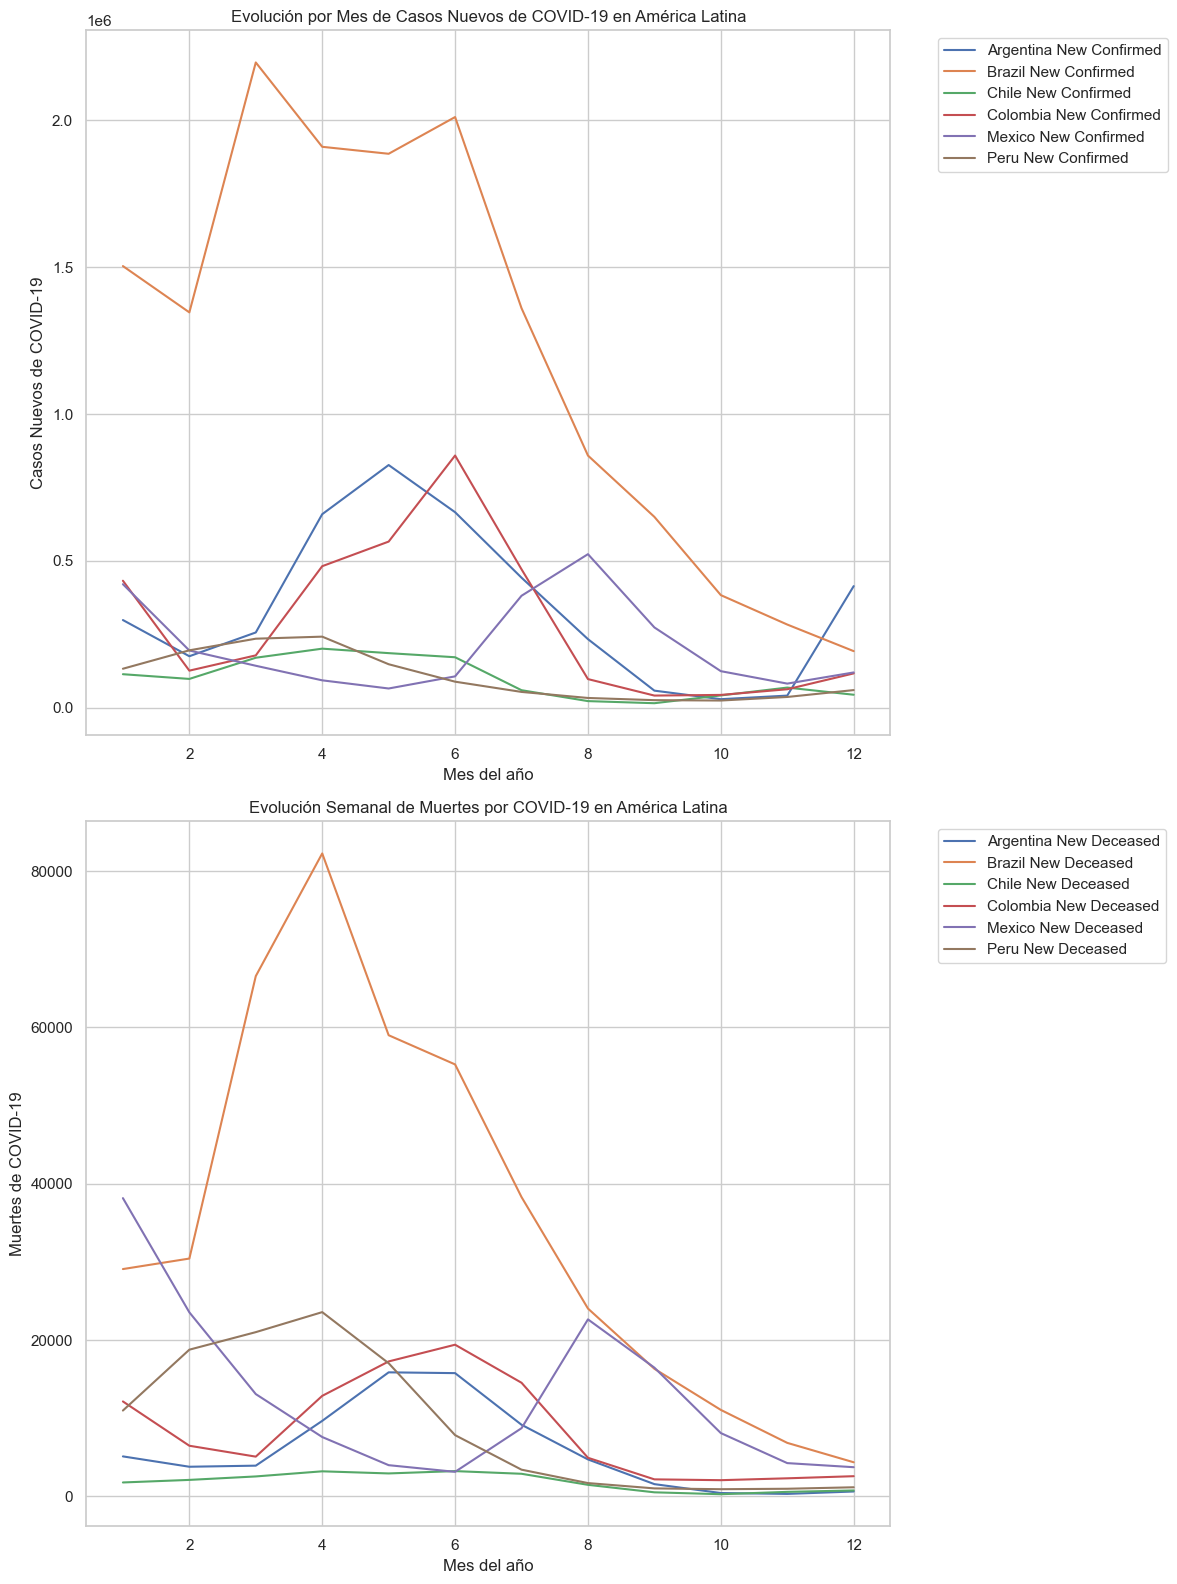

In [158]:

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12,16))
for country in monthly_cases['country_name'].unique():
    country_monthly_cases = monthly_cases[monthly_cases['country_name'] == country]
    ax[0].plot(country_monthly_cases['month'], country_monthly_cases['new_confirmed'], label=f'{country} New Confirmed')
    ax[1].plot(country_monthly_cases['month'], country_monthly_cases['new_deceased'], label=f'{country} New Deceased')

ax[0].set_xlabel('Mes del año')
ax[0].set_ylabel("Casos Nuevos de COVID-19")
ax[0].set_title('Evolución por Mes de Casos Nuevos de COVID-19 en América Latina')
ax[0].legend(bbox_to_anchor=(1.05,1), loc='upper left')

ax[1].set_xlabel('Mes del año')
ax[1].set_ylabel("Muertes de COVID-19")
ax[1].set_title('Evolución Semanal de Muertes por COVID-19 en América Latina')
ax[1].legend(bbox_to_anchor=(1.05,1), loc='upper left')

plt.tight_layout()

En el gráfico de semanas se apreciaba mejor la curvatura.

4. Genera gráficas acordes a tu análisis. Las mismas pueden ser:
    - Evolución de Casos Activos vs. Recuperados 1
    - Tasa de Crecimiento (%) 
    - Relación entre la Cobertura de Vacunación y la Reducción de Casos 1
    - ('País') Progreso de la vacunación por país 1
    - Nuevos casos y temperatura promedio 1
    - Impacto de la Urbanización en la Propagación del Covid-19
    - Evolución Semanal de Casos Nuevos 1
    - Evolución Anual de Casos Nuevos 1
    - Distribución de la Población por Edad en Países 1
    - Comparación de Estrategias de Vacunación en América Latina 1
    - Evolución del Número de Muertes Diarias. 
    - Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad 1
    - Variación Mensual de Casos y Muertes 1
    - Análisis Temporal de la Mortalidad/
    - Comparación de la Situación Actual (Contexto de los datos)


In [159]:
df.columns

Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 

### Evolución de casos activos vs casos recuperados

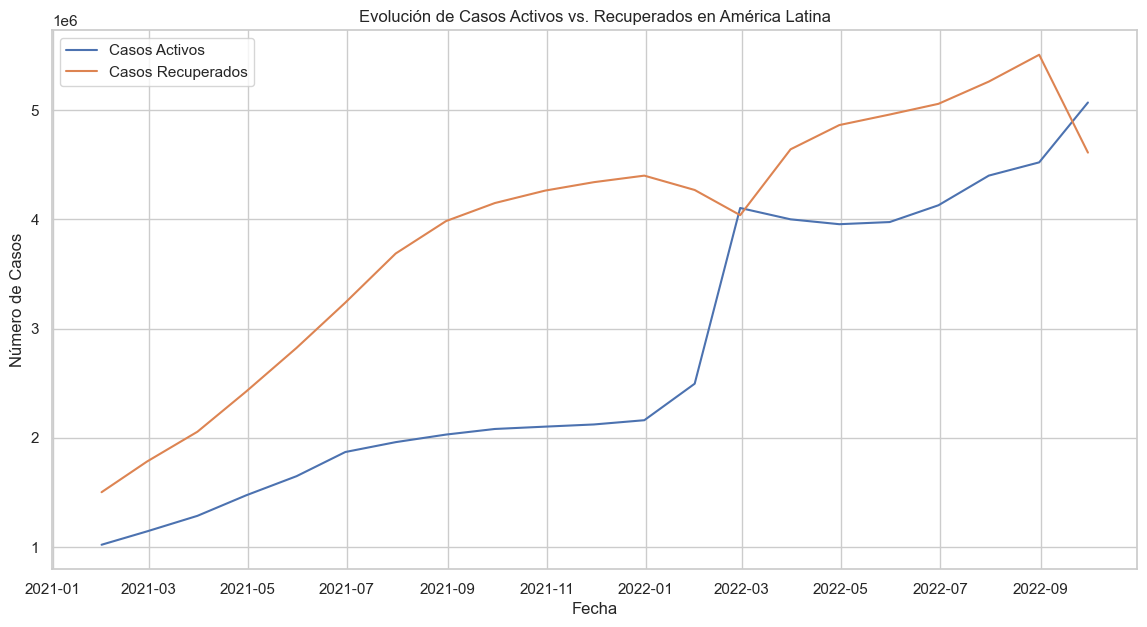

In [160]:
# Como evolucionan los casos activos y recuperados en América Latina
## Creo la columna active cases
df['active_cases'] = df['cumulative_confirmed'] - df['cumulative_deceased'] - df['cumulative_recovered']

# Grafico dos lineas sobre el mismo eje: 
plt.figure(figsize=(14, 7))
sns.lineplot(data=df.resample('ME').mean(numeric_only=True), x='date', y='active_cases', label='Casos Activos')
sns.lineplot(data=df.resample('ME').mean(numeric_only=True), x='date', y='cumulative_recovered', label='Casos Recuperados')

plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.title('Evolución de Casos Activos vs. Recuperados en América Latina')
plt.legend()
plt.show()


Se puede observar efectivamente el PEAK del que veniamos hablando.

### Tasa de Crecimiento (%)

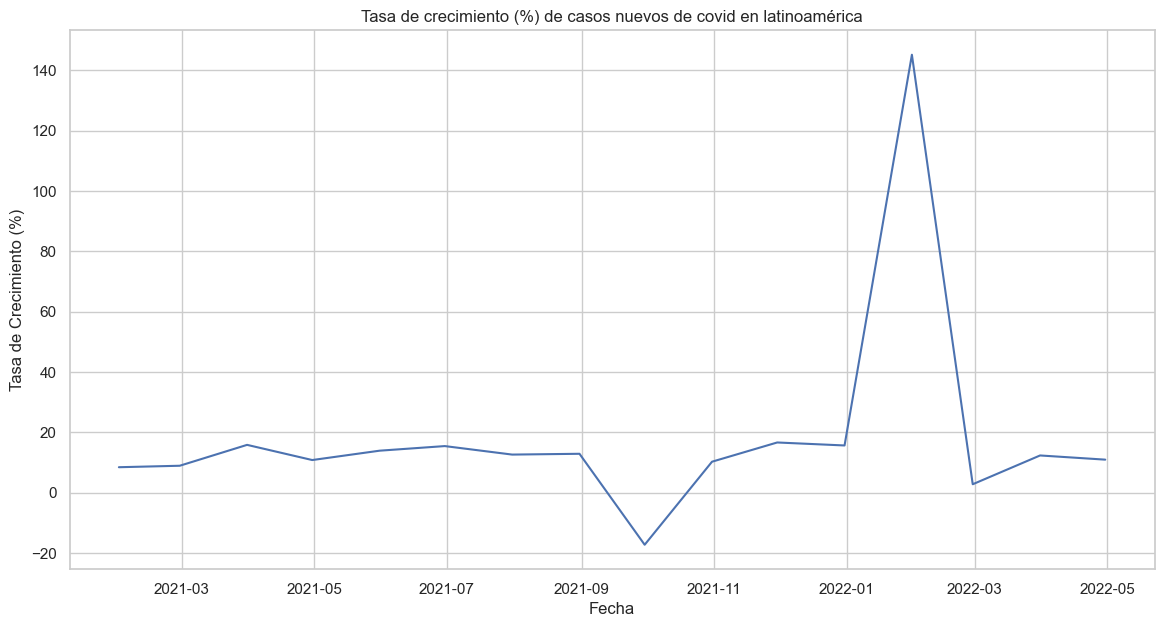

In [161]:
#Calculamos la tasa de crecimiento de casos nuevos de covid-19
df['growth_rate'] = df['new_confirmed'].pct_change() * 100
#Calculamos la tasa de crecimiento promedio mensual
monthly_growth_rate = df.resample("ME")['growth_rate'].mean()

plt.figure(figsize=(14,7))
sns.lineplot(data=monthly_growth_rate)
plt.title('Tasa de crecimiento (%) de casos nuevos de covid en latinoamérica')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Crecimiento (%)')
plt.show()


### Progreso de la vacunación por país

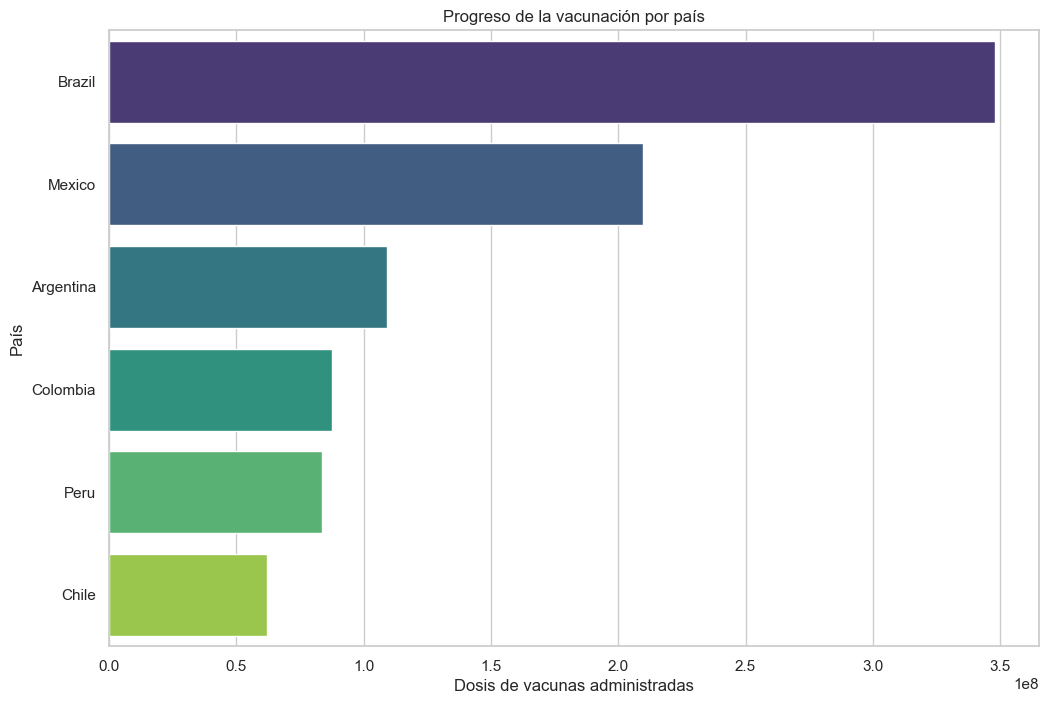

In [162]:
vaccination_data = df.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x=vaccination_data.values, y=vaccination_data.index, hue=vaccination_data.index, palette='viridis')
plt.xlabel('Dosis de vacunas administradas')
plt.ylabel('País')
plt.title('Progreso de la vacunación por país')

plt.show()

El pais con mayor impacto en la propagación fue chile, aunque es extraño ya que chile fue uno de los paises que mejor manejó la pandemia, sin embargo esto puede ser debido a la densidad de población en chile.

### Nuevos casos confirmados de COVID-19 y temperatura promedio con el tiempo

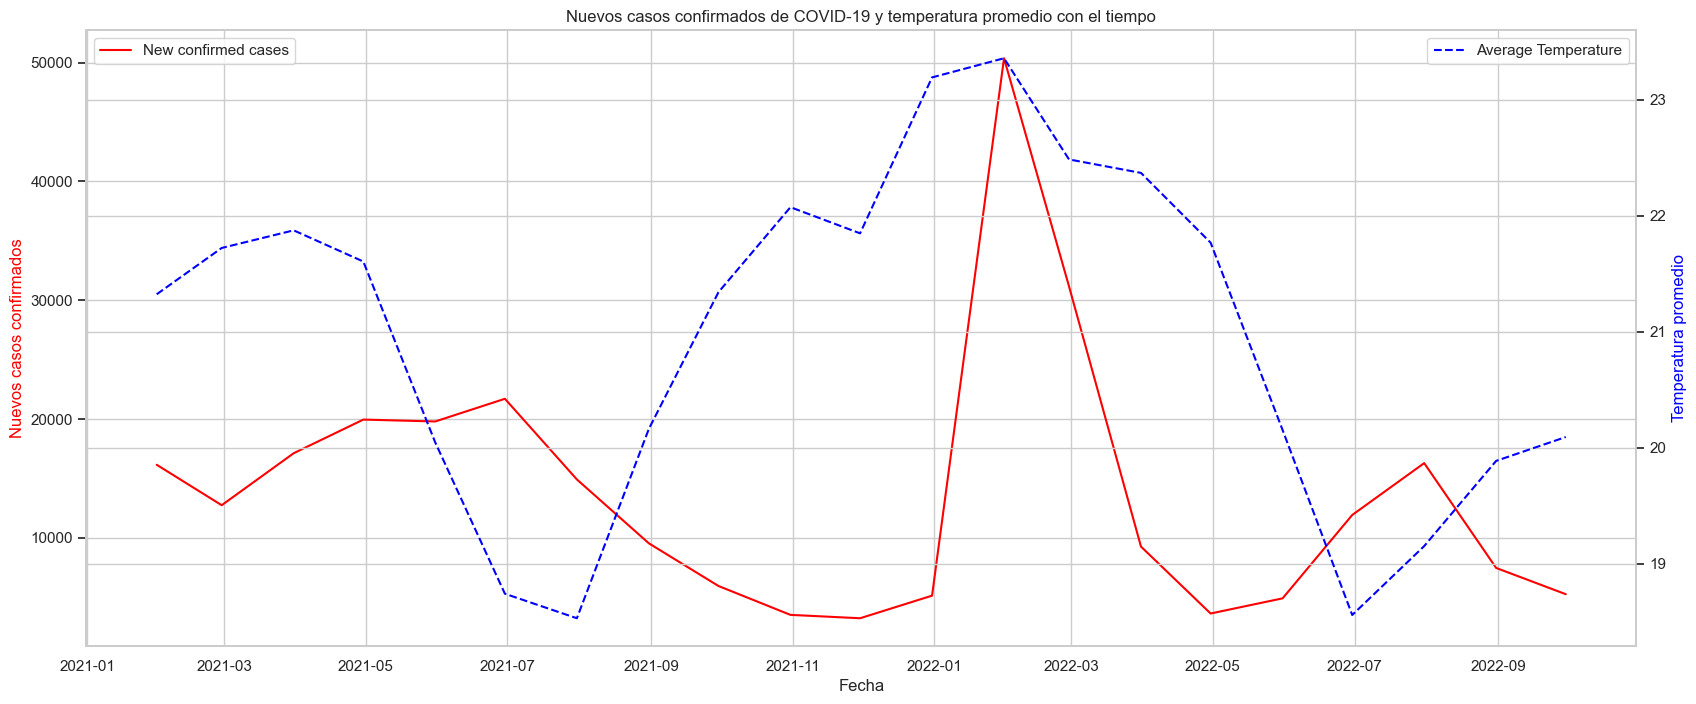

In [163]:

plt.figure(figsize=(20,8))
ax1 = plt.gca() # obtiene el eje actual de la grafica y lo asigna a ax1.
ax2 = ax1.twinx() #crea un segundo eje ax2 que comparte el mismo eje x que ax1 permitiendo graficar dos conjuntos de datos con diferentes escalas y unidades
ax1.plot(df.resample('ME').mean(numeric_only=True).index, df.resample('ME').mean(numeric_only=True)['new_confirmed'], color='red', label='New confirmed cases')
ax2.plot(df.resample('ME').mean(numeric_only=True).index, df.resample('ME').mean(numeric_only=True)['average_temperature_celsius'], color='blue', label='Average Temperature', linestyle='--')

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Nuevos casos confirmados', color='red')
ax2.set_ylabel('Temperatura promedio', color='blue')
plt.title('Nuevos casos confirmados de COVID-19 y temperatura promedio con el tiempo')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

Se observa que la temperatura promedio no tuvo una alta correlacion con los casos confirmados de covid, si se puede ubicar que los dos pican en la misma fecha, pero su comportamiento anterior no lo respalda.

### Relación entre la Cobertura de Vacunación y la Reducción de Casos

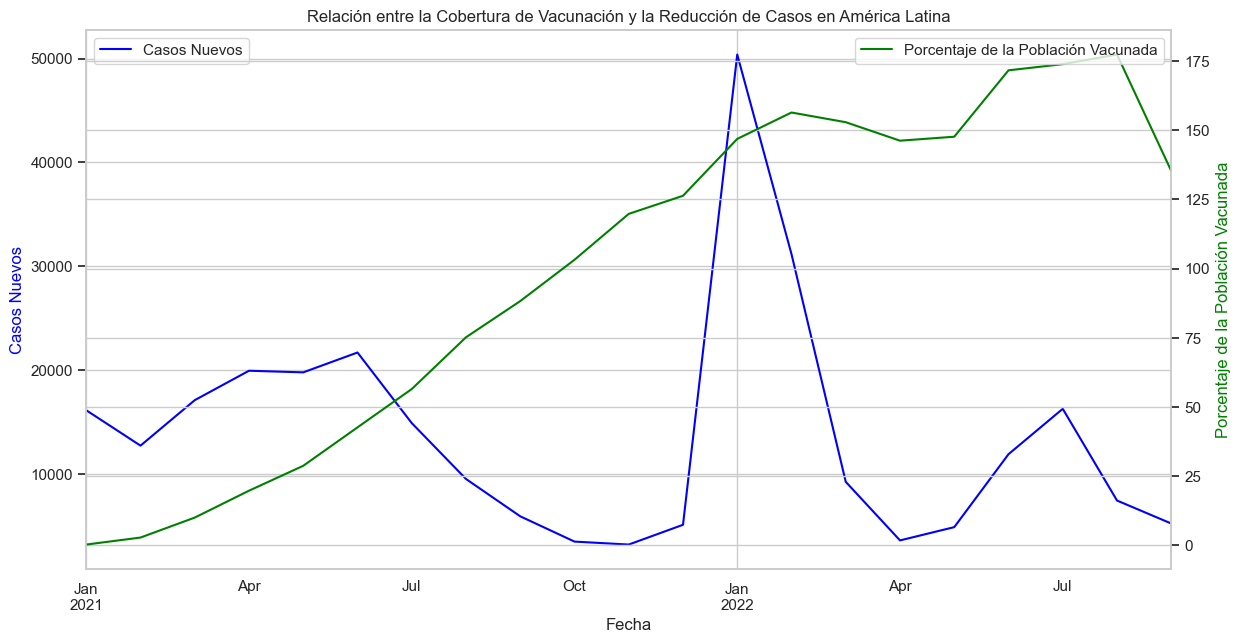

In [164]:
# Como evoluciona la vacunación en América Latina y la reducción de casos de COVID-19
plt.figure(figsize=(14, 7))
ax1 = plt.gca()
ax2 = ax1.twinx()

#crea percentajes de vacunacion
df['percentage_vaccinated'] = df['cumulative_vaccine_doses_administered'] / df['population'] * 100

# Gráfico mis dos lineplots
df.resample('ME').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='blue', label='Casos Nuevos')
df.resample('ME').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='green', label='Porcentaje de la Población Vacunada')


ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos Nuevos', color='blue')
ax2.set_ylabel('Porcentaje de la Población Vacunada', color='green')
ax1.set_title('Relación entre la Cobertura de Vacunación y la Reducción de Casos en América Latina')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

Aquí podemos observar una alta correlación debido a la vacunación. Al llegar al peak los casos bajaron

### Progreso de la vacunación por país

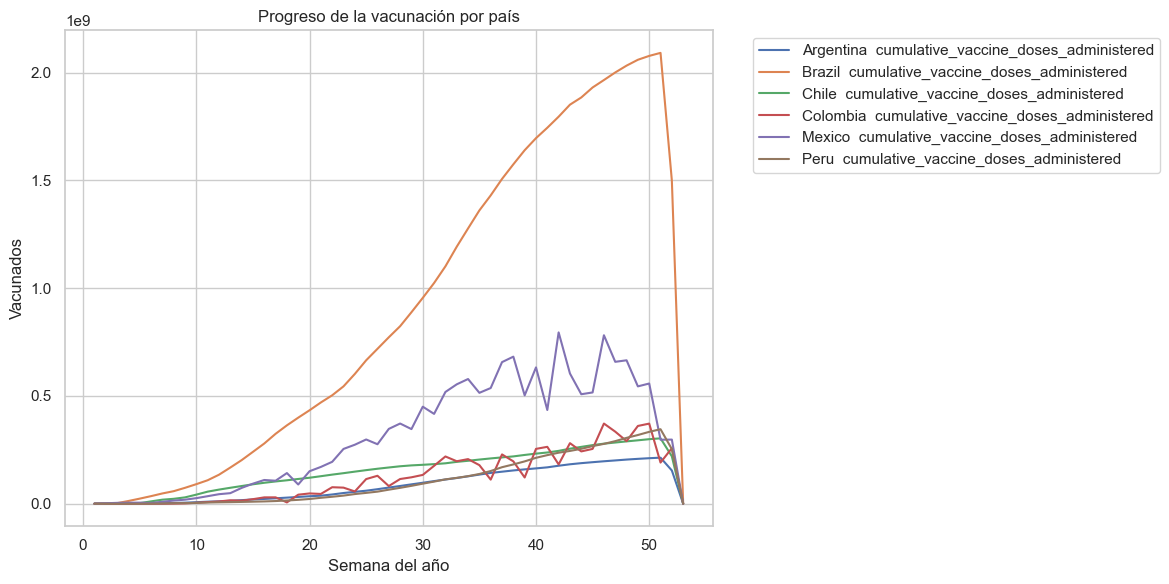

In [165]:
plt.subplots(figsize=(12,6))
for country in weekly_cases['country_name'].unique():
    country_weekly_cases = weekly_cases[weekly_cases['country_name'] == country]
    plt.plot(country_weekly_cases['week'], country_weekly_cases['cumulative_vaccine_doses_administered'], label=f'{country}  cumulative_vaccine_doses_administered')

plt.xlabel('Semana del año')
plt.ylabel("Vacunados")
plt.title('Progreso de la vacunación por país')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')


plt.tight_layout()
plt.show()

### Impacto de la Urbanización en la Propagación del Covid-19: Urbanización en Latinoamerica

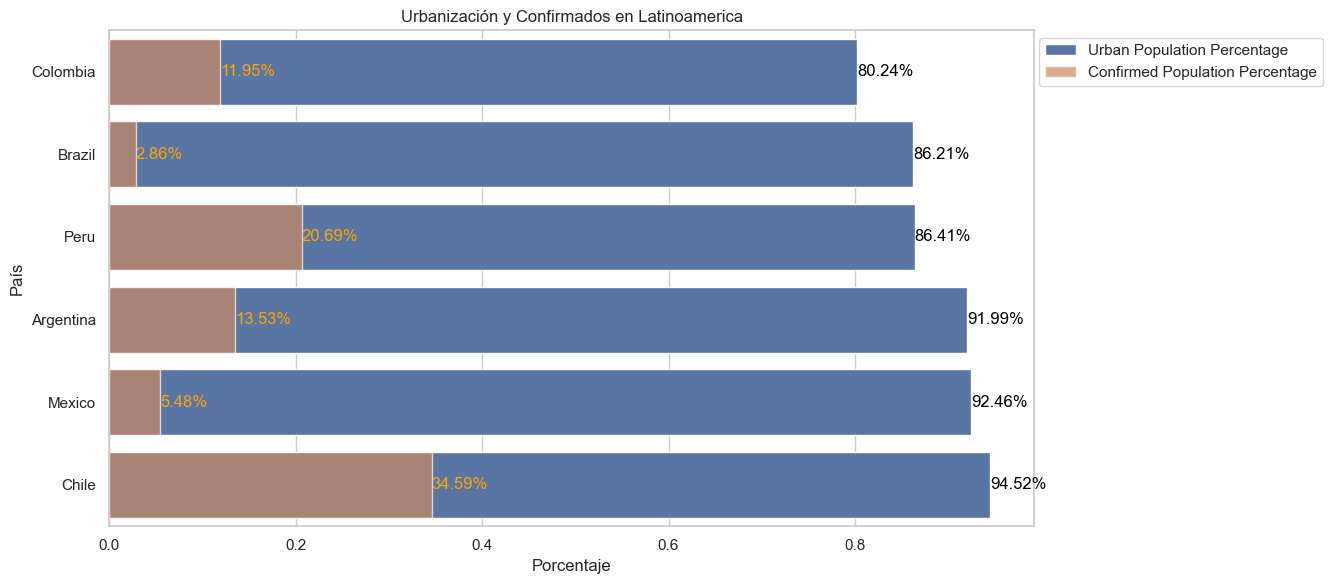

In [166]:
# - Impacto de la Urbanización en la Propagación del Covid-19: Urbanización en Latinoamerica
df['urban_population_percentage'] = df['population_urban'] / df['population']
df['confirmed_population_percentage'] = df['cumulative_confirmed'] / df['population']
urban_cases = df.groupby('country_name').last().sort_values(by='urban_population_percentage')

plt.figure(figsize=(14, 6))
ax = sns.barplot(x='urban_population_percentage', y=urban_cases.index, data=urban_cases, label='Urban Population Percentage')

# Añadir etiquetas a cada barra para urban_population_percentage
for index, value in enumerate(urban_cases['urban_population_percentage']):
    ax.text(value, index, f'{value*100:.2f}%', color='black', ha="left", va="center")

# Superponer la segunda barra para confirmed_population_percentage
ax2 = sns.barplot(x='confirmed_population_percentage', y=urban_cases.index, data=urban_cases, alpha=0.7, label='Confirmed Population Percentage')

# Añadir etiquetas a cada barra para confirmed_population_percentage
for index, value in enumerate(urban_cases['confirmed_population_percentage']):
    ax2.text(value, index, f'{value*100:.2f}%', color='orange', ha="left", va="center")

plt.xlabel('Porcentaje')
plt.ylabel('País')
plt.title('Urbanización y Confirmados en Latinoamerica')
plt.legend(bbox_to_anchor=(1.32, 1), loc="upper right")
plt.tight_layout()
plt.show()


### Distribución de la Población por Edad en Países

In [167]:
df['deceased_percentage'] = df['cumulative_deceased'] / df['population']
df['deceased_percentage']

date
2021-01-02    0.001039
2021-01-03    0.001042
2021-01-04    0.001046
2021-01-05    0.001049
2021-01-06    0.001052
                ...   
2022-09-13    0.007357
2022-09-14    0.003598
2022-09-15    0.003598
2022-09-16    0.003598
2022-09-17    0.003598
Name: deceased_percentage, Length: 3744, dtype: float64

In [168]:
high_mortality_countries = df.groupby('country_name')['deceased_percentage'].max().sort_values(ascending=False).head(6).index
high_mortality_countries

Index(['Peru', 'Chile', 'Brazil', 'Colombia', 'Argentina', 'Mexico'], dtype='object', name='country_name')

In [169]:
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
df[age_groups]

population_age_00_09  population_age_10_19  population_age_20_29  \
date                                                                           
2021-01-02             6718871.0             7045513.0             6430658.0   
2021-01-03             6718871.0             7045513.0             6430658.0   
2021-01-04             6718871.0             7045513.0             6430658.0   
2021-01-05             6718871.0             7045513.0             6430658.0   
2021-01-06             6718871.0             7045513.0             6430658.0   
...                          ...                   ...                   ...   
2022-09-13             5140624.0             5035905.0             4895056.0   
2022-09-14             5140624.0             5035905.0             4895056.0   
2022-09-15             5140624.0             5035905.0             4895056.0   
2022-09-16             5140624.0             5035905.0             4895056.0   
2022-09-17             5140624.0             5035905.0             4895056.0   

            population_age_30_39  population_age_40_49  population_age_50_59  \
date                                                                           
2021-01-02             5777148.0             4507125.0             3911943.0   
2021-01-03             5777148.0             4507125.0             3911943.0   
2021-01-04             5777148.0             4507125.0             3911943.0   
2021-01-05             5777148.0             4507125.0             3911943.0   
2021-01-06             5777148.0             4507125.0             3911943.0   
...                          ...                   ...                   ...   
2022-09-13             4379777.0             3660378.0             2772568.0   
2022-09-14             4379777.0             3660378.0             2772568.0   
2022-09-15             4379777.0             3660378.0             2772568.0   
2022-09-16             4379777.0             3660378.0             2772568.0   
2022-09-17             4379777.0             3660378.0             2772568.0   

            population_age_60_69  population_age_70_79  \
date                                                     
2021-01-02             2914251.0             1817557.0   
2021-01-03             2914251.0             1817557.0   
2021-01-04             2914251.0             1817557.0   
2021-01-05             2914251.0             1817557.0   
2021-01-06             2914251.0             1817557.0   
...                          ...                   ...   
2022-09-13             1846407.0             1078066.0   
2022-09-14             1846407.0             1078066.0   
2022-09-15             1846407.0             1078066.0   
2022-09-16             1846407.0             1078066.0   
2022-09-17             1846407.0             1078066.0   

            population_age_80_and_older  
date                                     
2021-01-02                     994030.0  
2021-01-03                     994030.0  
2021-01-04                     994030.0  
2021-01-05                     994030.0  
2021-01-06                     994030.0  
...                                 ...  
2022-09-13                     573103.0  
2022-09-14                     573103.0  
2022-09-15                     573103.0  
2022-09-16                     573103.0  
2022-09-17                     573103.0  

[3744 rows x 9 columns]

In [170]:
age_distribution = df[df['country_name'].isin(high_mortality_countries)].groupby('country_name')[age_groups].mean()
age_distribution

population_age_00_09  population_age_10_19  \
country_name                                               
Argentina                6718871.0             7045513.0   
Brazil                  29076910.0            31160446.0   
Chile                    2428079.0             2493879.0   
Colombia                 7414155.0             8119876.0   
Mexico                  21575859.0            21966049.0   
Peru                     5140624.0             5035905.0   

              population_age_20_29  population_age_30_39  \
country_name                                               
Argentina                6430658.0             5777148.0   
Brazil                  34104643.0            34476762.0   
Chile                    2995538.0             2945404.0   
Colombia                 8847061.0             7810299.0   
Mexico                  18680448.0            16763785.0   
Peru                     4895056.0             4379777.0   

              population_age_40_49  population_age_50_59  \
country_name                                               
Argentina                4507125.0             3911943.0   
Brazil                  29462006.0            24421202.0   
Chile                    2578404.0             2352271.0   
Colombia                 6450787.0             5543980.0   
Mexico                  12937956.0             8959656.0   
Peru                     3660378.0             2772568.0   

              population_age_60_69  population_age_70_79  \
country_name                                               
Argentina                2914251.0             1817557.0   
Brazil                  16896862.0             8801551.0   
Chile                    1791787.0              993126.0   
Colombia                 3771358.0             1979761.0   
Mexico                   5433731.0             3119417.0   
Peru                     1846407.0             1078066.0   

              population_age_80_and_older  
country_name                               
Argentina                        994030.0  
Brazil                          4159027.0  
Chile                            537721.0  
Colombia                         945607.0  
Mexico                          1502231.0  
Peru                             573103.0

In [171]:
age_distribution_arg = age_distribution[age_distribution.index == 'Argentina']
age_distribution_arg

population_age_00_09  population_age_10_19  \
country_name                                               
Argentina                6718871.0             7045513.0   

              population_age_20_29  population_age_30_39  \
country_name                                               
Argentina                6430658.0             5777148.0   

              population_age_40_49  population_age_50_59  \
country_name                                               
Argentina                4507125.0             3911943.0   

              population_age_60_69  population_age_70_79  \
country_name                                               
Argentina                2914251.0             1817557.0   

              population_age_80_and_older  
country_name                               
Argentina                        994030.0

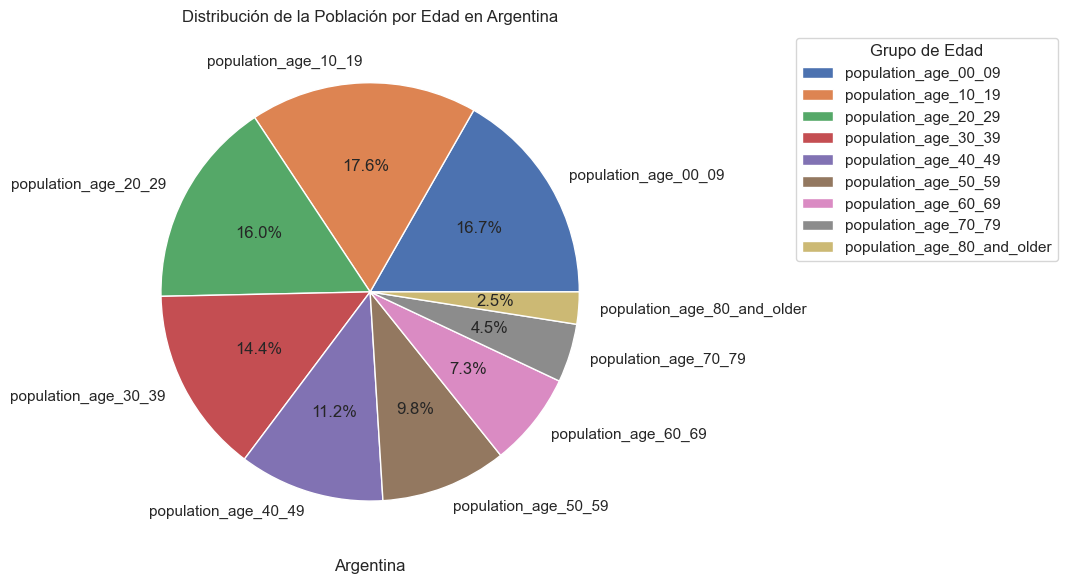

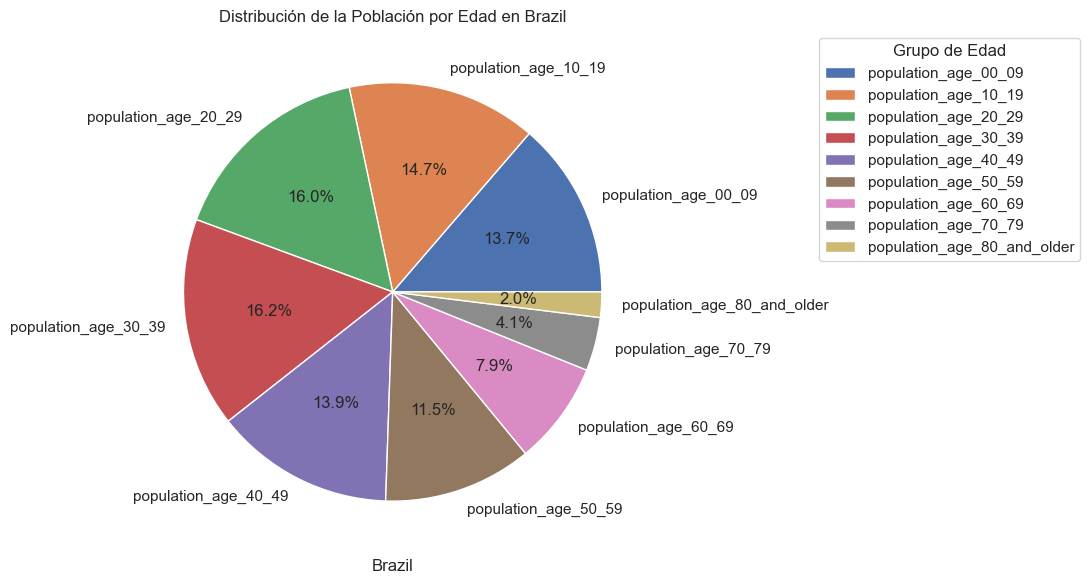

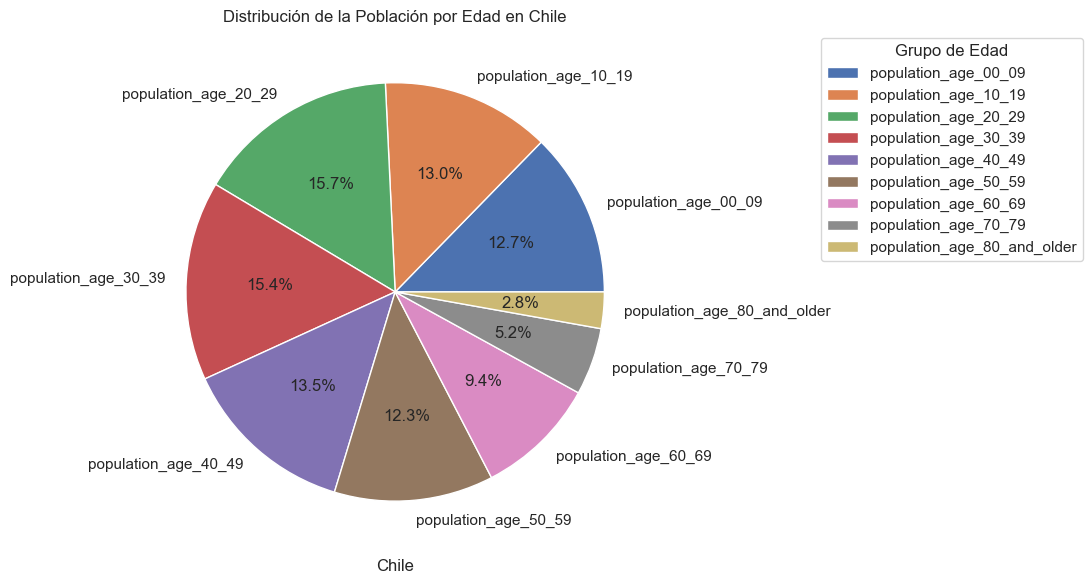

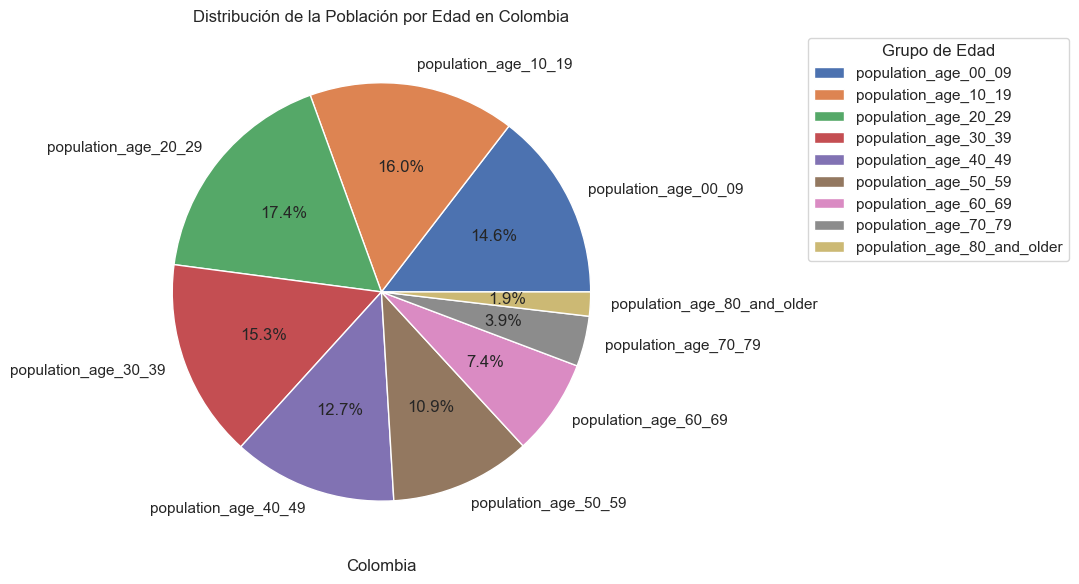

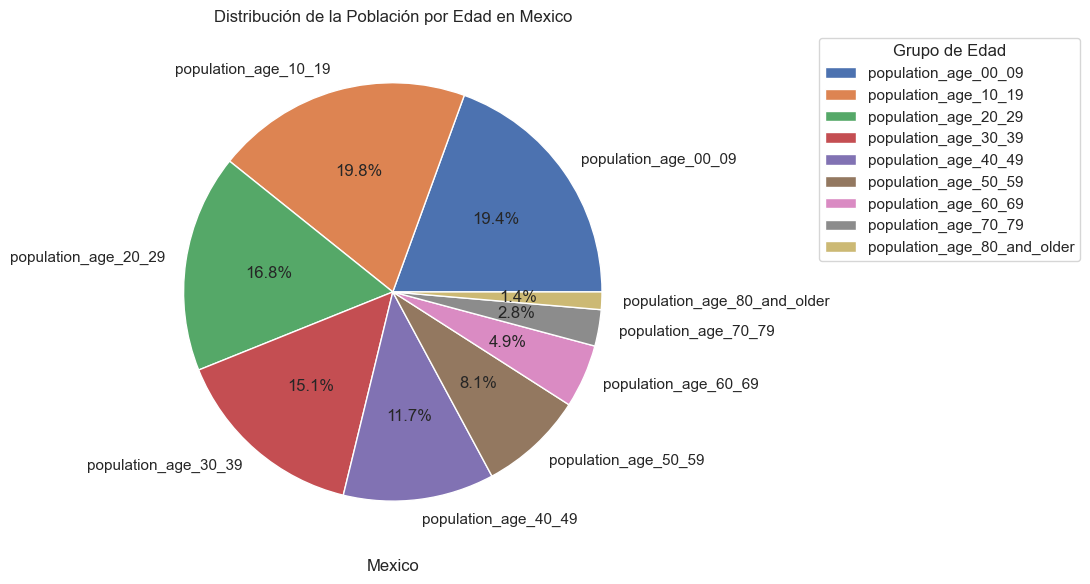

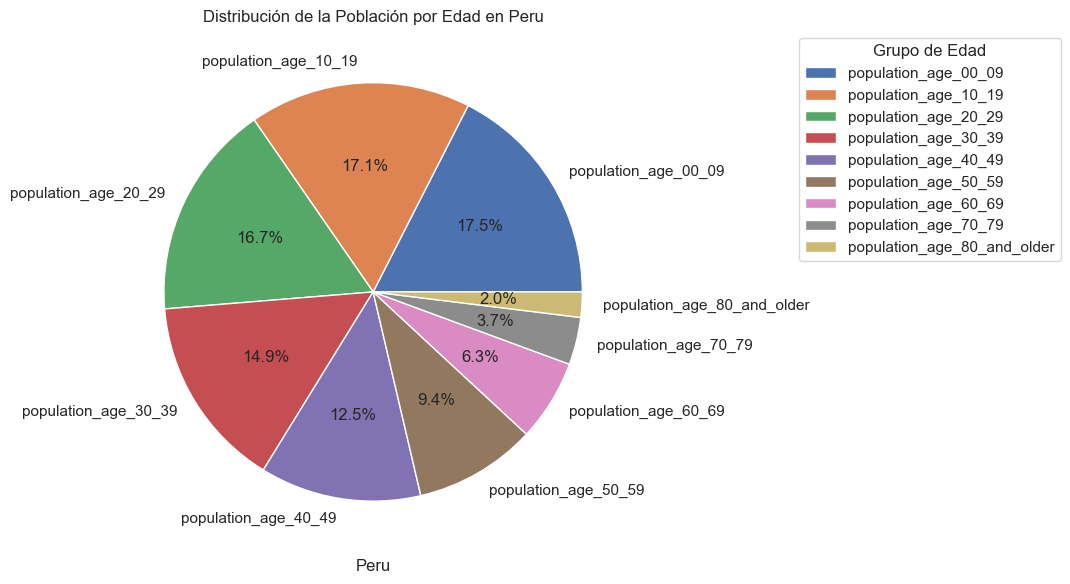

In [172]:
# Densidad de población por grupos de edad
high_mortality_countries = df.groupby('country_name')['deceased_percentage'].max().sort_values(ascending=False).head(6).index
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = df[df['country_name'].isin(high_mortality_countries)].groupby('country_name')[age_groups].mean()
paises = age_distribution.index.unique()

for pais in paises:
    plt.figure(figsize=(12,6))
    plt.pie(
        age_distribution.loc[pais].values,
        labels=age_distribution.loc[pais].index,
        autopct='%1.1f%%'
    )

    # age_distribution.plot(kind='pie', stacked=True, figsize=(12, 8))
    plt.xlabel(f'{pais}')
    plt.title(f'Distribución de la Población por Edad en {pais}')
    plt.legend(bbox_to_anchor=(1.3, 1), loc='upper left', title='Grupo de Edad')
    plt.tight_layout()
    plt.show()

El gráfico revela de manera clara las diferencias en la distribución de la población por grupos de edad en los países seleccionados, aunque no ofrece insights particularmente novedosos. Sin embargo, esta información es valiosa y puede ser útil para futuros análisis.

Además, nos permite empezar a evaluar la eficacia de las estrategias de vacunación implementadas, observando cómo han impactado en la reducción de la mortalidad y en el número de casos confirmados.

### Comparación de Estrategias de Vacunación en América Latina.

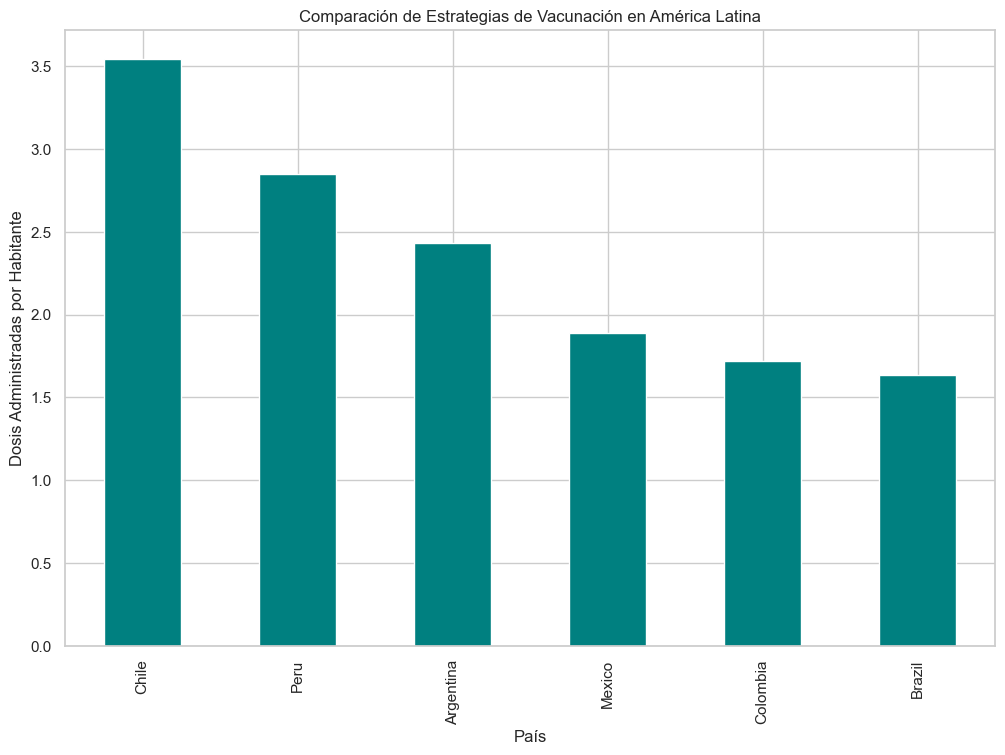

In [173]:
vaccination_strategy = df.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / df.groupby('country_name')['population'].mean()
vaccination_strategy.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8), color='teal', grid=True)

plt.xlabel('País')
plt.ylabel('Dosis Administradas por Habitante')
plt.title('Comparación de Estrategias de Vacunación en América Latina')
plt.show()

Nuevamente vemos el buen resultado de las politicas de chile y un clara falla en Colombia y Brasil.

Con esto vamos definiendo los paises que necesitan más ayuda y donde se deberían crear los nuevos centros.

Aqui es donde se ve claramente la diferencia de como manejo cada uno la pandemia, debido a que se tiene en cuenta la población. Brasil no administro muchas dosis por habitante, esto se puede deber a una falta de interés de la gente, como también a un bajo presupuesto para vacunas. Esto lo verificaremos con otro gráfico.

C:\Users\geram\AppData\Local\Temp\ipykernel_5608\4183487937.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['gdp_usd'], y=df['country_name'], palette='viridis')


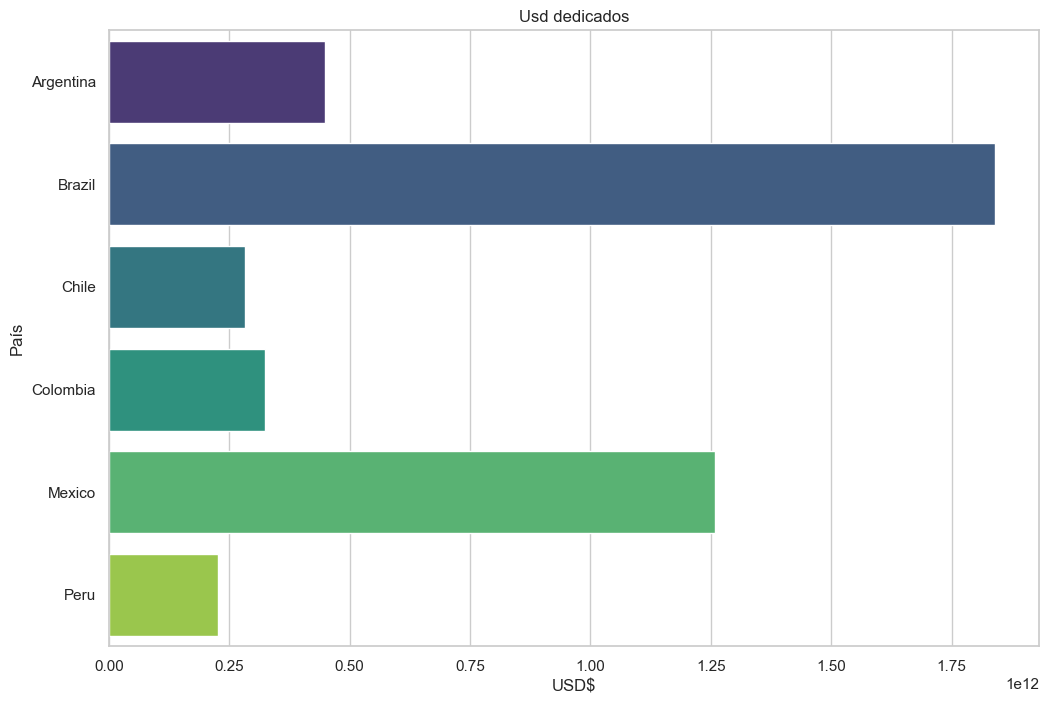

In [174]:

plt.figure(figsize=(12,8))
sns.barplot(x=df['gdp_usd'], y=df['country_name'], palette='viridis')
plt.xlabel('USD$')
plt.ylabel('País')
plt.title('Usd dedicados')

plt.show()

Sabiendo que no fue el caso monetario, debido a la gráfica que se mostro, podemos concluir que en Brasil hace falta mas movilidad con respecto a las vacunas. Otro caso podria ser Colombia, pero como vemos, no se destina una cantidad de dinero acorde para su población, como si pasa en Mexico.
Dos potenciales lugares para abrir laboratorios pueden ser Mexico y Brasil.

### Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad

In [175]:
df['mortality_rate'] = (df['cumulative_deceased'] / df['cumulative_confirmed']) * 100

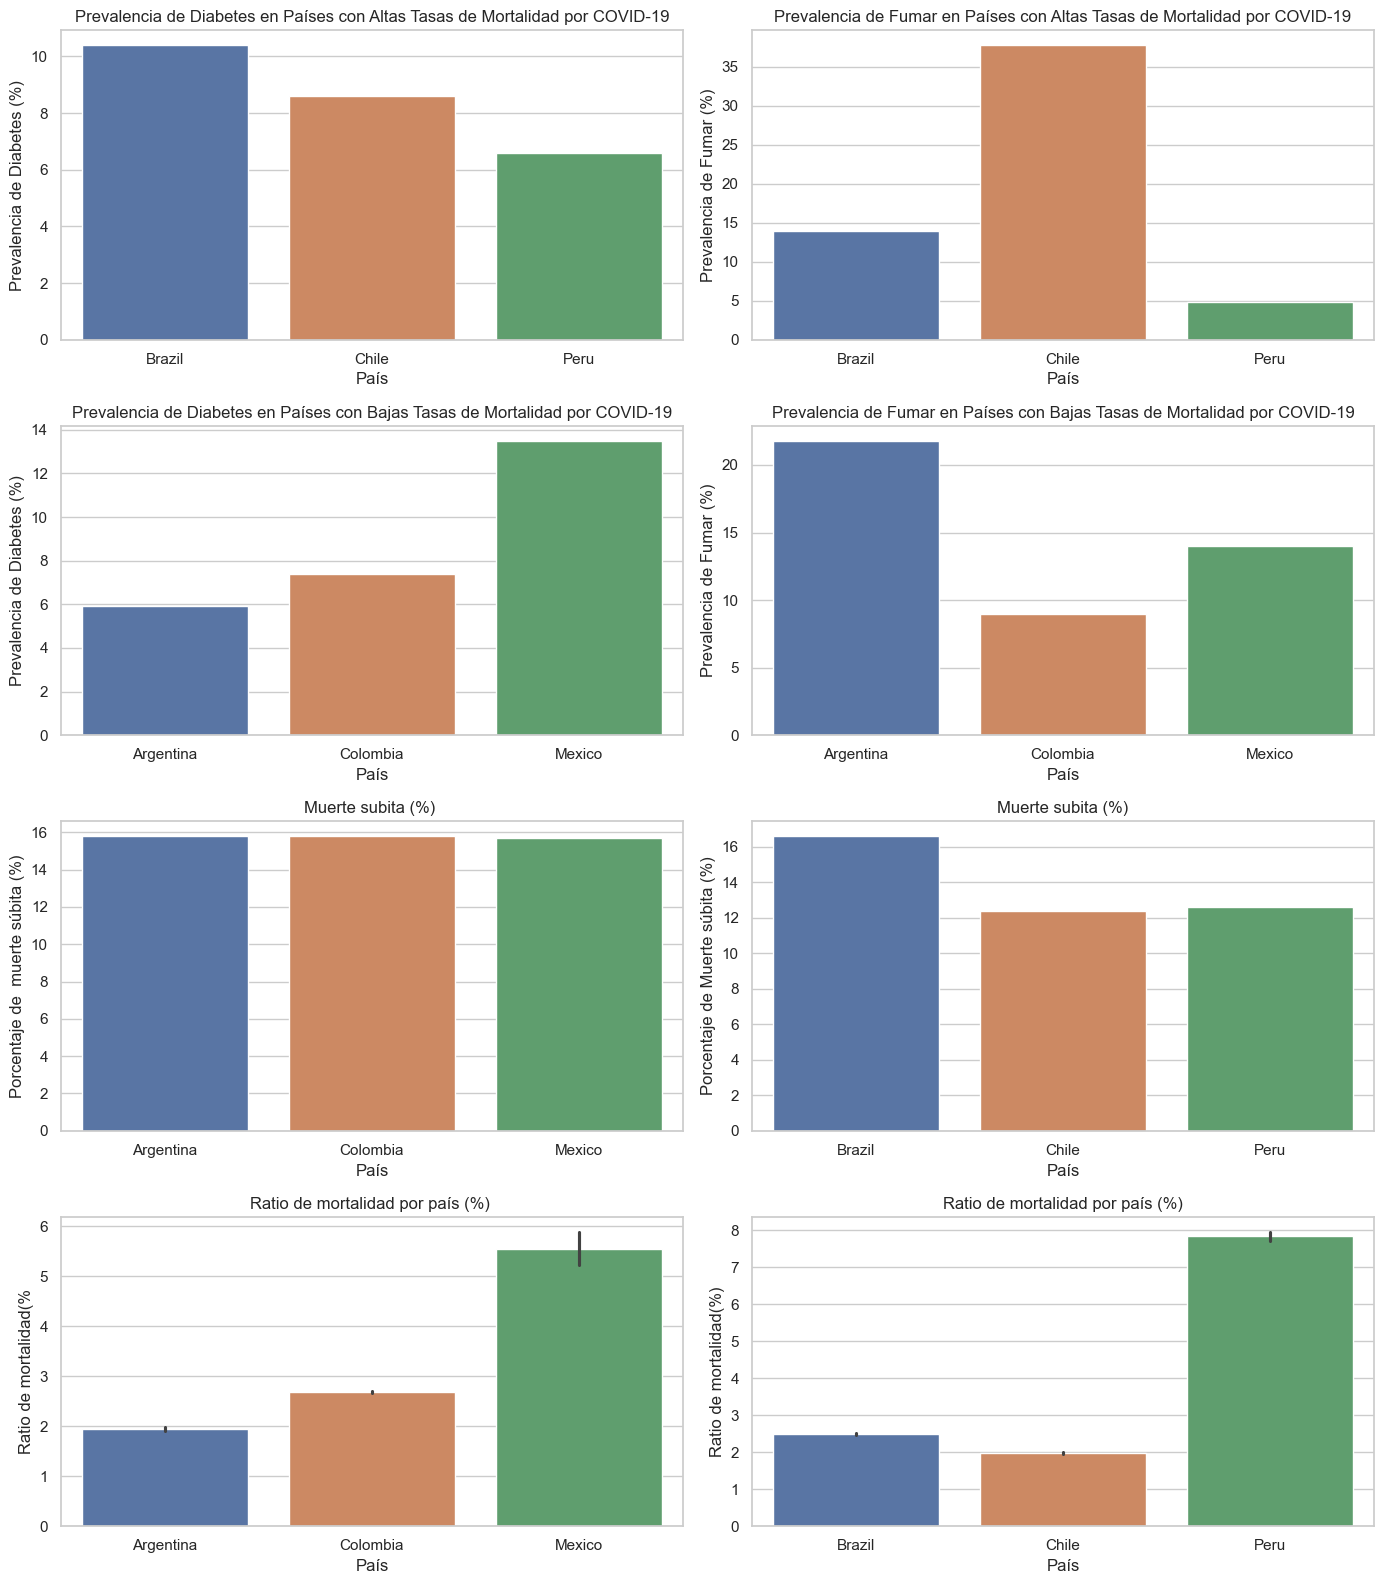

In [176]:
# Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad.

top_countries = df.groupby('country_name')['deceased_percentage'].max().nlargest(3).index # 5 paises con mayor cantidad de muertes
bottom_countries = df.groupby('country_name')['deceased_percentage'].max().nsmallest(3).index # 5 paises con menor cantidad de muertes

conditions_top_data = df[df['country_name'].isin(top_countries)]
conditions_bottom_data = df[df['country_name'].isin(bottom_countries)]

fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(
    ncols=2,
    nrows=4,
    figsize=(14, 16)
)

# Prevalencia de diabetes en top
sns.barplot(data=conditions_top_data, x='country_name', y='diabetes_prevalence', hue='country_name', ax=ax1)
ax1.set_xlabel('País')
ax1.set_ylabel('Prevalencia de Diabetes (%)')
ax1.set_title('Prevalencia de Diabetes en Países con Altas Tasas de Mortalidad por COVID-19')

# Prevalencia de fumar en top
sns.barplot(data=conditions_top_data, x='country_name', y='smoking_prevalence', hue='country_name', ax=ax2)
ax2.set_xlabel('País')
ax2.set_ylabel('Prevalencia de Fumar (%)')
ax2.set_title('Prevalencia de Fumar en Países con Altas Tasas de Mortalidad por COVID-19')

# Prevalencia de diabetes en top
sns.barplot(data=conditions_bottom_data, x='country_name', y='diabetes_prevalence', hue='country_name', ax=ax3)
ax3.set_xlabel('País')
ax3.set_ylabel('Prevalencia de Diabetes (%)')
ax3.set_title('Prevalencia de Diabetes en Países con Bajas Tasas de Mortalidad por COVID-19')

# Prevalencia de fumar en top
sns.barplot(data=conditions_bottom_data, x='country_name', y='smoking_prevalence', hue='country_name', ax=ax4)
ax4.set_xlabel('País')
ax4.set_ylabel('Prevalencia de Fumar (%)')
ax4.set_title('Prevalencia de Fumar en Países con Bajas Tasas de Mortalidad por COVID-19')

# Porcentaje de Muerte súbita (%)
sns.barplot(data=conditions_bottom_data, x='country_name', y='comorbidity_mortality_rate', hue='country_name', ax=ax5)
ax5.set_xlabel('País')
ax5.set_ylabel('Porcentaje de  muerte súbita (%)')
ax5.set_title('Muerte subita (%) ')

# Porcentaje de Muerte súbita (%)
sns.barplot(data=conditions_top_data, x='country_name', y='comorbidity_mortality_rate', hue='country_name', ax=ax6)
ax6.set_xlabel('País')
ax6.set_ylabel('Porcentaje de Muerte súbita (%)')
ax6.set_title('Muerte subita (%)')
plt.tight_layout()

# Porcentaje de Muerte súbita (%)
sns.barplot(data=conditions_bottom_data, x='country_name', y='mortality_rate', hue='country_name', ax=ax7)
ax7.set_xlabel('País')
ax7.set_ylabel('Ratio de mortalidad(%')
ax7.set_title('Ratio de mortalidad por país (%) ')

# Porcentaje de Muerte súbita (%)
sns.barplot(data=conditions_top_data, x='country_name', y='mortality_rate', hue='country_name', ax=ax8)
ax8.set_xlabel('País')
ax8.set_ylabel('Ratio de mortalidad(%)')
ax8.set_title('Ratio de mortalidad por país (%)')
plt.tight_layout()


plt.show()

Hemos identificado que la diabetes tiene un impacto significativamente mayor en México y Brasil, sugiriendo que estos países son los más afectados por esta condición. En cuanto al tabaquismo, se observa que tiene un mayor impacto en Chile y Argentina, indicando que estos países son los que más han sufrido a causa del consumo de tabaco.

Sin embargo, es importante notar que, mientras Brasil se encuentra entre los países con la mayor tasa de mortalidad, México está en el grupo con las tasas más bajas. La misma discrepancia se observa entre Chile, que tiene una tasa de mortalidad alta, y Argentina, que tiene una tasa más baja.

Esto sugiere que puede ser complicado establecer una correlación clara entre las condiciones preexistentes y la mortalidad por COVID-19.

Hablando un poco del ratio de mortalidad, el que se quedo con el mayor porcentaje fue Mexico, por una difertencia bastante grande

Esto nos define que verdaderamente Mexico necesita ayuda,ya que tiene problemas en todos los ámbitos analizados a nivel salud y poseen el dinero para costearlo

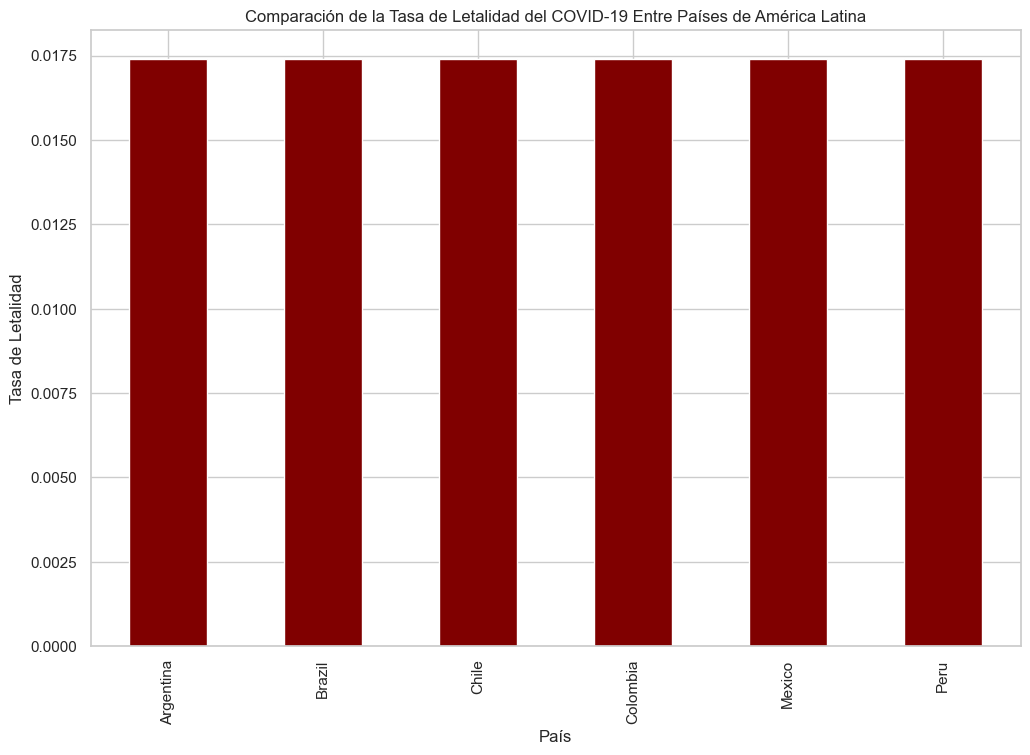

In [177]:
#  Fatalidad por pais

df['case_fatality_rate'] = df['cumulative_deceased'] / df['cumulative_confirmed']
fatality_rates = df.groupby('country_name')['case_fatality_rate'].last().sort_values()

plt.figure(figsize=(12, 8))
fatality_rates.plot(kind='bar', color='maroon')
plt.xlabel('País')
plt.ylabel('Tasa de Letalidad')
plt.title('Comparación de la Tasa de Letalidad del COVID-19 Entre Países de América Latina')
plt.show()

Todos los países han mostrado un comportamiento similar en términos de tasa de letalidad. No obstante, al analizar junto con otras gráficas, se puede observar una tendencia a la disminución de la fatalidad.

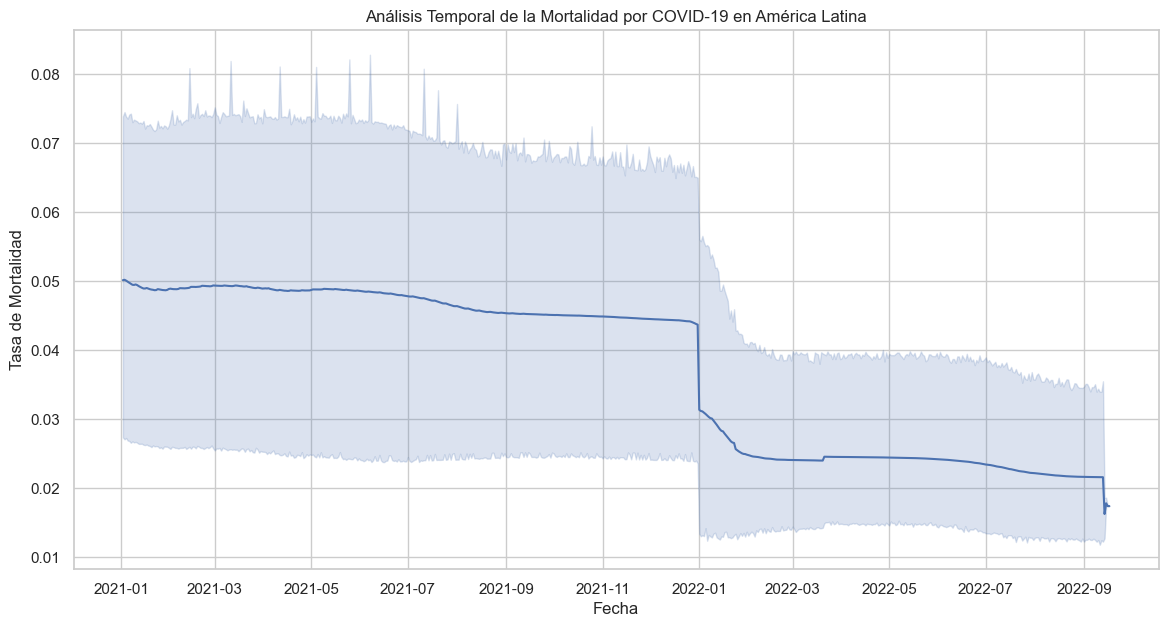

In [178]:
# cómo evolucionó la mortalidad

df['mortality_rate'] = df['cumulative_deceased'] / df['cumulative_confirmed']

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df, 
    x='date', 
    y='mortality_rate', 
    estimator='mean'
)
plt.title('Análisis Temporal de la Mortalidad por COVID-19 en América Latina')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Mortalidad')
plt.show()

La mortalidad por Covid 19 fue cayendo de manera pronunciada en la medidad en que avanzó la campaña de vacunación en America Latina. 

### Situación Actual de COVID-19 entre Países de América Latina

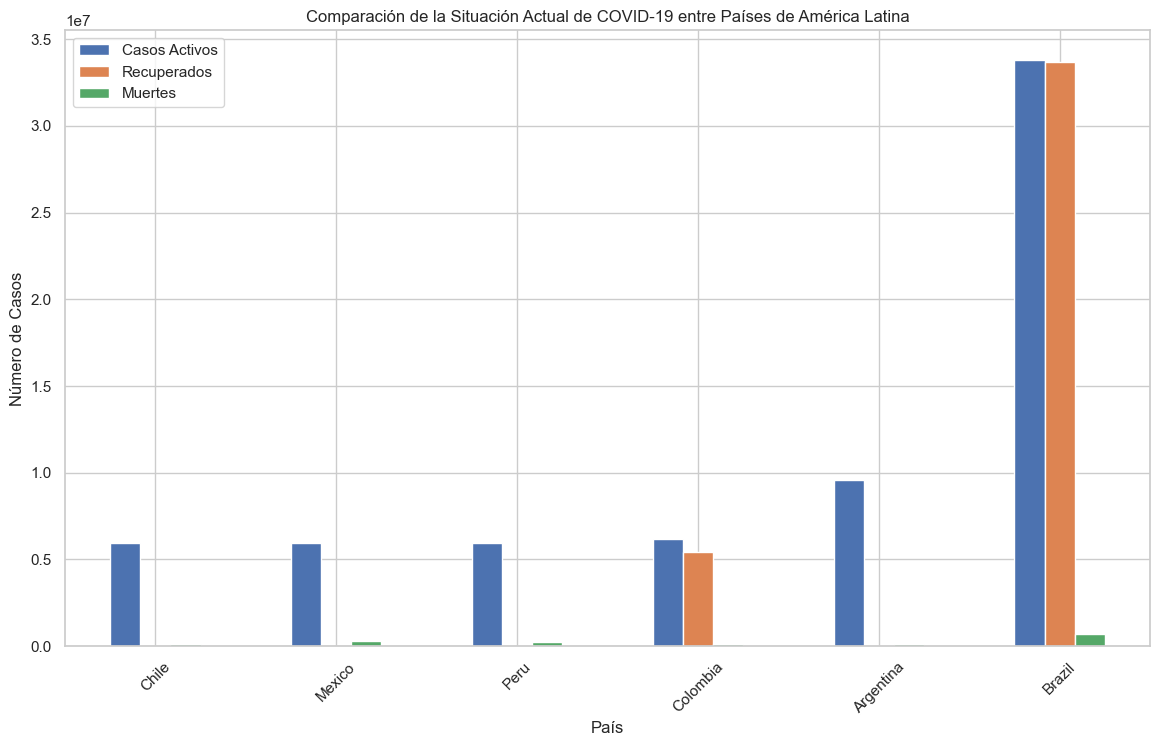

In [179]:
# No se tienen dato pero hay datos de recuperados y muertes en algunos paises
current_situation = df.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].max().sort_values(by="active_cases")
current_situation.plot(kind='bar', stacked=False, figsize=(14, 8))
plt.title('Comparación de la Situación Actual de COVID-19 entre Países de América Latina')
plt.xlabel('País')
plt.ylabel('Número de Casos')
plt.legend(['Casos Activos', 'Recuperados', 'Muertes'])
plt.xticks(rotation=45)
plt.show()

Por algún mótivo el dataset no está persistiendo los datos acumulados de recuperados. Lo cual no nos permite ver la cantidad de recuperados actuales de cada pais

# Machine Learning

### Predecir la probabilidad de una muerte dada una combinación de casos y recuperaciones.

In [180]:
df.columns

Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 

Accuracy: 0.9946595460614153
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        50
           1       1.00      1.00      1.00       699

    accuracy                           0.99       749
   macro avg       0.98      0.98      0.98       749
weighted avg       0.99      0.99      0.99       749



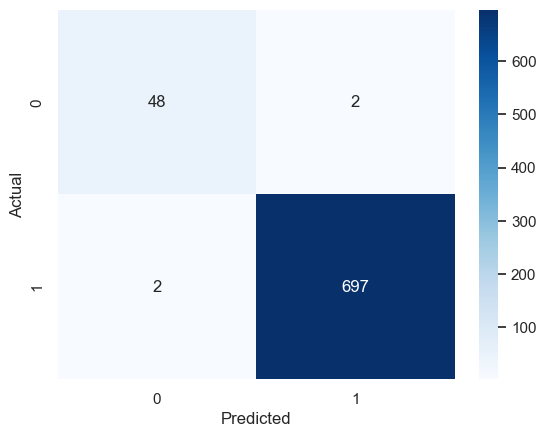

In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Convertir 'deceased cases' en variable binaria
df['deceased_binary'] = df['new_deceased'].apply(lambda x: 1 if x > 0 else 0)

X = df[['new_confirmed', 'new_recovered']]
y = df['deceased_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Observando los TP (True positive) notamos que casi un 7% de los casos (48 de 749 en total) terminaron en muertes

# GEO PANDAS

In [182]:
! pip install folium


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [183]:
# mapa para ver la distribución de casos confirmado, muertes, vacuna y recuperados
import folium
from folium.plugins import HeatMap

# Seleccionamos las columnas que vamos a utilizar
columns = ['latitude', 'longitude', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'cumulative_recovered']
data_map = df[columns].dropna()

# Creamos un mapa centrado en América Latina
map = folium.Map(location=[-14.235004, -51.92528], zoom_start=3)

# Creamos un mapa de calor para los casos confirmados
heat_map_confirmed = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_confirmed']], radius=15)
map.add_child(heat_map_confirmed)

# Creamos un mapa de calor para las muertes
heat_map_deceased = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_deceased']], radius=15)
map.add_child(heat_map_deceased)

# Creamos un mapa de calor para las vacunas administradas
heat_map_vaccine = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_vaccine_doses_administered']], radius=15)
map.add_child(heat_map_vaccine)

# Creamos un mapa de calor para los recuperados
heat_map_recovered = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_recovered']], radius=15)
map.add_child(heat_map_recovered)

map.save('mapa.html')

map

In [184]:
# mapa para ver la distribución de casos confirmados en latinoamerica por país
import geopandas as gpd

# Path del Geo Dataframe descargado desde: https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip
path = "ne_110m_admin_0_countries.zip"

# Cargo el dataset con el archivo
world = gpd.read_file(path)

# Visualizo las columnas de mi dataframe world
for column in world.columns:
    print(column)

featurecla
scalerank
LABELRANK
SOVEREIGNT
SOV_A3
ADM0_DIF
LEVEL
TYPE
TLC
ADMIN
ADM0_A3
GEOU_DIF
GEOUNIT
GU_A3
SU_DIF
SUBUNIT
SU_A3
BRK_DIFF
NAME
NAME_LONG
BRK_A3
BRK_NAME
BRK_GROUP
ABBREV
POSTAL
FORMAL_EN
FORMAL_FR
NAME_CIAWF
NOTE_ADM0
NOTE_BRK
NAME_SORT
NAME_ALT
MAPCOLOR7
MAPCOLOR8
MAPCOLOR9
MAPCOLOR13
POP_EST
POP_RANK
POP_YEAR
GDP_MD
GDP_YEAR
ECONOMY
INCOME_GRP
FIPS_10
ISO_A2
ISO_A2_EH
ISO_A3
ISO_A3_EH
ISO_N3
ISO_N3_EH
UN_A3
WB_A2
WB_A3
WOE_ID
WOE_ID_EH
WOE_NOTE
ADM0_ISO
ADM0_DIFF
ADM0_TLC
ADM0_A3_US
ADM0_A3_FR
ADM0_A3_RU
ADM0_A3_ES
ADM0_A3_CN
ADM0_A3_TW
ADM0_A3_IN
ADM0_A3_NP
ADM0_A3_PK
ADM0_A3_DE
ADM0_A3_GB
ADM0_A3_BR
ADM0_A3_IL
ADM0_A3_PS
ADM0_A3_SA
ADM0_A3_EG
ADM0_A3_MA
ADM0_A3_PT
ADM0_A3_AR
ADM0_A3_JP
ADM0_A3_KO
ADM0_A3_VN
ADM0_A3_TR
ADM0_A3_ID
ADM0_A3_PL
ADM0_A3_GR
ADM0_A3_IT
ADM0_A3_NL
ADM0_A3_SE
ADM0_A3_BD
ADM0_A3_UA
ADM0_A3_UN
ADM0_A3_WB
CONTINENT
REGION_UN
SUBREGION
REGION_WB
NAME_LEN
LONG_LEN
ABBREV_LEN
TINY
HOMEPART
MIN_ZOOM
MIN_LABEL
MAX_LABEL
LABEL_X
LABEL_Y
NE_ID
WIKIDA

In [185]:
world.NAME

0                          Fiji
1                      Tanzania
2                     W. Sahara
3                        Canada
4      United States of America
                 ...           
172                      Serbia
173                  Montenegro
174                      Kosovo
175         Trinidad and Tobago
176                    S. Sudan
Name: NAME, Length: 177, dtype: object

In [186]:
# Filtrado de world: 
world = world[(world.NAME=="Argentina") | (world.NAME=="Chile") | (world.NAME=="Colombia") | (world.NAME=="Mexico") | (world.NAME=="Peru") | (world.NAME=="Brazil")]
world

featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
9   Admin-0 country          1          2  Argentina    ARG         0      2   
10  Admin-0 country          1          2      Chile    CHL         0      2   
27  Admin-0 country          1          2     Mexico    MEX         0      2   
29  Admin-0 country          1          2     Brazil    BRA         0      2   
31  Admin-0 country          1          2       Peru    PER         0      2   
32  Admin-0 country          1          2   Colombia    COL         0      2   

                 TYPE TLC      ADMIN  ... FCLASS_TR  FCLASS_ID FCLASS_PL  \
9   Sovereign country   1  Argentina  ...      None       None      None   
10  Sovereign country   1      Chile  ...      None       None      None   
27  Sovereign country   1     Mexico  ...      None       None      None   
29  Sovereign country   1     Brazil  ...      None       None      None   
31  Sovereign country   1       Peru  ...      None       None      None   
32  Sovereign country   1   Colombia  ...      None       None      None   

   FCLASS_GR  FCLASS_IT FCLASS_NL FCLASS_SE  FCLASS_BD FCLASS_UA  \
9       None       None      None      None       None      None   
10      None       None      None      None       None      None   
27      None       None      None      None       None      None   
29      None       None      None      None       None      None   
31      None       None      None      None       None      None   
32      None       None      None      None       None      None   

                                             geometry  
9   MULTIPOLYGON (((-68.63401 -52.63637, -68.25 -5...  
10  MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...  
27  POLYGON ((-117.12776 32.53534, -115.99135 32.6...  
29  POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...  
31  POLYGON ((-69.89364 -4.29819, -70.79477 -4.251...  
32  POLYGON ((-66.87633 1.25336, -67.06505 1.13011...  

[6 rows x 169 columns]

In [187]:
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 6 entries, 9 to 32
Columns: 169 entries, featurecla to geometry
dtypes: float64(6), geometry(1), int32(24), int64(1), object(137)
memory usage: 7.4+ KB


In [188]:
world = world.rename(columns={"NAME":"country_name"})
world["country_name"]

9     Argentina
10        Chile
27       Mexico
29       Brazil
31         Peru
32     Colombia
Name: country_name, dtype: object

In [189]:
# Mergeo con mi dataset agrupado
world = world.merge(df.groupby('country_name')['cumulative_confirmed'].max().reset_index(), on="country_name")
world

featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
0  Admin-0 country          1          2  Argentina    ARG         0      2   
1  Admin-0 country          1          2      Chile    CHL         0      2   
2  Admin-0 country          1          2     Mexico    MEX         0      2   
3  Admin-0 country          1          2     Brazil    BRA         0      2   
4  Admin-0 country          1          2       Peru    PER         0      2   
5  Admin-0 country          1          2   Colombia    COL         0      2   

                TYPE TLC      ADMIN  ... FCLASS_ID  FCLASS_PL FCLASS_GR  \
0  Sovereign country   1  Argentina  ...      None       None      None   
1  Sovereign country   1      Chile  ...      None       None      None   
2  Sovereign country   1     Mexico  ...      None       None      None   
3  Sovereign country   1     Brazil  ...      None       None      None   
4  Sovereign country   1       Peru  ...      None       None      None   
5  Sovereign country   1   Colombia  ...      None       None      None   

  FCLASS_IT  FCLASS_NL FCLASS_SE FCLASS_BD  FCLASS_UA  \
0      None       None      None      None       None   
1      None       None      None      None       None   
2      None       None      None      None       None   
3      None       None      None      None       None   
4      None       None      None      None       None   
5      None       None      None      None       None   

                                            geometry cumulative_confirmed  
0  MULTIPOLYGON (((-68.63401 -52.63637, -68.25 -5...         9.697763e+06  
1  MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...         6.079579e+06  
2  POLYGON ((-117.12776 32.53534, -115.99135 32.6...         6.079579e+06  
3  POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...         3.456883e+07  
4  POLYGON ((-69.89364 -4.29819, -70.79477 -4.251...         6.079579e+06  
5  POLYGON ((-66.87633 1.25336, -67.06505 1.13011...         6.304317e+06  

[6 rows x 170 columns]

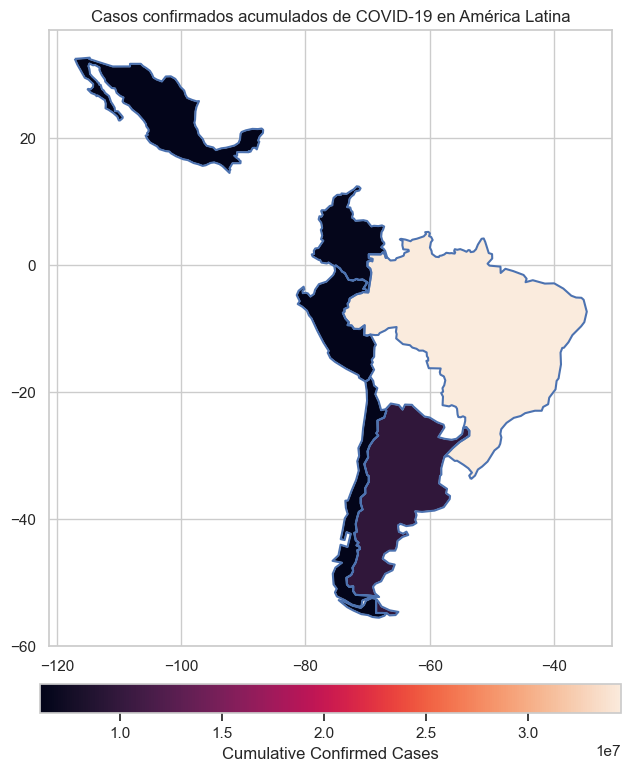

In [190]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='cumulative_confirmed', ax=ax, legend=True, legend_kwds={'label': "Cumulative Confirmed Cases", 'orientation': "horizontal", 'shrink': 0.5, 'pad': 0.05, 'aspect': 20})
plt.title('Casos confirmados acumulados de COVID-19 en América Latina')
plt.show()

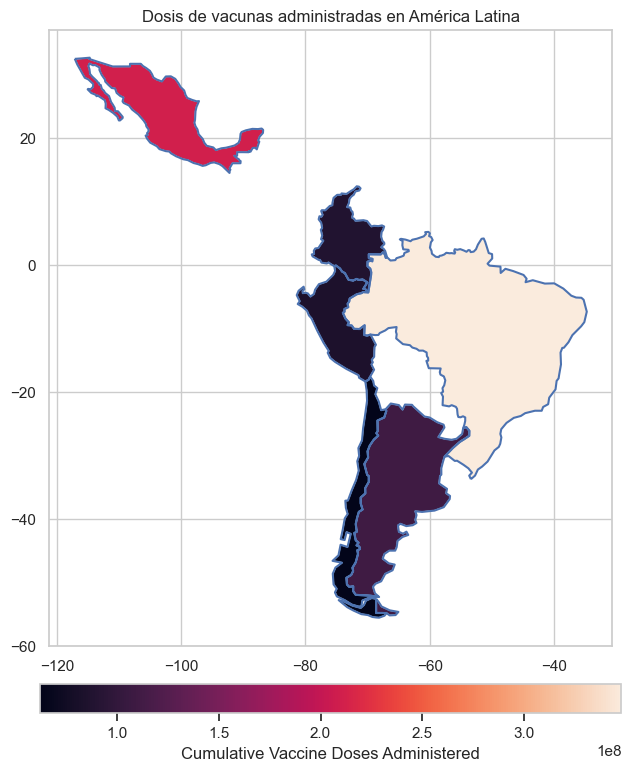

In [191]:
# mapa para ver la distribución de vacunados en latinoamerica por país

world = world.merge(df.groupby('country_name')['cumulative_vaccine_doses_administered'].max().reset_index(), on="country_name")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='cumulative_vaccine_doses_administered', ax=ax, legend=True, legend_kwds={'label': "Cumulative Vaccine Doses Administered", 'orientation': "horizontal", 'shrink': 0.5, 'pad': 0.05, 'aspect': 20})
plt.title('Dosis de vacunas administradas en América Latina')
plt.show()

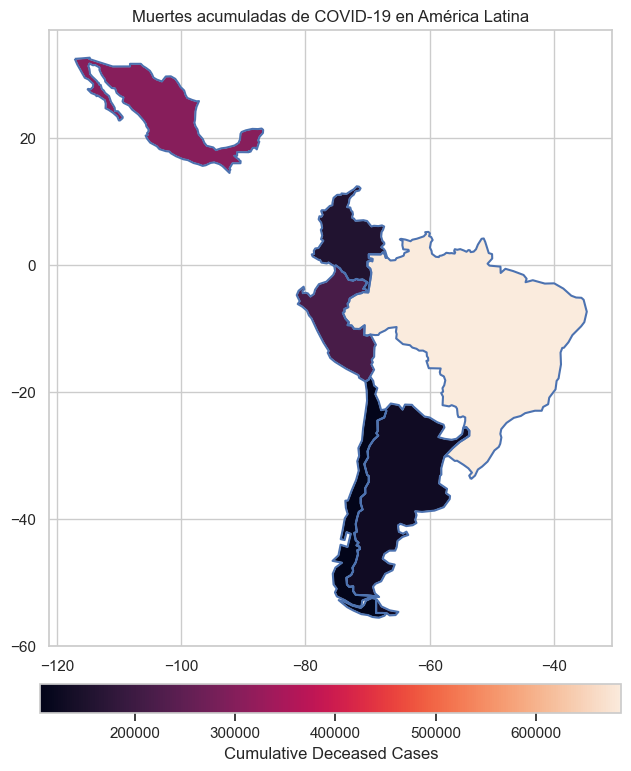

In [192]:
# mapa para ver la distribución muertes en latinoamerica por país

world = world.merge(df.groupby('country_name')['cumulative_deceased'].max().reset_index(), on="country_name")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='cumulative_deceased', ax=ax, legend=True, legend_kwds={'label': "Cumulative Deceased Cases", 'orientation': "horizontal", 'shrink': 0.5, 'pad': 0.05, 'aspect': 20})
plt.title('Muertes acumuladas de COVID-19 en América Latina')
plt.show()